In [ ]:
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import scipy.integrate as integrate
from tqdm.auto import tqdm

matplotlib_inline.backend_inline.set_matplotlib_formats("png2x")
plt.style.use("default")
plt.rcParams.update(
    {
        "figure.constrained_layout.use": True,
        "figure.facecolor": "white",
    }
)

n_dense_points = 201

In [ ]:
class MLP(nn.Module):
    def __init__(self, *features, activation=nn.Tanh):
        super().__init__()

        layers = []
        for in_features, out_features in zip(features, features[1:]):
            layers.append(nn.Linear(in_features, out_features))
            layers.append(activation())
        self.network = nn.Sequential(*layers[:-1])

    def forward(self, x):
        return self.network(x)

In [ ]:
def grad(outputs, inputs):
    return torch.autograd.grad(outputs.sum(), inputs, create_graph=True)[0]

In [ ]:
domain=(0,1)

$$
-\epsilon y''-kxy'+cy=\left(kx^3+(k-λ+ϵ)x^2+(3ϵ-k+\lambda)x\right)e^x+λx^2-2kx^2-2ϵ\\
y(0)=0,\quad y(1)=1
$$

In [ ]:
eps=1
k=7

In [ ]:
C=np.arange(0,750,5)

In [ ]:
DATA41=[]
DATA42=[]
RATIO4=[]

for c in C:
    torch.manual_seed(78)
    model = MLP(1, 50, 50, 1)
    batch_size = 10000
    n_epochs = 500
    print_interval = n_epochs // 10
    learning_rate = 0.1
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer=optimizer,
                                            lr_lambda=lambda epoch: 0.98 ** epoch,
                                            last_epoch=-1,
                                            verbose=False)

    for epoch in tqdm(range(n_epochs)):
        optimizer.zero_grad()

        # 무작위 t 생성 후 y 계산
        t = torch.empty(batch_size, 1).uniform_(*domain).requires_grad_()
        y = t*(1-t)*model(t)+t
        y_e = t*(1-t)*torch.exp(t)+t**2
        y_t = grad(y, t)
        y_tt = grad(y_t,t)

        # Loss
        loss_de = F.mse_loss(y_tt+k*t*y_t-c*y+(k*t**3+(k-c+1)*t**2+(3-k+c)*t)*torch.exp(t)+c*t**2-2*k*t**2-2, torch.zeros_like(y_t))
        loss = loss_de
        realloss=F.mse_loss(y-y_e, torch.zeros_like(y))
        # Backprop
        loss.backward()
        optimizer.step()
        scheduler.step()
        if epoch % print_interval == 0:
            print(f"{epoch = }, loss_de = {loss_de.item():.4f}")
        if epoch==n_epochs-1:
            print(realloss.item())
            DATA41.append(realloss.item())
            DATA42.append(loss.item())
            RATIO4.append(realloss.item()/loss.item())


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 41.4505
epoch = 50, loss_de = 0.1040
epoch = 100, loss_de = 0.0017
epoch = 150, loss_de = 0.0010
epoch = 200, loss_de = 0.0010
epoch = 250, loss_de = 0.0009
epoch = 300, loss_de = 0.0010
epoch = 350, loss_de = 0.0009
epoch = 400, loss_de = 0.0009
epoch = 450, loss_de = 0.0009
3.392194303231122e-09


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 45.5195
epoch = 50, loss_de = 0.1226
epoch = 100, loss_de = 0.0039
epoch = 150, loss_de = 0.0026
epoch = 200, loss_de = 0.0024
epoch = 250, loss_de = 0.0023
epoch = 300, loss_de = 0.0023
epoch = 350, loss_de = 0.0023
epoch = 400, loss_de = 0.0023
epoch = 450, loss_de = 0.0023
9.469461659250555e-09


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 50.4903
epoch = 50, loss_de = 0.1069
epoch = 100, loss_de = 0.0032
epoch = 150, loss_de = 0.0021
epoch = 200, loss_de = 0.0019
epoch = 250, loss_de = 0.0016
epoch = 300, loss_de = 0.0018
epoch = 350, loss_de = 0.0016
epoch = 400, loss_de = 0.0017
epoch = 450, loss_de = 0.0017
6.995009460553092e-09


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 56.3627
epoch = 50, loss_de = 0.4499
epoch = 100, loss_de = 0.0323
epoch = 150, loss_de = 0.0187
epoch = 200, loss_de = 0.0148
epoch = 250, loss_de = 0.0135
epoch = 300, loss_de = 0.0131
epoch = 350, loss_de = 0.0127
epoch = 400, loss_de = 0.0127
epoch = 450, loss_de = 0.0129
2.6157016108641074e-08


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 63.1369
epoch = 50, loss_de = 2.2402
epoch = 100, loss_de = 0.0272
epoch = 150, loss_de = 0.0128
epoch = 200, loss_de = 0.0104
epoch = 250, loss_de = 0.0091
epoch = 300, loss_de = 0.0093
epoch = 350, loss_de = 0.0086
epoch = 400, loss_de = 0.0089
epoch = 450, loss_de = 0.0089
1.661323167923001e-08


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 70.8129
epoch = 50, loss_de = 11.0069
epoch = 100, loss_de = 1.0534
epoch = 150, loss_de = 0.5959
epoch = 200, loss_de = 0.4934
epoch = 250, loss_de = 0.4492
epoch = 300, loss_de = 0.4748
epoch = 350, loss_de = 0.4287
epoch = 400, loss_de = 0.4390
epoch = 450, loss_de = 0.4470
7.37327400202048e-06


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 79.3905
epoch = 50, loss_de = 16.2242
epoch = 100, loss_de = 0.0614
epoch = 150, loss_de = 0.0078
epoch = 200, loss_de = 0.0061
epoch = 250, loss_de = 0.0052
epoch = 300, loss_de = 0.0051
epoch = 350, loss_de = 0.0049
epoch = 400, loss_de = 0.0051
epoch = 450, loss_de = 0.0051
1.2755431377797777e-08


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 88.8699
epoch = 50, loss_de = 11.1585
epoch = 100, loss_de = 3.4414
epoch = 150, loss_de = 2.5809
epoch = 200, loss_de = 2.3330
epoch = 250, loss_de = 2.2004
epoch = 300, loss_de = 2.2846
epoch = 350, loss_de = 2.1298
epoch = 400, loss_de = 2.1626
epoch = 450, loss_de = 2.1722
6.212140579009429e-05


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 99.2509
epoch = 50, loss_de = 21.8858
epoch = 100, loss_de = 5.2649
epoch = 150, loss_de = 3.6884
epoch = 200, loss_de = 3.2808
epoch = 250, loss_de = 3.0777
epoch = 300, loss_de = 3.1807
epoch = 350, loss_de = 2.9644
epoch = 400, loss_de = 3.0105
epoch = 450, loss_de = 3.0167
8.837530185701326e-05


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 110.5337
epoch = 50, loss_de = 40.2582
epoch = 100, loss_de = 10.5514
epoch = 150, loss_de = 6.2800
epoch = 200, loss_de = 5.3860
epoch = 250, loss_de = 4.9921
epoch = 300, loss_de = 5.1158
epoch = 350, loss_de = 4.7696
epoch = 400, loss_de = 4.8433
epoch = 450, loss_de = 4.8394
0.00015792931662872434


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 122.7182
epoch = 50, loss_de = 43.8955
epoch = 100, loss_de = 30.4090
epoch = 150, loss_de = 13.0562
epoch = 200, loss_de = 10.2576
epoch = 250, loss_de = 9.2478
epoch = 300, loss_de = 9.3411
epoch = 350, loss_de = 8.7052
epoch = 400, loss_de = 8.8421
epoch = 450, loss_de = 8.8048
0.00035277599818073213


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 135.8045
epoch = 50, loss_de = 47.6771
epoch = 100, loss_de = 46.3222
epoch = 150, loss_de = 45.9285
epoch = 200, loss_de = 40.3229
epoch = 250, loss_de = 30.4229
epoch = 300, loss_de = 28.6768
epoch = 350, loss_de = 26.5287
epoch = 400, loss_de = 26.7618
epoch = 450, loss_de = 26.5659
0.0017228795913979411


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 149.7924
epoch = 50, loss_de = 51.6317
epoch = 100, loss_de = 49.9243
epoch = 150, loss_de = 49.5188
epoch = 200, loss_de = 50.2470
epoch = 250, loss_de = 49.1958
epoch = 300, loss_de = 50.4146
epoch = 350, loss_de = 48.6378
epoch = 400, loss_de = 49.6185
epoch = 450, loss_de = 49.4132
0.003438015468418598


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 164.6821
epoch = 50, loss_de = 55.7643
epoch = 100, loss_de = 53.6771
epoch = 150, loss_de = 53.2452
epoch = 200, loss_de = 54.0237
epoch = 250, loss_de = 52.8906
epoch = 300, loss_de = 54.1510
epoch = 350, loss_de = 52.3302
epoch = 400, loss_de = 53.3726
epoch = 450, loss_de = 53.1658
0.00341522297821939


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 180.4735
epoch = 50, loss_de = 60.0785
epoch = 100, loss_de = 57.5856
epoch = 150, loss_de = 57.1261
epoch = 200, loss_de = 57.9555
epoch = 250, loss_de = 56.7390
epoch = 300, loss_de = 58.0390
epoch = 350, loss_de = 56.1779
epoch = 400, loss_de = 57.2831
epoch = 450, loss_de = 57.0750
0.00339856487698853


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 197.1666
epoch = 50, loss_de = 64.5768
epoch = 100, loss_de = 61.6526
epoch = 150, loss_de = 61.1644
epoch = 200, loss_de = 62.0457
epoch = 250, loss_de = 60.7444
epoch = 300, loss_de = 62.0825
epoch = 350, loss_de = 60.1841
epoch = 400, loss_de = 61.3536
epoch = 450, loss_de = 61.1441
0.003386235795915127


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 214.7614
epoch = 50, loss_de = 69.0315
epoch = 100, loss_de = 65.8799
epoch = 150, loss_de = 65.3612
epoch = 200, loss_de = 66.2968
epoch = 250, loss_de = 64.9090
epoch = 300, loss_de = 66.2838
epoch = 350, loss_de = 64.3510
epoch = 400, loss_de = 65.5862
epoch = 450, loss_de = 65.3752
0.0033769954461604357


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 233.2580
epoch = 50, loss_de = 73.7456
epoch = 100, loss_de = 70.2723
epoch = 150, loss_de = 69.7200
epoch = 200, loss_de = 70.7098
epoch = 250, loss_de = 69.2337
epoch = 300, loss_de = 70.6441
epoch = 350, loss_de = 68.6794
epoch = 400, loss_de = 69.9821
epoch = 450, loss_de = 69.7696
0.003369983285665512


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 252.6563
epoch = 50, loss_de = 78.6392
epoch = 100, loss_de = 74.8281
epoch = 150, loss_de = 74.2409
epoch = 200, loss_de = 75.2862
epoch = 250, loss_de = 73.7198
epoch = 300, loss_de = 75.1650
epoch = 350, loss_de = 73.1706
epoch = 400, loss_de = 74.5426
epoch = 450, loss_de = 74.3284
0.0033646102529019117


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 272.9562
epoch = 50, loss_de = 78.9519
epoch = 100, loss_de = 79.5388
epoch = 150, loss_de = 78.9240
epoch = 200, loss_de = 80.0261
epoch = 250, loss_de = 78.3680
epoch = 300, loss_de = 79.8469
epoch = 350, loss_de = 77.8249
epoch = 400, loss_de = 79.2680
epoch = 450, loss_de = 79.0519
0.0033604262862354517


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 294.1580
epoch = 50, loss_de = 83.8638
epoch = 100, loss_de = 84.4216
epoch = 150, loss_de = 83.7717
epoch = 200, loss_de = 84.9321
epoch = 250, loss_de = 83.1795
epoch = 300, loss_de = 84.6918
epoch = 350, loss_de = 82.6439
epoch = 400, loss_de = 84.1601
epoch = 450, loss_de = 83.9422
0.0033571869134902954


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 316.2614
epoch = 50, loss_de = 88.9452
epoch = 100, loss_de = 89.4699
epoch = 150, loss_de = 88.7836
epoch = 200, loss_de = 90.0040
epoch = 250, loss_de = 88.1547
epoch = 300, loss_de = 89.6996
epoch = 350, loss_de = 87.6277
epoch = 400, loss_de = 89.2189
epoch = 450, loss_de = 88.9990
0.0033546427730470896


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 339.2666
epoch = 50, loss_de = 94.1962
epoch = 100, loss_de = 94.6841
epoch = 150, loss_de = 93.9603
epoch = 200, loss_de = 95.2421
epoch = 250, loss_de = 93.2939
epoch = 300, loss_de = 94.8708
epoch = 350, loss_de = 92.7766
epoch = 400, loss_de = 94.4450
epoch = 450, loss_de = 94.2229
0.0033526308834552765


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 363.1735
epoch = 50, loss_de = 99.6171
epoch = 100, loss_de = 100.0646
epoch = 150, loss_de = 99.3022
epoch = 200, loss_de = 100.6470
epoch = 250, loss_de = 98.5974
epoch = 300, loss_de = 100.2060
epoch = 350, loss_de = 98.0910
epoch = 400, loss_de = 99.8386
epoch = 450, loss_de = 99.6142
0.0033510359935462475


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 387.9820
epoch = 50, loss_de = 105.2081
epoch = 100, loss_de = 105.6117
epoch = 150, loss_de = 104.8095
epoch = 200, loss_de = 106.2190
epoch = 250, loss_de = 104.0656
epoch = 300, loss_de = 105.7054
epoch = 350, loss_de = 103.5712
epoch = 400, loss_de = 105.4000
epoch = 450, loss_de = 105.1733
0.003349761478602886


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 413.6924
epoch = 50, loss_de = 110.9692
epoch = 100, loss_de = 111.3258
epoch = 150, loss_de = 110.4825
epoch = 200, loss_de = 111.9584
epoch = 250, loss_de = 109.6988
epoch = 300, loss_de = 111.3694
epoch = 350, loss_de = 109.2174
epoch = 400, loss_de = 111.1296
epoch = 450, loss_de = 110.9004
0.0033487381879240274


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 440.3044
epoch = 50, loss_de = 116.9006
epoch = 100, loss_de = 117.2069
epoch = 150, loss_de = 116.3214
epoch = 200, loss_de = 117.8654
epoch = 250, loss_de = 115.4971
epoch = 300, loss_de = 117.1982
epoch = 350, loss_de = 115.0298
epoch = 400, loss_de = 117.0276
epoch = 450, loss_de = 116.7956
0.0033479174599051476


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 467.8181
epoch = 50, loss_de = 123.0025
epoch = 100, loss_de = 123.2554
epoch = 150, loss_de = 122.3264
epoch = 200, loss_de = 123.9402
epoch = 250, loss_de = 121.4607
epoch = 300, loss_de = 123.1919
epoch = 350, loss_de = 121.0085
epoch = 400, loss_de = 123.0940
epoch = 450, loss_de = 122.8593
0.003347255289554596


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 496.2336
epoch = 50, loss_de = 129.2748
epoch = 100, loss_de = 129.4714
epoch = 150, loss_de = 128.4978
epoch = 200, loss_de = 130.1830
epoch = 250, loss_de = 127.5897
epoch = 300, loss_de = 129.3508
epoch = 350, loss_de = 127.1537
epoch = 400, loss_de = 129.3292
epoch = 450, loss_de = 129.0915
0.0033467209432274103


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 525.5508
epoch = 50, loss_de = 135.7177
epoch = 100, loss_de = 135.8550
epoch = 150, loss_de = 134.8355
epoch = 200, loss_de = 136.5940
epoch = 250, loss_de = 133.8844
epoch = 300, loss_de = 135.6750
epoch = 350, loss_de = 133.4655
epoch = 400, loss_de = 135.7332
epoch = 450, loss_de = 135.4924
0.0033462897408753633


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 555.7697
epoch = 50, loss_de = 142.3312
epoch = 100, loss_de = 142.4063
epoch = 150, loss_de = 141.3397
epoch = 200, loss_de = 143.1732
epoch = 250, loss_de = 140.3447
epoch = 300, loss_de = 142.1646
epoch = 350, loss_de = 139.9440
epoch = 400, loss_de = 142.3060
epoch = 450, loss_de = 142.0620
0.0033459423575550318


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 586.8903
epoch = 50, loss_de = 149.1155
epoch = 100, loss_de = 149.1254
epoch = 150, loss_de = 148.0106
epoch = 200, loss_de = 149.9208
epoch = 250, loss_de = 146.9707
epoch = 300, loss_de = 148.8198
epoch = 350, loss_de = 146.5893
epoch = 400, loss_de = 149.0479
epoch = 450, loss_de = 148.8005
0.003345662262290716


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 618.9127
epoch = 50, loss_de = 156.0704
epoch = 100, loss_de = 156.0125
epoch = 150, loss_de = 154.8481
epoch = 200, loss_de = 156.8369
epoch = 250, loss_de = 153.7626
epoch = 300, loss_de = 155.6406
epoch = 350, loss_de = 153.4014
epoch = 400, loss_de = 155.9588
epoch = 450, loss_de = 155.7080
0.0033454368822276592


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 651.8367
epoch = 50, loss_de = 163.1962
epoch = 100, loss_de = 163.0675
epoch = 150, loss_de = 161.8524
epoch = 200, loss_de = 163.9214
epoch = 250, loss_de = 160.7205
epoch = 300, loss_de = 162.6271
epoch = 350, loss_de = 160.3805
epoch = 400, loss_de = 163.0390
epoch = 450, loss_de = 162.7845
0.0033452571369707584


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 685.6626
epoch = 50, loss_de = 170.4927
epoch = 100, loss_de = 170.2905
epoch = 150, loss_de = 169.0236
epoch = 200, loss_de = 171.1747
epoch = 250, loss_de = 167.8443
epoch = 300, loss_de = 169.7794
epoch = 350, loss_de = 167.5265
epoch = 400, loss_de = 170.2884
epoch = 450, loss_de = 170.0301
0.003345114178955555


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 720.3901
epoch = 50, loss_de = 177.9601
epoch = 100, loss_de = 177.6817
epoch = 150, loss_de = 176.3616
epoch = 200, loss_de = 178.5966
epoch = 250, loss_de = 175.1341
epoch = 300, loss_de = 177.0975
epoch = 350, loss_de = 174.8396
epoch = 400, loss_de = 177.7070
epoch = 450, loss_de = 177.4449
0.003345001954585314


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 756.0194
epoch = 50, loss_de = 185.5984
epoch = 100, loss_de = 185.2410
epoch = 150, loss_de = 183.8665
epoch = 200, loss_de = 186.1871
epoch = 250, loss_de = 182.5900
epoch = 300, loss_de = 184.5815
epoch = 350, loss_de = 182.3197
epoch = 400, loss_de = 185.2949
epoch = 450, loss_de = 185.0288
0.0033449141774326563


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 792.5503
epoch = 50, loss_de = 193.4076
epoch = 100, loss_de = 192.9686
epoch = 150, loss_de = 191.5385
epoch = 200, loss_de = 193.9465
epoch = 250, loss_de = 190.2120
epoch = 300, loss_de = 192.2315
epoch = 350, loss_de = 189.9669
epoch = 400, loss_de = 193.0522
epoch = 450, loss_de = 192.7819
0.003344847820699215


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 829.9830
epoch = 50, loss_de = 201.3877
epoch = 100, loss_de = 200.8643
epoch = 150, loss_de = 199.3774
epoch = 200, loss_de = 201.8747
epoch = 250, loss_de = 198.0002
epoch = 300, loss_de = 200.0474
epoch = 350, loss_de = 197.7812
epoch = 400, loss_de = 200.9789
epoch = 450, loss_de = 200.7044
0.0033447982277721167


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 868.3174
epoch = 50, loss_de = 209.5388
epoch = 100, loss_de = 208.9284
epoch = 150, loss_de = 207.3834
epoch = 200, loss_de = 209.9718
epoch = 250, loss_de = 205.9545
epoch = 300, loss_de = 208.0293
epoch = 350, loss_de = 205.7626
epoch = 400, loss_de = 209.0751
epoch = 450, loss_de = 208.7961
0.0033447635360062122


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 907.5535
epoch = 50, loss_de = 217.8607
epoch = 100, loss_de = 217.1607
epoch = 150, loss_de = 215.5565
epoch = 200, loss_de = 218.2377
epoch = 250, loss_de = 214.0750
epoch = 300, loss_de = 216.1774
epoch = 350, loss_de = 213.9113
epoch = 400, loss_de = 217.3407
epoch = 450, loss_de = 217.0572
0.003344740020111203


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 947.6914
epoch = 50, loss_de = 226.3537
epoch = 100, loss_de = 225.5614
epoch = 150, loss_de = 223.8967
epoch = 200, loss_de = 226.6725
epoch = 250, loss_de = 222.3618
epoch = 300, loss_de = 224.4914
epoch = 350, loss_de = 222.2272
epoch = 400, loss_de = 225.7758
epoch = 450, loss_de = 225.4875
0.0033447262831032276


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 988.7308
epoch = 50, loss_de = 235.0176
epoch = 100, loss_de = 234.1304
epoch = 150, loss_de = 232.4039
epoch = 200, loss_de = 235.2764
epoch = 250, loss_de = 230.8147
epoch = 300, loss_de = 232.9716
epoch = 350, loss_de = 230.7103
epoch = 400, loss_de = 234.3804
epoch = 450, loss_de = 234.0873
0.0033447204623371363


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 1030.6721
epoch = 50, loss_de = 243.8526
epoch = 100, loss_de = 242.8677
epoch = 150, loss_de = 241.0784
epoch = 200, loss_de = 244.0491
epoch = 250, loss_de = 239.4340
epoch = 300, loss_de = 241.6179
epoch = 350, loss_de = 239.3605
epoch = 400, loss_de = 243.1545
epoch = 450, loss_de = 242.8565
0.0033447211608290672


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 1073.5153
epoch = 50, loss_de = 252.8586
epoch = 100, loss_de = 251.7735
epoch = 150, loss_de = 249.9200
epoch = 200, loss_de = 252.9908
epoch = 250, loss_de = 248.2195
epoch = 300, loss_de = 250.4303
epoch = 350, loss_de = 248.1781
epoch = 400, loss_de = 252.0982
epoch = 450, loss_de = 251.7950
0.003344728145748377


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 1117.2599
epoch = 50, loss_de = 262.0356
epoch = 100, loss_de = 260.8477
epoch = 150, loss_de = 258.9287
epoch = 200, loss_de = 262.1016
epoch = 250, loss_de = 257.1713
epoch = 300, loss_de = 259.4089
epoch = 350, loss_de = 257.1629
epoch = 400, loss_de = 261.2115
epoch = 450, loss_de = 260.9030
0.003344738855957985


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 1161.9062
epoch = 50, loss_de = 271.3836
epoch = 100, loss_de = 270.0903
epoch = 150, loss_de = 268.1047
epoch = 200, loss_de = 271.3813
epoch = 250, loss_de = 266.2895
epoch = 300, loss_de = 268.5537
epoch = 350, loss_de = 266.3151
epoch = 400, loss_de = 270.4943
epoch = 450, loss_de = 270.1805
0.0033447532914578915


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 1207.4543
epoch = 50, loss_de = 280.9026
epoch = 100, loss_de = 279.5013
epoch = 150, loss_de = 277.4479
epoch = 200, loss_de = 280.8301
epoch = 250, loss_de = 275.5739
epoch = 300, loss_de = 277.8647
epoch = 350, loss_de = 275.6344
epoch = 400, loss_de = 279.9467
epoch = 450, loss_de = 279.6274
0.003344771219417453


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 1253.9044
epoch = 50, loss_de = 290.5927
epoch = 100, loss_de = 289.0807
epoch = 150, loss_de = 286.9582
epoch = 200, loss_de = 290.4480
epoch = 250, loss_de = 285.0247
epoch = 300, loss_de = 287.3419
epoch = 350, loss_de = 285.1212
epoch = 400, loss_de = 289.5687
epoch = 450, loss_de = 289.2438
0.0033447910100221634


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 1301.2559
epoch = 50, loss_de = 300.4540
epoch = 100, loss_de = 298.8286
epoch = 150, loss_de = 296.6359
epoch = 200, loss_de = 300.2349
epoch = 250, loss_de = 294.6418
epoch = 300, loss_de = 296.9853
epoch = 350, loss_de = 294.7751
epoch = 400, loss_de = 299.3603
epoch = 450, loss_de = 299.0297
0.0033448131289333105


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 1349.5092
epoch = 50, loss_de = 310.4861
epoch = 100, loss_de = 308.7451
epoch = 150, loss_de = 306.4807
epoch = 200, loss_de = 310.1908
epoch = 250, loss_de = 304.4253
epoch = 300, loss_de = 306.7949
epoch = 350, loss_de = 304.5965
epoch = 400, loss_de = 309.3216
epoch = 450, loss_de = 308.9850
0.003344836411997676


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 1398.6644
epoch = 50, loss_de = 320.6894
epoch = 100, loss_de = 318.8300
epoch = 150, loss_de = 316.4929
epoch = 200, loss_de = 320.3159
epoch = 250, loss_de = 314.3751
epoch = 300, loss_de = 316.7708
epoch = 350, loss_de = 314.5851
epoch = 400, loss_de = 319.4525
epoch = 450, loss_de = 319.1098
0.003344861324876547


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 1448.7212
epoch = 50, loss_de = 331.0639
epoch = 100, loss_de = 329.0833
epoch = 150, loss_de = 326.6722
epoch = 200, loss_de = 330.6100
epoch = 250, loss_de = 324.4913
epoch = 300, loss_de = 326.9129
epoch = 350, loss_de = 324.7411
epoch = 400, loss_de = 329.7530
epoch = 450, loss_de = 329.4042
0.003344886703416705


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 1499.6794
epoch = 50, loss_de = 341.6093
epoch = 100, loss_de = 339.5052
epoch = 150, loss_de = 337.0189
epoch = 200, loss_de = 341.0733
epoch = 250, loss_de = 334.7739
epoch = 300, loss_de = 337.2214
epoch = 350, loss_de = 335.0645
epoch = 400, loss_de = 340.2231
epoch = 450, loss_de = 339.8680
0.0033449127804487944


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 1551.5398
epoch = 50, loss_de = 352.3257
epoch = 100, loss_de = 350.0955
epoch = 150, loss_de = 347.5328
epoch = 200, loss_de = 351.7057
epoch = 250, loss_de = 345.2228
epoch = 300, loss_de = 347.6960
epoch = 350, loss_de = 345.5551
epoch = 400, loss_de = 350.8629
epoch = 450, loss_de = 350.5014
0.003344939323142171


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 1604.3016
epoch = 50, loss_de = 363.2133
epoch = 100, loss_de = 360.8545
epoch = 150, loss_de = 358.2140
epoch = 200, loss_de = 362.5071
epoch = 250, loss_de = 355.8381
epoch = 300, loss_de = 358.3370
epoch = 350, loss_de = 356.2132
epoch = 400, loss_de = 361.6724
epoch = 450, loss_de = 361.3043
0.003344966098666191


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 1657.9652
epoch = 50, loss_de = 374.2721
epoch = 100, loss_de = 371.7819
epoch = 150, loss_de = 369.0624
epoch = 200, loss_de = 373.4778
epoch = 250, loss_de = 366.6198
epoch = 300, loss_de = 369.1442
epoch = 350, loss_de = 367.0385
epoch = 400, loss_de = 372.6515
epoch = 450, loss_de = 372.2768
0.0033449928741902113


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 1712.5304
epoch = 50, loss_de = 385.5019
epoch = 100, loss_de = 382.8778
epoch = 150, loss_de = 380.0782
epoch = 200, loss_de = 384.6175
epoch = 250, loss_de = 377.5680
epoch = 300, loss_de = 380.1177
epoch = 350, loss_de = 378.0313
epoch = 400, loss_de = 383.8004
epoch = 450, loss_de = 383.4188
0.0033450203482061625


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 1767.9976
epoch = 50, loss_de = 396.9027
epoch = 100, loss_de = 394.1422
epoch = 150, loss_de = 391.2613
epoch = 200, loss_de = 395.9263
epoch = 250, loss_de = 388.6826
epoch = 300, loss_de = 391.2575
epoch = 350, loss_de = 389.1914
epoch = 400, loss_de = 395.1188
epoch = 450, loss_de = 394.7303
0.0033450478222221136


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 1824.3668
epoch = 50, loss_de = 408.4746
epoch = 100, loss_de = 405.5752
epoch = 150, loss_de = 402.6116
epoch = 200, loss_de = 407.4044
epoch = 250, loss_de = 399.9634
epoch = 300, loss_de = 402.5636
epoch = 350, loss_de = 400.5189
epoch = 400, loss_de = 406.6070
epoch = 450, loss_de = 406.2114
0.0033450741320848465


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 1881.6372
epoch = 50, loss_de = 420.2177
epoch = 100, loss_de = 417.1767
epoch = 150, loss_de = 414.1293
epoch = 200, loss_de = 419.0515
epoch = 250, loss_de = 411.4108
epoch = 300, loss_de = 414.0360
epoch = 350, loss_de = 412.0138
epoch = 400, loss_de = 418.2648
epoch = 450, loss_de = 417.8620
0.0033451004419475794


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 1939.8094
epoch = 50, loss_de = 432.1319
epoch = 100, loss_de = 428.9467
epoch = 150, loss_de = 425.8143
epoch = 200, loss_de = 430.8678
epoch = 250, loss_de = 423.0245
epoch = 300, loss_de = 425.6747
epoch = 350, loss_de = 423.6760
epoch = 400, loss_de = 430.0924
epoch = 450, loss_de = 429.6822
0.0033451272174715996


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 1998.8832
epoch = 50, loss_de = 444.2172
epoch = 100, loss_de = 440.8853
epoch = 150, loss_de = 437.6666
epoch = 200, loss_de = 442.8534
epoch = 250, loss_de = 434.8047
epoch = 300, loss_de = 437.4798
epoch = 350, loss_de = 435.5056
epoch = 400, loss_de = 442.0896
epoch = 450, loss_de = 441.6719
0.003345152596011758


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 2058.8589
epoch = 50, loss_de = 456.4737
epoch = 100, loss_de = 452.9925
epoch = 150, loss_de = 449.6862
epoch = 200, loss_de = 455.0079
epoch = 250, loss_de = 446.7512
epoch = 300, loss_de = 449.4511
epoch = 350, loss_de = 447.5025
epoch = 400, loss_de = 454.2566
epoch = 450, loss_de = 453.8312
0.0033451782073825598


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 2119.7363
epoch = 50, loss_de = 468.9010
epoch = 100, loss_de = 465.2681
epoch = 150, loss_de = 461.8730
epoch = 200, loss_de = 467.3317
epoch = 250, loss_de = 458.8643
epoch = 300, loss_de = 461.5888
epoch = 350, loss_de = 459.6669
epoch = 400, loss_de = 466.5931
epoch = 450, loss_de = 466.1601
0.0033452031202614307


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 2181.5154
epoch = 50, loss_de = 481.4997
epoch = 100, loss_de = 477.7124
epoch = 150, loss_de = 474.2274
epoch = 200, loss_de = 479.8246
epoch = 250, loss_de = 471.1436
epoch = 300, loss_de = 473.8928
epoch = 350, loss_de = 471.9986
epoch = 400, loss_de = 479.0995
epoch = 450, loss_de = 478.6585
0.003345227800309658


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 2244.1963
epoch = 50, loss_de = 494.2695
epoch = 100, loss_de = 490.3252
epoch = 150, loss_de = 486.7489
epoch = 200, loss_de = 492.4868
epoch = 250, loss_de = 483.5895
epoch = 300, loss_de = 486.3631
epoch = 350, loss_de = 484.4978
epoch = 400, loss_de = 491.7755
epoch = 450, loss_de = 491.3265
0.0033452522475272417


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 2307.7788
epoch = 50, loss_de = 507.2101
epoch = 100, loss_de = 503.1065
epoch = 150, loss_de = 499.4378
epoch = 200, loss_de = 505.3181
epoch = 250, loss_de = 496.2018
epoch = 300, loss_de = 498.9997
epoch = 350, loss_de = 497.1643
epoch = 400, loss_de = 504.6212
epoch = 450, loss_de = 504.1642
0.003345276229083538


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 2372.2632
epoch = 50, loss_de = 520.3221
epoch = 100, loss_de = 516.0564
epoch = 150, loss_de = 512.2941
epoch = 200, loss_de = 518.3185
epoch = 250, loss_de = 508.9804
epoch = 300, loss_de = 511.8027
epoch = 350, loss_de = 509.9983
epoch = 400, loss_de = 517.6367
epoch = 450, loss_de = 517.1713
0.0033452995121479034


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 2437.6492
epoch = 50, loss_de = 533.6051
epoch = 100, loss_de = 529.1749
epoch = 150, loss_de = 525.3176
epoch = 200, loss_de = 531.4881
epoch = 250, loss_de = 521.9255
epoch = 300, loss_de = 524.7720
epoch = 350, loss_de = 522.9995
epoch = 400, loss_de = 530.8218
epoch = 450, loss_de = 530.3480
0.0033453223295509815


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 2503.9368
epoch = 50, loss_de = 547.0593
epoch = 100, loss_de = 542.4620
epoch = 150, loss_de = 538.5085
epoch = 200, loss_de = 544.8270
epoch = 250, loss_de = 535.0371
epoch = 300, loss_de = 537.9076
epoch = 350, loss_de = 536.1683
epoch = 400, loss_de = 544.1766
epoch = 450, loss_de = 543.6944
0.0033453444484621286


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 2571.1265
epoch = 50, loss_de = 560.6846
epoch = 100, loss_de = 555.9177
epoch = 150, loss_de = 551.8666
epoch = 200, loss_de = 558.3350
epoch = 250, loss_de = 548.3151
epoch = 300, loss_de = 551.2095
epoch = 350, loss_de = 549.5045
epoch = 400, loss_de = 557.7012
epoch = 450, loss_de = 557.2103
0.003345366334542632


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 2639.2173
epoch = 50, loss_de = 574.4811
epoch = 100, loss_de = 569.5417
epoch = 150, loss_de = 565.3923
epoch = 200, loss_de = 572.0121
epoch = 250, loss_de = 561.7596
epoch = 300, loss_de = 564.6780
epoch = 350, loss_de = 563.0079
epoch = 400, loss_de = 571.3955
epoch = 450, loss_de = 570.8958
0.003345387987792492


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 2708.2104
epoch = 50, loss_de = 588.4485
epoch = 100, loss_de = 583.3345
epoch = 150, loss_de = 579.0851
epoch = 200, loss_de = 585.8585
epoch = 250, loss_de = 575.3703
epoch = 300, loss_de = 578.3126
epoch = 350, loss_de = 576.6788
epoch = 400, loss_de = 585.2595
epoch = 450, loss_de = 584.7509
0.0033454089425504208


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 2778.1050
epoch = 50, loss_de = 602.5872
epoch = 100, loss_de = 597.2958
epoch = 150, loss_de = 592.9454
epoch = 200, loss_de = 599.8741
epoch = 250, loss_de = 589.1476
epoch = 300, loss_de = 592.1135
epoch = 350, loss_de = 590.5171
epoch = 400, loss_de = 599.2933
epoch = 450, loss_de = 598.7755
0.0033454291988164186


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 2848.9014
epoch = 50, loss_de = 616.8970
epoch = 100, loss_de = 611.4257
epoch = 150, loss_de = 606.9730
epoch = 200, loss_de = 614.0589
epoch = 250, loss_de = 603.0914
epoch = 300, loss_de = 606.0810
epoch = 350, loss_de = 604.5228
epoch = 400, loss_de = 613.4968
epoch = 450, loss_de = 612.9697
0.0033454489894211292


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 2920.5994
epoch = 50, loss_de = 631.3779
epoch = 100, loss_de = 625.7242
epoch = 150, loss_de = 621.1680
epoch = 200, loss_de = 628.4127
epoch = 250, loss_de = 617.2016
epoch = 300, loss_de = 620.2145
epoch = 350, loss_de = 618.6959
epoch = 400, loss_de = 627.8699
epoch = 450, loss_de = 627.3336
0.003345468547195196


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 2993.1987
epoch = 50, loss_de = 646.0300
epoch = 100, loss_de = 640.1912
epoch = 150, loss_de = 635.5301
epoch = 200, loss_de = 642.9359
epoch = 250, loss_de = 631.4783
epoch = 300, loss_de = 634.5147
epoch = 350, loss_de = 633.0363
epoch = 400, loss_de = 642.4127
epoch = 450, loss_de = 641.8671
0.0033454876393079758


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 3066.7004
epoch = 50, loss_de = 660.8531
epoch = 100, loss_de = 654.8267
epoch = 150, loss_de = 650.0598
epoch = 200, loss_de = 657.6282
epoch = 250, loss_de = 645.9213
epoch = 300, loss_de = 648.9811
epoch = 350, loss_de = 647.5443
epoch = 400, loss_de = 657.1254
epoch = 450, loss_de = 656.5701
0.003345506265759468


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 3141.1038
epoch = 50, loss_de = 675.8473
epoch = 100, loss_de = 669.6310
epoch = 150, loss_de = 664.7568
epoch = 200, loss_de = 672.4897
epoch = 250, loss_de = 660.5308
epoch = 300, loss_de = 663.6138
epoch = 350, loss_de = 662.2196
epoch = 400, loss_de = 672.0077
epoch = 450, loss_de = 671.4426
0.0033455241937190294


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 3216.4084
epoch = 50, loss_de = 691.0129
epoch = 100, loss_de = 684.6038
epoch = 150, loss_de = 679.6210
epoch = 200, loss_de = 687.5204
epoch = 250, loss_de = 675.3067
epoch = 300, loss_de = 678.4128
epoch = 350, loss_de = 677.0624
epoch = 400, loss_de = 687.0598
epoch = 450, loss_de = 686.4849
0.0033455421216785908


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 3292.6155
epoch = 50, loss_de = 706.3494
epoch = 100, loss_de = 699.7452
epoch = 150, loss_de = 694.6527
epoch = 200, loss_de = 702.7204
epoch = 250, loss_de = 690.2493
epoch = 300, loss_de = 693.3783
epoch = 350, loss_de = 692.0726
epoch = 400, loss_de = 702.2816
epoch = 450, loss_de = 701.6967
0.003345558885484934


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 3369.7231
epoch = 50, loss_de = 721.8570
epoch = 100, loss_de = 715.0552
epoch = 150, loss_de = 709.8517
epoch = 200, loss_de = 718.0895
epoch = 250, loss_de = 705.3580
epoch = 300, loss_de = 708.5101
epoch = 350, loss_de = 707.2501
epoch = 400, loss_de = 717.6730
epoch = 450, loss_de = 717.0781
0.0033455761149525642


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 3447.7336
epoch = 50, loss_de = 737.5358
epoch = 100, loss_de = 730.5336
epoch = 150, loss_de = 725.2180
epoch = 200, loss_de = 733.6277
epoch = 250, loss_de = 720.6334
epoch = 300, loss_de = 723.8083
epoch = 350, loss_de = 722.5950
epoch = 400, loss_de = 733.2343
epoch = 450, loss_de = 732.6290
0.0033455921802669764


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 3526.6455
epoch = 50, loss_de = 753.3856
epoch = 100, loss_de = 746.1808
epoch = 150, loss_de = 740.7518
epoch = 200, loss_de = 749.3352
epoch = 250, loss_de = 736.0751
epoch = 300, loss_de = 739.2728
epoch = 350, loss_de = 738.1074
epoch = 400, loss_de = 748.9653
epoch = 450, loss_de = 748.3496
0.003345608478412032


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 3606.4587
epoch = 50, loss_de = 769.4067
epoch = 100, loss_de = 761.9964
epoch = 150, loss_de = 756.4529
epoch = 200, loss_de = 765.2120
epoch = 250, loss_de = 751.6832
epoch = 300, loss_de = 754.9037
epoch = 350, loss_de = 753.7872
epoch = 400, loss_de = 764.8660
epoch = 450, loss_de = 764.2397
0.0033456250093877316


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 3687.1741
epoch = 50, loss_de = 785.5990
epoch = 100, loss_de = 777.9807
epoch = 150, loss_de = 772.3212
epoch = 200, loss_de = 781.2579
epoch = 250, loss_de = 767.4579
epoch = 300, loss_de = 770.7009
epoch = 350, loss_de = 769.6343
epoch = 400, loss_de = 780.9365
epoch = 450, loss_de = 780.2996
0.0033456399105489254


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 3768.7913
epoch = 50, loss_de = 801.9622
epoch = 100, loss_de = 794.1337
epoch = 150, loss_de = 788.3570
epoch = 200, loss_de = 797.4730
epoch = 250, loss_de = 783.3990
epoch = 300, loss_de = 786.6645
epoch = 350, loss_de = 785.6489
epoch = 400, loss_de = 797.1765
epoch = 450, loss_de = 796.5289
0.0033456538803875446


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 3851.3096
epoch = 50, loss_de = 818.4967
epoch = 100, loss_de = 810.4549
epoch = 150, loss_de = 804.5601
epoch = 200, loss_de = 813.8572
epoch = 250, loss_de = 799.5065
epoch = 300, loss_de = 802.7944
epoch = 350, loss_de = 801.8309
epoch = 400, loss_de = 813.5864
epoch = 450, loss_de = 812.9279
0.003345669247210026


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 3934.7307
epoch = 50, loss_de = 835.2023
epoch = 100, loss_de = 826.9450
epoch = 150, loss_de = 820.9307
epoch = 200, loss_de = 830.4108
epoch = 250, loss_de = 815.7805
epoch = 300, loss_de = 819.0907
epoch = 350, loss_de = 818.1804
epoch = 400, loss_de = 830.1660
epoch = 450, loss_de = 829.4966
0.0033456841483712196


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 4019.0525
epoch = 50, loss_de = 852.0790
epoch = 100, loss_de = 843.6037
epoch = 150, loss_de = 837.4684
epoch = 200, loss_de = 847.1335
epoch = 250, loss_de = 832.2210
epoch = 300, loss_de = 835.5534
epoch = 350, loss_de = 834.6972
epoch = 400, loss_de = 846.9154
epoch = 450, loss_de = 846.2348
0.003345697885379195


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 4104.2764
epoch = 50, loss_de = 869.1268
epoch = 100, loss_de = 860.4309
epoch = 150, loss_de = 854.1737
epoch = 200, loss_de = 864.0254
epoch = 250, loss_de = 848.8278
epoch = 300, loss_de = 852.1824
epoch = 350, loss_de = 851.3815
epoch = 400, loss_de = 863.8346
epoch = 450, loss_de = 863.1426
0.003345711622387171


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 4190.4014
epoch = 50, loss_de = 886.3457
epoch = 100, loss_de = 877.4268
epoch = 150, loss_de = 871.0461
epoch = 200, loss_de = 881.0866
epoch = 250, loss_de = 865.6012
epoch = 300, loss_de = 868.9777
epoch = 350, loss_de = 868.2332
epoch = 400, loss_de = 880.9233
epoch = 450, loss_de = 880.2201
0.003345724195241928


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 4277.4287
epoch = 50, loss_de = 903.7360
epoch = 100, loss_de = 894.5911
epoch = 150, loss_de = 888.0861
epoch = 200, loss_de = 898.3168
epoch = 250, loss_de = 882.5411
epoch = 300, loss_de = 885.9395
epoch = 350, loss_de = 885.2521
epoch = 400, loss_de = 898.1819
epoch = 450, loss_de = 897.4670
0.0033457374665886164


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 4365.3579
epoch = 50, loss_de = 921.2972
epoch = 100, loss_de = 911.9242
epoch = 150, loss_de = 905.2933
epoch = 200, loss_de = 915.7164
epoch = 250, loss_de = 899.6472
epoch = 300, loss_de = 903.0676
epoch = 350, loss_de = 902.4387
epoch = 400, loss_de = 915.6102
epoch = 450, loss_de = 914.8836
0.003345750505104661


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 4454.1890
epoch = 50, loss_de = 939.0295
epoch = 100, loss_de = 929.4255
epoch = 150, loss_de = 922.6680
epoch = 200, loss_de = 933.2852
epoch = 250, loss_de = 916.9200
epoch = 300, loss_de = 920.3622
epoch = 350, loss_de = 919.7926
epoch = 400, loss_de = 933.2082
epoch = 450, loss_de = 932.4698
0.0033457630779594183


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 4543.9214
epoch = 50, loss_de = 956.9330
epoch = 100, loss_de = 947.0958
epoch = 150, loss_de = 940.2100
epoch = 200, loss_de = 951.0233
epoch = 250, loss_de = 934.3591
epoch = 300, loss_de = 937.8229
epoch = 350, loss_de = 937.3139
epoch = 400, loss_de = 950.9760
epoch = 450, loss_de = 950.2257
0.0033457751851528883


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 4634.5557
epoch = 50, loss_de = 975.0076
epoch = 100, loss_de = 964.9346
epoch = 150, loss_de = 957.9194
epoch = 200, loss_de = 968.9303
epoch = 250, loss_de = 951.9648
epoch = 300, loss_de = 955.4501
epoch = 350, loss_de = 955.0027
epoch = 400, loss_de = 968.9135
epoch = 450, loss_de = 968.1512
0.0033457870595157146


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 4726.0913
epoch = 50, loss_de = 993.2534
epoch = 100, loss_de = 982.9419
epoch = 150, loss_de = 975.7960
epoch = 200, loss_de = 987.0068
epoch = 250, loss_de = 969.7369
epoch = 300, loss_de = 973.2438
epoch = 350, loss_de = 972.8588
epoch = 400, loss_de = 987.0206
epoch = 450, loss_de = 986.2462
0.0033457984682172537


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 4818.5293
epoch = 50, loss_de = 1011.6705
epoch = 100, loss_de = 1001.1178
epoch = 150, loss_de = 993.8400
epoch = 200, loss_de = 1005.2523
epoch = 250, loss_de = 987.6753
epoch = 300, loss_de = 991.2036
epoch = 350, loss_de = 990.8824
epoch = 400, loss_de = 1005.2976
epoch = 450, loss_de = 1004.5109
0.00334581034258008


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 4911.8682
epoch = 50, loss_de = 1030.2583
epoch = 100, loss_de = 1019.4625
epoch = 150, loss_de = 1012.0515
epoch = 200, loss_de = 1023.6672
epoch = 250, loss_de = 1005.7804
epoch = 300, loss_de = 1009.3298
epoch = 350, loss_de = 1009.0734
epoch = 400, loss_de = 1023.7444
epoch = 450, loss_de = 1022.9452
0.003345821052789688


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 5006.1094
epoch = 50, loss_de = 1049.0175
epoch = 100, loss_de = 1037.9755
epoch = 150, loss_de = 1030.4302
epoch = 200, loss_de = 1042.2512
epoch = 250, loss_de = 1024.0518
epoch = 300, loss_de = 1027.6226
epoch = 350, loss_de = 1027.4316
epoch = 400, loss_de = 1042.3608
epoch = 450, loss_de = 1041.5490
0.00334583199582994


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 5101.2515
epoch = 50, loss_de = 1067.9480
epoch = 100, loss_de = 1056.6572
epoch = 150, loss_de = 1048.9764
epoch = 200, loss_de = 1061.0044
epoch = 250, loss_de = 1042.4897
epoch = 300, loss_de = 1046.0815
epoch = 350, loss_de = 1045.9575
epoch = 400, loss_de = 1061.1471
epoch = 450, loss_de = 1060.3225
0.003345842706039548


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 5197.2959
epoch = 50, loss_de = 1087.0496
epoch = 100, loss_de = 1075.5074
epoch = 150, loss_de = 1067.6898
epoch = 200, loss_de = 1079.9269
epoch = 250, loss_de = 1061.0941
epoch = 300, loss_de = 1064.7070
epoch = 350, loss_de = 1064.6508
epoch = 400, loss_de = 1080.1030
epoch = 450, loss_de = 1079.2656
0.003345853416249156


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 5294.2422
epoch = 50, loss_de = 1106.3220
epoch = 100, loss_de = 1094.5264
epoch = 150, loss_de = 1086.5708
epoch = 200, loss_de = 1099.0186
epoch = 250, loss_de = 1079.8649
epoch = 300, loss_de = 1083.4987
epoch = 350, loss_de = 1083.5114
epoch = 400, loss_de = 1099.2286
epoch = 450, loss_de = 1098.3781
0.0033458624966442585


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 5392.0908
epoch = 50, loss_de = 1125.7656
epoch = 100, loss_de = 1113.7139
epoch = 150, loss_de = 1105.6189
epoch = 200, loss_de = 1118.2794
epoch = 250, loss_de = 1098.8022
epoch = 300, loss_de = 1102.4568
epoch = 350, loss_de = 1102.5396
epoch = 400, loss_de = 1118.5240
epoch = 450, loss_de = 1117.6605
0.003345872974023223


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 5490.8408
epoch = 50, loss_de = 1145.3809
epoch = 100, loss_de = 1133.0699
epoch = 150, loss_de = 1124.8346
epoch = 200, loss_de = 1137.7094
epoch = 250, loss_de = 1117.9059
epoch = 300, loss_de = 1121.5814
epoch = 350, loss_de = 1121.7350
epoch = 400, loss_de = 1137.9893
epoch = 450, loss_de = 1137.1124
0.0033458825200796127


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 5590.4912
epoch = 50, loss_de = 1165.1665
epoch = 100, loss_de = 1152.5946
epoch = 150, loss_de = 1144.2174
epoch = 200, loss_de = 1157.3088
epoch = 250, loss_de = 1137.1761
epoch = 300, loss_de = 1140.8722
epoch = 350, loss_de = 1141.0978
epoch = 400, loss_de = 1157.6240
epoch = 450, loss_de = 1156.7339
0.0033458920661360025


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 5691.0449
epoch = 50, loss_de = 1185.1237
epoch = 100, loss_de = 1172.2878
epoch = 150, loss_de = 1163.7678
epoch = 200, loss_de = 1177.0774
epoch = 250, loss_de = 1156.6125
epoch = 300, loss_de = 1160.3296
epoch = 350, loss_de = 1160.6281
epoch = 400, loss_de = 1177.4287
epoch = 450, loss_de = 1176.5250
0.003345901146531105


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 5792.4995
epoch = 50, loss_de = 1205.2522
epoch = 100, loss_de = 1192.1499
epoch = 150, loss_de = 1183.4854
epoch = 200, loss_de = 1197.0150
epoch = 250, loss_de = 1176.2158
epoch = 300, loss_de = 1179.9531
epoch = 350, loss_de = 1180.3260
epoch = 400, loss_de = 1197.4030
epoch = 450, loss_de = 1196.4858
0.003345909994095564


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 5894.8560
epoch = 50, loss_de = 1225.5516
epoch = 100, loss_de = 1212.1802
epoch = 150, loss_de = 1203.3705
epoch = 200, loss_de = 1217.1219
epoch = 250, loss_de = 1195.9854
epoch = 300, loss_de = 1199.7430
epoch = 350, loss_de = 1200.1910
epoch = 400, loss_de = 1217.5472
epoch = 450, loss_de = 1216.6160
0.0033459190744906664


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 5998.1143
epoch = 50, loss_de = 1246.0219
epoch = 100, loss_de = 1232.3793
epoch = 150, loss_de = 1223.4229
epoch = 200, loss_de = 1237.3979
epoch = 250, loss_de = 1215.9213
epoch = 300, loss_de = 1219.6991
epoch = 350, loss_de = 1220.2235
epoch = 400, loss_de = 1237.8610
epoch = 450, loss_de = 1236.9160
0.0033459279220551252


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 6102.2744
epoch = 50, loss_de = 1266.6636
epoch = 100, loss_de = 1252.7469
epoch = 150, loss_de = 1243.6427
epoch = 200, loss_de = 1257.8433
epoch = 250, loss_de = 1236.0238
epoch = 300, loss_de = 1239.8221
epoch = 350, loss_de = 1240.4238
epoch = 400, loss_de = 1258.3445
epoch = 450, loss_de = 1257.3856
0.0033459363039582968


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 6207.3359
epoch = 50, loss_de = 1287.4764
epoch = 100, loss_de = 1273.2833
epoch = 150, loss_de = 1264.0298
epoch = 200, loss_de = 1278.4579
epoch = 250, loss_de = 1256.2927
epoch = 300, loss_de = 1260.1110
epoch = 350, loss_de = 1260.7911
epoch = 400, loss_de = 1278.9980
epoch = 450, loss_de = 1278.0248
0.003345944918692112


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 6313.2993
epoch = 50, loss_de = 1308.4604
epoch = 100, loss_de = 1293.9882
epoch = 150, loss_de = 1284.5844
epoch = 200, loss_de = 1299.2417
epoch = 250, loss_de = 1276.7283
epoch = 300, loss_de = 1280.5667
epoch = 350, loss_de = 1281.3259
epoch = 400, loss_de = 1299.8212
epoch = 450, loss_de = 1298.8336
0.00334595306776464


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 6420.1641
epoch = 50, loss_de = 1329.6155
epoch = 100, loss_de = 1314.8615
epoch = 150, loss_de = 1305.3062
epoch = 200, loss_de = 1320.1948
epoch = 250, loss_de = 1297.3301
epoch = 300, loss_de = 1301.1884
epoch = 350, loss_de = 1302.0280
epoch = 400, loss_de = 1320.8138
epoch = 450, loss_de = 1319.8119
0.0033459605183452368


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 6527.9312
epoch = 50, loss_de = 1350.9418
epoch = 100, loss_de = 1335.9034
epoch = 150, loss_de = 1326.1954
epoch = 200, loss_de = 1341.3168
epoch = 250, loss_de = 1318.0984
epoch = 300, loss_de = 1321.9766
epoch = 350, loss_de = 1322.8978
epoch = 400, loss_de = 1341.9764
epoch = 450, loss_de = 1340.9598
0.0033459682017564774


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 6636.5996
epoch = 50, loss_de = 1372.4393
epoch = 100, loss_de = 1357.1143
epoch = 150, loss_de = 1347.2520
epoch = 200, loss_de = 1362.6082
epoch = 250, loss_de = 1339.0330
epoch = 300, loss_de = 1342.9310
epoch = 350, loss_de = 1343.9351
epoch = 400, loss_de = 1363.3085
epoch = 450, loss_de = 1362.2775
0.0033459763508290052


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 6746.1694
epoch = 50, loss_de = 1394.1079
epoch = 100, loss_de = 1378.4935
epoch = 150, loss_de = 1368.4760
epoch = 200, loss_de = 1384.0691
epoch = 250, loss_de = 1360.1344
epoch = 300, loss_de = 1364.0518
epoch = 350, loss_de = 1365.1394
epoch = 400, loss_de = 1384.8105
epoch = 450, loss_de = 1383.7646
0.003345983801409602


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 6856.6426
epoch = 50, loss_de = 1415.9475
epoch = 100, loss_de = 1400.0413
epoch = 150, loss_de = 1389.8674
epoch = 200, loss_de = 1405.6989
epoch = 250, loss_de = 1381.4021
epoch = 300, loss_de = 1385.3392
epoch = 350, loss_de = 1386.5115
epoch = 400, loss_de = 1406.4824
epoch = 450, loss_de = 1405.4216
0.0033459910191595554


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 6968.0166
epoch = 50, loss_de = 1437.9581
epoch = 100, loss_de = 1421.7576
epoch = 150, loss_de = 1411.4258
epoch = 200, loss_de = 1427.4978
epoch = 250, loss_de = 1402.8362
epoch = 300, loss_de = 1406.7931
epoch = 350, loss_de = 1408.0507
epoch = 400, loss_de = 1428.3239
epoch = 450, loss_de = 1427.2480
0.0033459984697401524


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 7080.2920
epoch = 50, loss_de = 1460.1400
epoch = 100, loss_de = 1443.6428
epoch = 150, loss_de = 1433.1519
epoch = 200, loss_de = 1449.4664
epoch = 250, loss_de = 1424.4368
epoch = 300, loss_de = 1428.4130
epoch = 350, loss_de = 1429.7573
epoch = 400, loss_de = 1450.3352
epoch = 450, loss_de = 1449.2441
0.0033460052218288183


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 7193.4678
epoch = 50, loss_de = 1482.4934
epoch = 100, loss_de = 1465.6964
epoch = 150, loss_de = 1455.0453
epoch = 200, loss_de = 1471.6039
epoch = 250, loss_de = 1446.2040
epoch = 300, loss_de = 1450.1992
epoch = 350, loss_de = 1451.6317
epoch = 400, loss_de = 1472.5164
epoch = 450, loss_de = 1471.4099
0.0033460124395787716


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 7307.5464
epoch = 50, loss_de = 1505.0175
epoch = 100, loss_de = 1487.9186
epoch = 150, loss_de = 1477.1060
epoch = 200, loss_de = 1493.9106
epoch = 250, loss_de = 1468.1375
epoch = 300, loss_de = 1472.1523
epoch = 350, loss_de = 1473.6733
epoch = 400, loss_de = 1494.8668
epoch = 450, loss_de = 1493.7449
0.003346018958836794


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 7422.5278
epoch = 50, loss_de = 1527.7128
epoch = 100, loss_de = 1510.3094
epoch = 150, loss_de = 1499.3344
epoch = 200, loss_de = 1516.3864
epoch = 250, loss_de = 1490.2373
epoch = 300, loss_de = 1494.2712
epoch = 350, loss_de = 1495.8823
epoch = 400, loss_de = 1517.3875
epoch = 450, loss_de = 1516.2500
0.003346025478094816


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 7538.4097
epoch = 50, loss_de = 1550.5792
epoch = 100, loss_de = 1532.8688
epoch = 150, loss_de = 1521.7299
epoch = 200, loss_de = 1539.0315
epoch = 250, loss_de = 1512.5038
epoch = 300, loss_de = 1516.5568
epoch = 350, loss_de = 1518.2585
epoch = 400, loss_de = 1540.0776
epoch = 450, loss_de = 1538.9244
0.0033460319973528385


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 7655.1953
epoch = 50, loss_de = 1573.6169
epoch = 100, loss_de = 1555.5969
epoch = 150, loss_de = 1544.2926
epoch = 200, loss_de = 1561.8459
epoch = 250, loss_de = 1534.9366
epoch = 300, loss_de = 1539.0087
epoch = 350, loss_de = 1540.8026
epoch = 400, loss_de = 1562.9375
epoch = 450, loss_de = 1561.7686
0.003346038516610861


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 7772.8809
epoch = 50, loss_de = 1596.8254
epoch = 100, loss_de = 1578.4935
epoch = 150, loss_de = 1567.0228
epoch = 200, loss_de = 1584.8295
epoch = 250, loss_de = 1557.5359
epoch = 300, loss_de = 1561.6270
epoch = 350, loss_de = 1563.5139
epoch = 400, loss_de = 1585.9674
epoch = 450, loss_de = 1584.7820
0.0033460441045463085


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 7891.4673
epoch = 50, loss_de = 1620.2058
epoch = 100, loss_de = 1601.5588
epoch = 150, loss_de = 1589.9205
epoch = 200, loss_de = 1607.9825
epoch = 250, loss_de = 1580.3018
epoch = 300, loss_de = 1584.4116
epoch = 350, loss_de = 1586.3926
epoch = 400, loss_de = 1609.1667
epoch = 450, loss_de = 1607.9655
0.003346050623804331


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 8010.9570
epoch = 50, loss_de = 1643.7565
epoch = 100, loss_de = 1624.7926
epoch = 150, loss_de = 1612.9854
epoch = 200, loss_de = 1631.3044
epoch = 250, loss_de = 1603.2341
epoch = 300, loss_de = 1607.3625
epoch = 350, loss_de = 1609.4388
epoch = 400, loss_de = 1632.5360
epoch = 450, loss_de = 1631.3184
0.003346056677401066


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 8131.3472
epoch = 50, loss_de = 1667.4788
epoch = 100, loss_de = 1648.1949
epoch = 150, loss_de = 1636.2177
epoch = 200, loss_de = 1654.7957
epoch = 250, loss_de = 1626.3329
epoch = 300, loss_de = 1630.4800
epoch = 350, loss_de = 1632.6525
epoch = 400, loss_de = 1656.0751
epoch = 450, loss_de = 1654.8412
0.0033460629638284445


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 8252.6396
epoch = 50, loss_de = 1691.3719
epoch = 100, loss_de = 1671.7660
epoch = 150, loss_de = 1659.6172
epoch = 200, loss_de = 1678.4562
epoch = 250, loss_de = 1649.5978
epoch = 300, loss_de = 1653.7635
epoch = 350, loss_de = 1656.0333
epoch = 400, loss_de = 1679.7838
epoch = 450, loss_de = 1678.5332
0.003346068551763892


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 8374.8340
epoch = 50, loss_de = 1715.4366
epoch = 100, loss_de = 1695.5056
epoch = 150, loss_de = 1683.1846
epoch = 200, loss_de = 1702.2858
epoch = 250, loss_de = 1673.0298
epoch = 300, loss_de = 1677.2137
epoch = 350, loss_de = 1679.5815
epoch = 400, loss_de = 1703.6617
epoch = 450, loss_de = 1702.3951
0.0033460743725299835


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 8497.9307
epoch = 50, loss_de = 1739.6722
epoch = 100, loss_de = 1719.4138
epoch = 150, loss_de = 1706.9189
epoch = 200, loss_de = 1726.2848
epoch = 250, loss_de = 1696.6281
epoch = 300, loss_de = 1700.8302
epoch = 350, loss_de = 1703.2976
epoch = 400, loss_de = 1727.7104
epoch = 450, loss_de = 1726.4266
0.003346079960465431


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 8621.9297
epoch = 50, loss_de = 1764.0789
epoch = 100, loss_de = 1743.4906
epoch = 150, loss_de = 1730.8208
epoch = 200, loss_de = 1750.4532
epoch = 250, loss_de = 1720.3928
epoch = 300, loss_de = 1724.6132
epoch = 350, loss_de = 1727.1808
epoch = 400, loss_de = 1751.9280
epoch = 450, loss_de = 1750.6276
0.0033460853155702353


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 8746.8281
epoch = 50, loss_de = 1788.6570
epoch = 100, loss_de = 1767.7358
epoch = 150, loss_de = 1754.8900
epoch = 200, loss_de = 1774.7900
epoch = 250, loss_de = 1744.3234
epoch = 300, loss_de = 1748.5626
epoch = 350, loss_de = 1751.2314
epoch = 400, loss_de = 1776.3158
epoch = 450, loss_de = 1774.9982
0.0033460906706750393


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 8872.6299
epoch = 50, loss_de = 1813.4056
epoch = 100, loss_de = 1792.1500
epoch = 150, loss_de = 1779.1266
epoch = 200, loss_de = 1799.2970
epoch = 250, loss_de = 1768.4208
epoch = 300, loss_de = 1772.6780
epoch = 350, loss_de = 1775.4493
epoch = 400, loss_de = 1800.8732
epoch = 450, loss_de = 1799.5385
0.0033460964914411306


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 8999.3320
epoch = 50, loss_de = 1838.3260
epoch = 100, loss_de = 1816.7328
epoch = 150, loss_de = 1803.5304
epoch = 200, loss_de = 1823.9727
epoch = 250, loss_de = 1792.6851
epoch = 300, loss_de = 1796.9600
epoch = 350, loss_de = 1799.8350
epoch = 400, loss_de = 1825.6003
epoch = 450, loss_de = 1824.2482
0.0033461013808846474


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 9126.9365
epoch = 50, loss_de = 1863.4174
epoch = 100, loss_de = 1841.4838
epoch = 150, loss_de = 1828.1016
epoch = 200, loss_de = 1848.8176
epoch = 250, loss_de = 1817.1156
epoch = 300, loss_de = 1821.4084
epoch = 350, loss_de = 1824.3878
epoch = 400, loss_de = 1850.4972
epoch = 450, loss_de = 1849.1278
0.0033461067359894514


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 9255.4443
epoch = 50, loss_de = 1888.6801
epoch = 100, loss_de = 1866.4036
epoch = 150, loss_de = 1852.8400
epoch = 200, loss_de = 1873.8320
epoch = 250, loss_de = 1841.7124
epoch = 300, loss_de = 1846.0228
epoch = 350, loss_de = 1849.1082
epoch = 400, loss_de = 1875.5640
epoch = 450, loss_de = 1874.1770
0.0033461113926023245


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 9384.8516
epoch = 50, loss_de = 1914.1136
epoch = 100, loss_de = 1891.4919
epoch = 150, loss_de = 1877.7462
epoch = 200, loss_de = 1899.0153
epoch = 250, loss_de = 1866.4758
epoch = 300, loss_de = 1870.8042
epoch = 350, loss_de = 1873.9960
epoch = 400, loss_de = 1900.7998
epoch = 450, loss_de = 1899.3958
0.0033461167477071285


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 9515.1611
epoch = 50, loss_de = 1939.7180
epoch = 100, loss_de = 1916.7490
epoch = 150, loss_de = 1902.8196
epoch = 200, loss_de = 1924.3680
epoch = 250, loss_de = 1891.4056
epoch = 300, loss_de = 1895.7518
epoch = 350, loss_de = 1899.0511
epoch = 400, loss_de = 1926.2064
epoch = 450, loss_de = 1924.7841
0.0033461216371506453


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 9646.3730
epoch = 50, loss_de = 1965.4940
epoch = 100, loss_de = 1942.1744
epoch = 150, loss_de = 1928.0604
epoch = 200, loss_de = 1949.8900
epoch = 250, loss_de = 1916.5018
epoch = 300, loss_de = 1920.8654
epoch = 350, loss_de = 1924.2738
epoch = 400, loss_de = 1951.7822
epoch = 450, loss_de = 1950.3418
0.003346126526594162


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 9778.4863
epoch = 50, loss_de = 1991.4412
epoch = 100, loss_de = 1967.7688
epoch = 150, loss_de = 1953.4684
epoch = 200, loss_de = 1975.5812
epoch = 250, loss_de = 1941.7644
epoch = 300, loss_de = 1946.1458
epoch = 350, loss_de = 1949.6638
epoch = 400, loss_de = 1977.5276
epoch = 450, loss_de = 1976.0695
0.003346131183207035


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 9911.5020
epoch = 50, loss_de = 2017.5594
epoch = 100, loss_de = 1993.5314
epoch = 150, loss_de = 1979.0438
epoch = 200, loss_de = 2001.4412
epoch = 250, loss_de = 1967.1938
epoch = 300, loss_de = 1971.5924
epoch = 350, loss_de = 1975.2212
epoch = 400, loss_de = 2003.4432
epoch = 450, loss_de = 2001.9664
0.003346135374158621


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 10045.4180
epoch = 50, loss_de = 2043.8484
epoch = 100, loss_de = 2019.4630
epoch = 150, loss_de = 2004.7867
epoch = 200, loss_de = 2027.4708
epoch = 250, loss_de = 1992.7894
epoch = 300, loss_de = 1997.2052
epoch = 350, loss_de = 2000.9460
epoch = 400, loss_de = 2029.5278
epoch = 450, loss_de = 2028.0332
0.0033461397979408503


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 10180.2363
epoch = 50, loss_de = 2070.3088
epoch = 100, loss_de = 2045.5627
epoch = 150, loss_de = 2030.6970
epoch = 200, loss_de = 2053.6697
epoch = 250, loss_de = 2018.5516
epoch = 300, loss_de = 2022.9846
epoch = 350, loss_de = 2026.8384
epoch = 400, loss_de = 2055.7832
epoch = 450, loss_de = 2054.2700
0.003346143988892436


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 10315.9570
epoch = 50, loss_de = 2096.9409
epoch = 100, loss_de = 2071.8313
epoch = 150, loss_de = 2056.7744
epoch = 200, loss_de = 2080.0374
epoch = 250, loss_de = 2044.4802
epoch = 300, loss_de = 2048.9307
epoch = 350, loss_de = 2052.8979
epoch = 400, loss_de = 2082.2075
epoch = 450, loss_de = 2080.6758
0.0033461484126746655


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 10452.5781
epoch = 50, loss_de = 2123.7429
epoch = 100, loss_de = 2098.2688
epoch = 150, loss_de = 2083.0195
epoch = 200, loss_de = 2106.5747
epoch = 250, loss_de = 2070.5754
epoch = 300, loss_de = 2075.0425
epoch = 350, loss_de = 2079.1252
epoch = 400, loss_de = 2108.8020
epoch = 450, loss_de = 2107.2515
0.003346152836456895


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 10590.1025
epoch = 50, loss_de = 2150.7173
epoch = 100, loss_de = 2124.8748
epoch = 150, loss_de = 2109.4316
epoch = 200, loss_de = 2133.2812
epoch = 250, loss_de = 2096.8367
epoch = 300, loss_de = 2101.3210
epoch = 350, loss_de = 2105.5200
epoch = 400, loss_de = 2135.5659
epoch = 450, loss_de = 2133.9963
0.003346156794577837


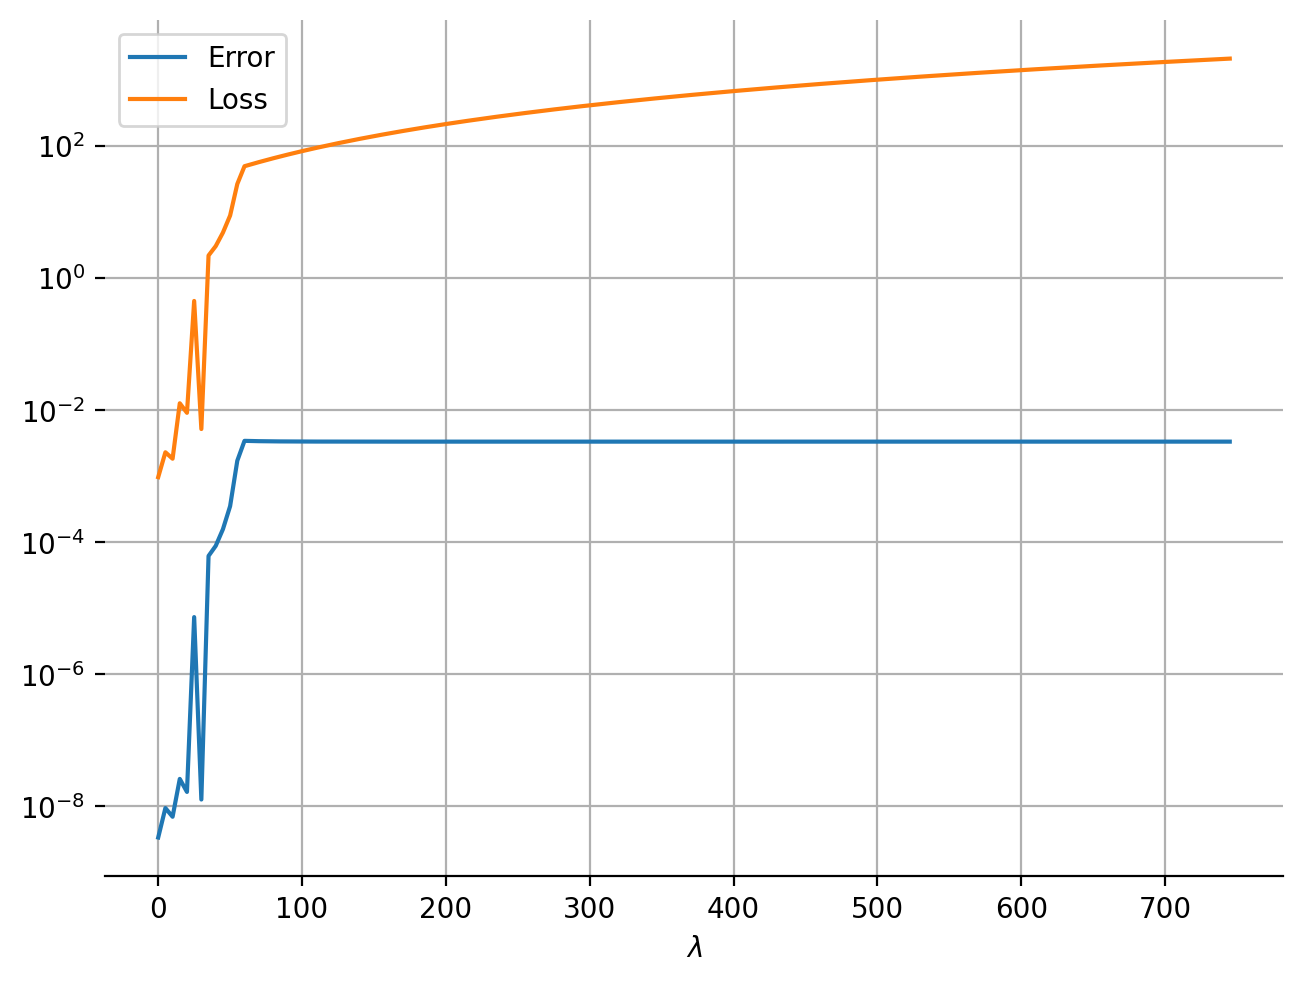

In [ ]:
fig, ax = plt.subplots()
ax.plot(C, DATA41, c="C0", label="Error")
ax.plot(C, DATA42, c="C1", label="Loss")

ax.set(
    yscale="log",
    xlabel=r"$\lambda$"
)
ax.grid()
ax.legend()
ax.spines[["top", "right", "left"]].set_visible(False)
pass

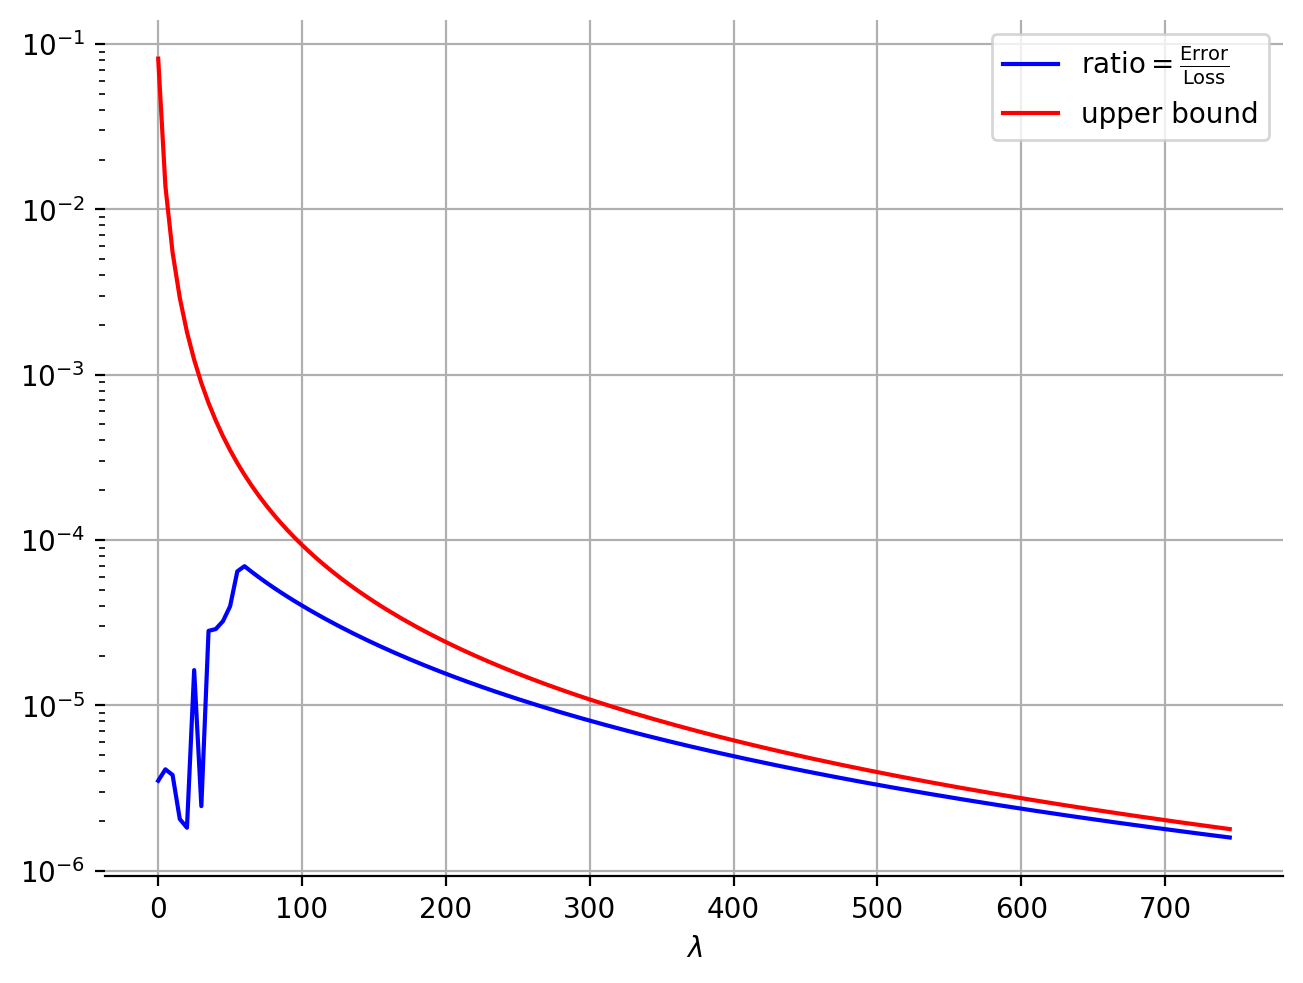

In [ ]:
fig, ax = plt.subplots()
ax.plot(C, RATIO4, c="blue", label=r"ratio$=\frac{\sf Error}{\sf Loss}$")
ax.plot(C, 4/(k+2*C)**2, c="red", label="upper bound")

ax.set(
    yscale="log",
    xlabel=r"$\lambda$"
)
ax.grid()
ax.legend()
ax.spines[["top", "right", "left"]].set_visible(False)
pass

In [ ]:
K=np.arange(0,750,5)
c=7

In [ ]:
DATA51=[]
DATA52=[]
RATIO5=[]

for k in K:
    torch.manual_seed(78)
    model = MLP(1, 50, 50, 1)
    batch_size = 10000
    n_epochs = 500
    print_interval = n_epochs // 10
    learning_rate = 0.1
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer=optimizer,
                                            lr_lambda=lambda epoch: 0.98 ** epoch,
                                            last_epoch=-1,
                                            verbose=False)

    for epoch in tqdm(range(n_epochs)):
        optimizer.zero_grad()

        # 무작위 t 생성 후 y 계산
        t = torch.empty(batch_size, 1).uniform_(*domain).requires_grad_()
        y = t*(1-t)*model(t)+t
        y_e = t*(1-t)*torch.exp(t)+t**2
        y_t = grad(y, t)
        y_tt = grad(y_t,t)

        # Loss
        loss_de = F.mse_loss(y_tt+k*t*y_t-c*y+(k*t**3+(k-c+1)*t**2+(3-k+c)*t)*torch.exp(t)+c*t**2-2*k*t**2-2, torch.zeros_like(y_t))
        loss = loss_de
        realloss=F.mse_loss(y-y_e, torch.zeros_like(y))
        # Backprop
        loss.backward()
        optimizer.step()
        scheduler.step()
        if epoch % print_interval == 0:
            print(f"{epoch = }, loss_de = {loss_de.item():.4f}")
        if epoch==n_epochs-1:
            print(realloss.item())
            DATA51.append(realloss.item())
            DATA52.append(loss.item())
            RATIO5.append(realloss.item()/loss.item())


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 17.5180
epoch = 50, loss_de = 0.1735
epoch = 100, loss_de = 0.0037
epoch = 150, loss_de = 0.0028
epoch = 200, loss_de = 0.0026
epoch = 250, loss_de = 0.0024
epoch = 300, loss_de = 0.0025
epoch = 350, loss_de = 0.0024
epoch = 400, loss_de = 0.0024
epoch = 450, loss_de = 0.0024
2.0545654066950192e-08


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 36.7503
epoch = 50, loss_de = 0.0880
epoch = 100, loss_de = 0.0049
epoch = 150, loss_de = 0.0024
epoch = 200, loss_de = 0.0020
epoch = 250, loss_de = 0.0017
epoch = 300, loss_de = 0.0018
epoch = 350, loss_de = 0.0017
epoch = 400, loss_de = 0.0017
epoch = 450, loss_de = 0.0017
6.986133005426609e-09


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 66.5412
epoch = 50, loss_de = 0.3267
epoch = 100, loss_de = 0.0082
epoch = 150, loss_de = 0.0043
epoch = 200, loss_de = 0.0036
epoch = 250, loss_de = 0.0032
epoch = 300, loss_de = 0.0033
epoch = 350, loss_de = 0.0032
epoch = 400, loss_de = 0.0032
epoch = 450, loss_de = 0.0032
7.627423137535061e-09


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 106.8907
epoch = 50, loss_de = 0.5789
epoch = 100, loss_de = 0.0042
epoch = 150, loss_de = 0.0012
epoch = 200, loss_de = 0.0011
epoch = 250, loss_de = 0.0010
epoch = 300, loss_de = 0.0010
epoch = 350, loss_de = 0.0010
epoch = 400, loss_de = 0.0010
epoch = 450, loss_de = 0.0010
1.918774472642326e-09


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 157.7990
epoch = 50, loss_de = 33.3877
epoch = 100, loss_de = 33.3495
epoch = 150, loss_de = 33.3423
epoch = 200, loss_de = 33.9159
epoch = 250, loss_de = 33.4827
epoch = 300, loss_de = 33.6982
epoch = 350, loss_de = 33.2160
epoch = 400, loss_de = 33.2927
epoch = 450, loss_de = 33.1794
0.013462929055094719


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 219.2658
epoch = 50, loss_de = 43.8050
epoch = 100, loss_de = 43.5954
epoch = 150, loss_de = 43.6368
epoch = 200, loss_de = 44.5173
epoch = 250, loss_de = 43.8102
epoch = 300, loss_de = 43.9575
epoch = 350, loss_de = 43.5563
epoch = 400, loss_de = 43.5802
epoch = 450, loss_de = 43.4904
0.013289111666381359


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 291.2913
epoch = 50, loss_de = 56.4188
epoch = 100, loss_de = 56.0134
epoch = 150, loss_de = 56.1080
epoch = 200, loss_de = 57.3519
epoch = 250, loss_de = 56.3088
epoch = 300, loss_de = 56.3902
epoch = 350, loss_de = 56.0747
epoch = 400, loss_de = 56.0461
epoch = 450, loss_de = 55.9883
0.013041906990110874


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 373.8755
epoch = 50, loss_de = 71.2146
epoch = 100, loss_de = 70.5883
epoch = 150, loss_de = 70.7410
epoch = 200, loss_de = 72.4035
epoch = 250, loss_de = 70.9651
epoch = 300, loss_de = 70.9809
epoch = 350, loss_de = 70.7580
epoch = 400, loss_de = 70.6757
epoch = 450, loss_de = 70.6581
0.01279212161898613


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 467.0183
epoch = 50, loss_de = 88.1813
epoch = 100, loss_de = 87.3082
epoch = 150, loss_de = 87.5241
epoch = 200, loss_de = 89.6597
epoch = 250, loss_de = 87.7680
epoch = 300, loss_de = 87.7173
epoch = 350, loss_de = 87.5954
epoch = 400, loss_de = 87.4574
epoch = 450, loss_de = 87.4879
0.012562056072056293


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 570.7197
epoch = 50, loss_de = 107.5062
epoch = 100, loss_de = 106.1977
epoch = 150, loss_de = 106.4524
epoch = 200, loss_de = 109.1118
epoch = 250, loss_de = 106.7093
epoch = 300, loss_de = 106.5902
epoch = 350, loss_de = 106.5790
epoch = 400, loss_de = 106.3826
epoch = 450, loss_de = 106.4693
0.012356819584965706


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 684.9799
epoch = 50, loss_de = 128.8326
epoch = 100, loss_de = 127.1895
epoch = 150, loss_de = 127.5134
epoch = 200, loss_de = 130.7541
epoch = 250, loss_de = 127.7835
epoch = 300, loss_de = 127.5938
epoch = 350, loss_de = 127.7032
epoch = 400, loss_de = 127.4453
epoch = 450, loss_de = 127.5962
0.012175746262073517


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 809.7986
epoch = 50, loss_de = 152.3150
epoch = 100, loss_de = 150.3074
epoch = 150, loss_de = 150.7056
epoch = 200, loss_de = 154.5820
epoch = 250, loss_de = 150.9862
epoch = 300, loss_de = 150.7232
epoch = 350, loss_de = 150.9638
epoch = 400, loss_de = 150.6411
epoch = 450, loss_de = 150.8644
0.012016371823847294


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 945.1761
epoch = 50, loss_de = 177.9519
epoch = 100, loss_de = 175.5482
epoch = 150, loss_de = 176.0260
epoch = 200, loss_de = 180.5923
epoch = 250, loss_de = 176.3143
epoch = 300, loss_de = 175.9752
epoch = 350, loss_de = 176.3578
epoch = 400, loss_de = 175.9669
epoch = 450, loss_de = 176.2707
0.011875842697918415


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 1091.1122
epoch = 50, loss_de = 205.7372
epoch = 100, loss_de = 202.9093
epoch = 150, loss_de = 203.4722
epoch = 200, loss_de = 208.7828
epoch = 250, loss_de = 203.7656
epoch = 300, loss_de = 203.3473
epoch = 350, loss_de = 203.8831
epoch = 400, loss_de = 203.4203
epoch = 450, loss_de = 203.8127
0.011751491576433182


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 1247.6069
epoch = 50, loss_de = 235.6726
epoch = 100, loss_de = 232.3891
epoch = 150, loss_de = 233.0424
epoch = 200, loss_de = 239.1517
epoch = 250, loss_de = 233.3383
epoch = 300, loss_de = 232.8376
epoch = 350, loss_de = 233.5379
epoch = 400, loss_de = 232.9994
epoch = 450, loss_de = 233.4887
0.011640917509794235


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 1414.6603
epoch = 50, loss_de = 267.7531
epoch = 100, loss_de = 263.9859
epoch = 150, loss_de = 264.7354
epoch = 200, loss_de = 271.6975
epoch = 250, loss_de = 265.0309
epoch = 300, loss_de = 264.4446
epoch = 350, loss_de = 265.3208
epoch = 400, loss_de = 264.7029
epoch = 450, loss_de = 265.2973
0.011542178690433502


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 1592.2722
epoch = 50, loss_de = 301.9806
epoch = 100, loss_de = 297.6989
epoch = 150, loss_de = 298.5499
epoch = 200, loss_de = 306.4193
epoch = 250, loss_de = 298.8427
epoch = 300, loss_de = 298.1672
epoch = 350, loss_de = 299.2310
epoch = 400, loss_de = 298.5298
epoch = 450, loss_de = 299.2375
0.011453567072749138


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 1780.4430
epoch = 50, loss_de = 338.3541
epoch = 100, loss_de = 333.5271
epoch = 150, loss_de = 334.4852
epoch = 200, loss_de = 343.3162
epoch = 250, loss_de = 334.7726
epoch = 300, loss_de = 334.0046
epoch = 350, loss_de = 335.2676
epoch = 400, loss_de = 334.4792
epoch = 450, loss_de = 335.3085
0.011373642832040787


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 1979.1724
epoch = 50, loss_de = 376.8761
epoch = 100, loss_de = 371.4698
epoch = 150, loss_de = 372.5406
epoch = 200, loss_de = 382.3877
epoch = 250, loss_de = 372.8200
epoch = 300, loss_de = 371.9561
epoch = 350, loss_de = 373.4299
epoch = 400, loss_de = 372.5504
epoch = 450, loss_de = 373.5095
0.011301283724606037


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 2188.4604
epoch = 50, loss_de = 417.5394
epoch = 100, loss_de = 411.5267
epoch = 150, loss_de = 412.7157
epoch = 200, loss_de = 423.6331
epoch = 250, loss_de = 412.9844
epoch = 300, loss_de = 412.0211
epoch = 350, loss_de = 413.7173
epoch = 400, loss_de = 412.7427
epoch = 450, loss_de = 413.8401
0.011235508136451244


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 2408.3071
epoch = 50, loss_de = 460.3469
epoch = 100, loss_de = 453.6969
epoch = 150, loss_de = 455.0097
epoch = 200, loss_de = 467.0519
epoch = 250, loss_de = 455.2654
epoch = 300, loss_de = 454.1992
epoch = 350, loss_de = 456.1297
epoch = 400, loss_de = 455.0561
epoch = 450, loss_de = 456.2997
0.011175471358001232


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 2638.7124
epoch = 50, loss_de = 505.3020
epoch = 100, loss_de = 497.9803
epoch = 150, loss_de = 499.4226
epoch = 200, loss_de = 512.6439
epoch = 250, loss_de = 499.6625
epoch = 300, loss_de = 498.4897
epoch = 350, loss_de = 500.6667
epoch = 400, loss_de = 499.4897
epoch = 450, loss_de = 500.8881
0.01112047303467989


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 2879.6765
epoch = 50, loss_de = 552.3968
epoch = 100, loss_de = 544.3766
epoch = 150, loss_de = 545.9540
epoch = 200, loss_de = 560.4088
epoch = 250, loss_de = 546.1756
epoch = 300, loss_de = 544.8928
epoch = 350, loss_de = 547.3276
epoch = 400, loss_de = 546.0436
epoch = 450, loss_de = 547.6050
0.0110698863863945


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 3131.1987
epoch = 50, loss_de = 601.6346
epoch = 100, loss_de = 592.8853
epoch = 150, loss_de = 594.6035
epoch = 200, loss_de = 610.3463
epoch = 250, loss_de = 594.8042
epoch = 300, loss_de = 593.4078
epoch = 350, loss_de = 596.1124
epoch = 400, loss_de = 594.7172
epoch = 450, loss_de = 596.4500
0.011023243889212608


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 3393.2805
epoch = 50, loss_de = 653.0156
epoch = 100, loss_de = 643.5065
epoch = 150, loss_de = 645.3710
epoch = 200, loss_de = 662.4563
epoch = 250, loss_de = 645.5483
epoch = 300, loss_de = 644.0347
epoch = 350, loss_de = 647.0210
epoch = 400, loss_de = 645.5106
epoch = 450, loss_de = 647.4230
0.010980120860040188


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 3665.9199
epoch = 50, loss_de = 706.5393
epoch = 100, loss_de = 696.2397
epoch = 150, loss_de = 698.2565
epoch = 200, loss_de = 716.7384
epoch = 250, loss_de = 698.4077
epoch = 300, loss_de = 696.7730
epoch = 350, loss_de = 700.0532
epoch = 400, loss_de = 698.4235
epoch = 450, loss_de = 700.5236
0.010940131731331348


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 3949.1184
epoch = 50, loss_de = 762.2054
epoch = 100, loss_de = 751.0853
epoch = 150, loss_de = 753.2595
epoch = 200, loss_de = 773.1925
epoch = 250, loss_de = 753.3823
epoch = 300, loss_de = 751.6231
epoch = 350, loss_de = 755.2089
epoch = 400, loss_de = 753.4558
epoch = 450, loss_de = 755.7523
0.010902930051088333


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 4242.8750
epoch = 50, loss_de = 820.0143
epoch = 100, loss_de = 808.0424
epoch = 150, loss_de = 810.3800
epoch = 200, loss_de = 831.8185
epoch = 250, loss_de = 810.4717
epoch = 300, loss_de = 808.5845
epoch = 350, loss_de = 812.4875
epoch = 400, loss_de = 810.6072
epoch = 450, loss_de = 813.1082
0.010868250392377377


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 4547.1914
epoch = 50, loss_de = 879.9655
epoch = 100, loss_de = 867.1113
epoch = 150, loss_de = 869.6180
epoch = 200, loss_de = 892.6168
epoch = 250, loss_de = 869.6759
epoch = 300, loss_de = 867.6568
epoch = 350, loss_de = 871.8896
epoch = 400, loss_de = 869.8776
epoch = 450, loss_de = 872.5916
0.010835850611329079


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 4862.0664
epoch = 50, loss_de = 942.0591
epoch = 100, loss_de = 928.2919
epoch = 150, loss_de = 930.9733
epoch = 200, loss_de = 955.5863
epoch = 250, loss_de = 930.9949
epoch = 300, loss_de = 928.8404
epoch = 350, loss_de = 933.4142
epoch = 400, loss_de = 931.2672
epoch = 450, loss_de = 934.2022
0.010805511847138405


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 5187.4990
epoch = 50, loss_de = 1006.2946
epoch = 100, loss_de = 991.5841
epoch = 150, loss_de = 994.4458
epoch = 200, loss_de = 1020.7276
epoch = 250, loss_de = 994.4286
epoch = 300, loss_de = 992.1350
epoch = 350, loss_de = 997.0624
epoch = 400, loss_de = 994.7754
epoch = 450, loss_de = 997.9400
0.01077705342322588


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 5523.4912
epoch = 50, loss_de = 1072.6729
epoch = 100, loss_de = 1056.9878
epoch = 150, loss_de = 1060.0353
epoch = 200, loss_de = 1088.0404
epoch = 250, loss_de = 1059.9768
epoch = 300, loss_de = 1057.5406
epoch = 350, loss_de = 1062.8333
epoch = 400, loss_de = 1060.4026
epoch = 450, loss_de = 1063.8051
0.010750317946076393


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 5870.0415
epoch = 50, loss_de = 1141.1929
epoch = 100, loss_de = 1124.5028
epoch = 150, loss_de = 1127.7421
epoch = 200, loss_de = 1157.5249
epoch = 250, loss_de = 1127.6398
epoch = 300, loss_de = 1125.0569
epoch = 350, loss_de = 1130.7269
epoch = 400, loss_de = 1128.1487
epoch = 450, loss_de = 1131.7970
0.010725125670433044


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 6227.1514
epoch = 50, loss_de = 1211.8546
epoch = 100, loss_de = 1194.1292
epoch = 150, loss_de = 1197.5657
epoch = 200, loss_de = 1229.1808
epoch = 250, loss_de = 1197.4169
epoch = 300, loss_de = 1194.6840
epoch = 350, loss_de = 1200.7435
epoch = 400, loss_de = 1198.0127
epoch = 450, loss_de = 1201.9161
0.010701356455683708


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 6594.8184
epoch = 50, loss_de = 1284.6587
epoch = 100, loss_de = 1265.8669
epoch = 150, loss_de = 1269.5066
epoch = 200, loss_de = 1303.0079
epoch = 250, loss_de = 1269.3085
epoch = 300, loss_de = 1266.4218
epoch = 350, loss_de = 1272.8826
epoch = 400, loss_de = 1269.9961
epoch = 450, loss_de = 1274.1620
0.010678881779313087


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 6973.0439
epoch = 50, loss_de = 1359.6049
epoch = 100, loss_de = 1339.7159
epoch = 150, loss_de = 1343.5638
epoch = 200, loss_de = 1379.0066
epoch = 250, loss_de = 1343.3146
epoch = 300, loss_de = 1340.2708
epoch = 350, loss_de = 1347.1442
epoch = 400, loss_de = 1344.0979
epoch = 450, loss_de = 1348.5352
0.01065763644874096


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 7361.8306
epoch = 50, loss_de = 1436.6926
epoch = 100, loss_de = 1415.6761
epoch = 150, loss_de = 1419.7384
epoch = 200, loss_de = 1457.1764
epoch = 250, loss_de = 1419.4349
epoch = 300, loss_de = 1416.2299
epoch = 350, loss_de = 1423.5289
epoch = 400, loss_de = 1420.3181
epoch = 450, loss_de = 1425.0345
0.010637504048645496


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 7761.1738
epoch = 50, loss_de = 1515.9222
epoch = 100, loss_de = 1493.7471
epoch = 150, loss_de = 1498.0297
epoch = 200, loss_de = 1537.5178
epoch = 250, loss_de = 1497.6697
epoch = 300, loss_de = 1494.2996
epoch = 350, loss_de = 1502.0363
epoch = 400, loss_de = 1498.6569
epoch = 450, loss_de = 1503.6611
0.01061841007322073


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 8171.0762
epoch = 50, loss_de = 1597.2937
epoch = 100, loss_de = 1573.9298
epoch = 150, loss_de = 1578.4380
epoch = 200, loss_de = 1620.0300
epoch = 250, loss_de = 1578.0186
epoch = 300, loss_de = 1574.4803
epoch = 350, loss_de = 1582.6658
epoch = 400, loss_de = 1579.1143
epoch = 450, loss_de = 1584.4146
0.010600249283015728


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 8591.5371
epoch = 50, loss_de = 1680.8074
epoch = 100, loss_de = 1656.2235
epoch = 150, loss_de = 1660.9628
epoch = 200, loss_de = 1704.7136
epoch = 250, loss_de = 1660.4817
epoch = 300, loss_de = 1656.7710
epoch = 350, loss_de = 1665.4182
epoch = 400, loss_de = 1661.6899
epoch = 450, loss_de = 1667.2948
0.010582983493804932


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 9022.5586
epoch = 50, loss_de = 1766.4624
epoch = 100, loss_de = 1740.6284
epoch = 150, loss_de = 1745.6044
epoch = 200, loss_de = 1791.5684
epoch = 250, loss_de = 1745.0592
epoch = 300, loss_de = 1741.1724
epoch = 350, loss_de = 1750.2928
epoch = 400, loss_de = 1746.3842
epoch = 450, loss_de = 1752.3018
0.010566537268459797


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 9464.1348
epoch = 50, loss_de = 1854.2592
epoch = 100, loss_de = 1827.1438
epoch = 150, loss_de = 1832.3628
epoch = 200, loss_de = 1880.5944
epoch = 250, loss_de = 1831.7502
epoch = 300, loss_de = 1827.6846
epoch = 350, loss_de = 1837.2900
epoch = 400, loss_de = 1833.1967
epoch = 450, loss_de = 1839.4352
0.010550860315561295


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 9916.2725
epoch = 50, loss_de = 1944.1980
epoch = 100, loss_de = 1915.7706
epoch = 150, loss_de = 1921.2380
epoch = 200, loss_de = 1971.7914
epoch = 250, loss_de = 1920.5555
epoch = 300, loss_de = 1916.3068
epoch = 350, loss_de = 1926.4100
epoch = 400, loss_de = 1922.1274
epoch = 450, loss_de = 1928.6956
0.010535885579884052


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 10378.9678
epoch = 50, loss_de = 2036.2782
epoch = 100, loss_de = 2006.5085
epoch = 150, loss_de = 2012.2299
epoch = 200, loss_de = 2065.1594
epoch = 250, loss_de = 2011.4753
epoch = 300, loss_de = 2007.0400
epoch = 350, loss_de = 2017.6519
epoch = 400, loss_de = 2013.1768
epoch = 450, loss_de = 2020.0826
0.010521595366299152


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 10852.2227
epoch = 50, loss_de = 2130.5007
epoch = 100, loss_de = 2099.3567
epoch = 150, loss_de = 2105.3386
epoch = 200, loss_de = 2160.6992
epoch = 250, loss_de = 2104.5095
epoch = 300, loss_de = 2099.8833
epoch = 350, loss_de = 2111.0166
epoch = 400, loss_de = 2106.3442
epoch = 450, loss_de = 2113.5957
0.01050790399312973


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 11336.0371
epoch = 50, loss_de = 2226.8643
epoch = 100, loss_de = 2194.3167
epoch = 150, loss_de = 2200.5632
epoch = 200, loss_de = 2258.4097
epoch = 250, loss_de = 2199.6572
epoch = 300, loss_de = 2194.8364
epoch = 350, loss_de = 2206.5037
epoch = 400, loss_de = 2201.6299
epoch = 450, loss_de = 2209.2363
0.01049478817731142


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 11830.4062
epoch = 50, loss_de = 2325.3696
epoch = 100, loss_de = 2291.3875
epoch = 150, loss_de = 2297.9053
epoch = 200, loss_de = 2358.2905
epoch = 250, loss_de = 2296.9192
epoch = 300, loss_de = 2291.9009
epoch = 350, loss_de = 2304.1125
epoch = 400, loss_de = 2299.0339
epoch = 450, loss_de = 2307.0032
0.010482224635779858


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 12335.3369
epoch = 50, loss_de = 2426.0168
epoch = 100, loss_de = 2390.5688
epoch = 150, loss_de = 2397.3633
epoch = 200, loss_de = 2460.3425
epoch = 250, loss_de = 2396.2952
epoch = 300, loss_de = 2391.0754
epoch = 350, loss_de = 2403.8447
epoch = 400, loss_de = 2398.5564
epoch = 450, loss_de = 2406.8967
0.010470176115632057


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 12850.8252
epoch = 50, loss_de = 2528.8027
epoch = 100, loss_de = 2491.8611
epoch = 150, loss_de = 2498.9385
epoch = 200, loss_de = 2564.5669
epoch = 250, loss_de = 2497.7852
epoch = 300, loss_de = 2492.3601
epoch = 350, loss_de = 2505.6985
epoch = 400, loss_de = 2500.1963
epoch = 450, loss_de = 2508.9160
0.01045859232544899


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 13376.8740
epoch = 50, loss_de = 2633.7322
epoch = 100, loss_de = 2595.2646
epoch = 150, loss_de = 2602.6299
epoch = 200, loss_de = 2670.9607
epoch = 250, loss_de = 2601.3894
epoch = 300, loss_de = 2595.7549
epoch = 350, loss_de = 2609.6753
epoch = 400, loss_de = 2603.9561
epoch = 450, loss_de = 2613.0627
0.010447470471262932


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 13913.4805
epoch = 50, loss_de = 2740.8047
epoch = 100, loss_de = 2700.7791
epoch = 150, loss_de = 2708.4375
epoch = 200, loss_de = 2779.5264
epoch = 250, loss_de = 2707.1074
epoch = 300, loss_de = 2701.2600
epoch = 350, loss_de = 2715.7739
epoch = 400, loss_de = 2709.8333
epoch = 450, loss_de = 2719.3367
0.010436780750751495


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 14460.6445
epoch = 50, loss_de = 2850.0188
epoch = 100, loss_de = 2808.4043
epoch = 150, loss_de = 2816.3625
epoch = 200, loss_de = 2890.2629
epoch = 250, loss_de = 2814.9397
epoch = 300, loss_de = 2808.8762
epoch = 350, loss_de = 2823.9951
epoch = 400, loss_de = 2817.8281
epoch = 450, loss_de = 2827.7361
0.010426498018205166


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 15018.3691
epoch = 50, loss_de = 2961.3733
epoch = 100, loss_de = 2918.1409
epoch = 150, loss_de = 2926.4038
epoch = 200, loss_de = 3003.1704
epoch = 250, loss_de = 2924.8857
epoch = 300, loss_de = 2918.6028
epoch = 350, loss_de = 2934.3386
epoch = 400, loss_de = 2927.9419
epoch = 450, loss_de = 2938.2622
0.010416592471301556


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 15586.6494
epoch = 50, loss_de = 3074.8704
epoch = 100, loss_de = 3029.9873
epoch = 150, loss_de = 3038.5610
epoch = 200, loss_de = 3118.2495
epoch = 250, loss_de = 3036.9456
epoch = 300, loss_de = 3030.4387
epoch = 350, loss_de = 3046.8044
epoch = 400, loss_de = 3040.1736
epoch = 450, loss_de = 3050.9153
0.010407039895653725


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 16165.4912
epoch = 50, loss_de = 3190.5083
epoch = 100, loss_de = 3143.9448
epoch = 150, loss_de = 3152.8359
epoch = 200, loss_de = 3235.4988
epoch = 250, loss_de = 3151.1201
epoch = 300, loss_de = 3144.3853
epoch = 350, loss_de = 3161.3926
epoch = 400, loss_de = 3154.5234
epoch = 450, loss_de = 3165.6946
0.010397842153906822


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 16754.8906
epoch = 50, loss_de = 3308.2876
epoch = 100, loss_de = 3260.0142
epoch = 150, loss_de = 3269.2266
epoch = 200, loss_de = 3354.9189
epoch = 250, loss_de = 3267.4077
epoch = 300, loss_de = 3260.4421
epoch = 350, loss_de = 3278.1033
epoch = 400, loss_de = 3270.9919
epoch = 450, loss_de = 3282.6001
0.010388966649770737


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 17354.8477
epoch = 50, loss_de = 3428.2097
epoch = 100, loss_de = 3378.1936
epoch = 150, loss_de = 3387.7339
epoch = 200, loss_de = 3476.5107
epoch = 250, loss_de = 3385.8103
epoch = 300, loss_de = 3378.6101
epoch = 350, loss_de = 3396.9363
epoch = 400, loss_de = 3389.5776
epoch = 450, loss_de = 3401.6335
0.010380392894148827


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 17965.3633
epoch = 50, loss_de = 3550.2727
epoch = 100, loss_de = 3498.4836
epoch = 150, loss_de = 3508.3584
epoch = 200, loss_de = 3600.2727
epoch = 250, loss_de = 3506.3257
epoch = 300, loss_de = 3498.8877
epoch = 350, loss_de = 3517.8904
epoch = 400, loss_de = 3510.2825
epoch = 450, loss_de = 3522.7920
0.01037212461233139


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 18586.4414
epoch = 50, loss_de = 3674.4761
epoch = 100, loss_de = 3620.8855
epoch = 150, loss_de = 3631.0989
epoch = 200, loss_de = 3726.2068
epoch = 250, loss_de = 3628.9563
epoch = 300, loss_de = 3621.2756
epoch = 350, loss_de = 3640.9685
epoch = 400, loss_de = 3633.1057
epoch = 450, loss_de = 3646.0769
0.010364123620092869


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 19218.0762
epoch = 50, loss_de = 3800.8232
epoch = 100, loss_de = 3745.3960
epoch = 150, loss_de = 3755.9556
epoch = 200, loss_de = 3854.3113
epoch = 250, loss_de = 3753.7004
epoch = 300, loss_de = 3745.7727
epoch = 350, loss_de = 3766.1685
epoch = 400, loss_de = 3758.0457
epoch = 450, loss_de = 3771.4893
0.010356377810239792


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 19860.2676
epoch = 50, loss_de = 3929.3096
epoch = 100, loss_de = 3872.0195
epoch = 150, loss_de = 3882.9292
epoch = 200, loss_de = 3984.5859
epoch = 250, loss_de = 3880.5583
epoch = 300, loss_de = 3872.3823
epoch = 350, loss_de = 3893.4893
epoch = 400, loss_de = 3885.1047
epoch = 450, loss_de = 3899.0271
0.010348886251449585


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 20513.0176
epoch = 50, loss_de = 4059.9392
epoch = 100, loss_de = 4000.7537
epoch = 150, loss_de = 4012.0193
epoch = 200, loss_de = 4117.0322
epoch = 250, loss_de = 4009.5305
epoch = 300, loss_de = 4001.1001
epoch = 350, loss_de = 4022.9329
epoch = 400, loss_de = 4014.2825
epoch = 450, loss_de = 4028.6931
0.010341634042561054


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 21176.3301
epoch = 50, loss_de = 4192.7095
epoch = 100, loss_de = 4131.5977
epoch = 150, loss_de = 4143.2251
epoch = 200, loss_de = 4251.6484
epoch = 250, loss_de = 4140.6152
epoch = 300, loss_de = 4131.9297
epoch = 350, loss_de = 4154.5005
epoch = 400, loss_de = 4145.5771
epoch = 450, loss_de = 4160.4834
0.010334611870348454


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 21850.1992
epoch = 50, loss_de = 4327.6226
epoch = 100, loss_de = 4264.5532
epoch = 150, loss_de = 4276.5488
epoch = 200, loss_de = 4388.4370
epoch = 250, loss_de = 4273.8149
epoch = 300, loss_de = 4264.8682
epoch = 350, loss_de = 4288.1885
epoch = 400, loss_de = 4278.9902
epoch = 450, loss_de = 4294.4019
0.010327804833650589


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 22534.6230
epoch = 50, loss_de = 4464.6753
epoch = 100, loss_de = 4399.6187
epoch = 150, loss_de = 4411.9873
epoch = 200, loss_de = 4527.3970
epoch = 250, loss_de = 4409.1294
epoch = 300, loss_de = 4399.9170
epoch = 350, loss_de = 4423.9995
epoch = 400, loss_de = 4414.5220
epoch = 450, loss_de = 4430.4463
0.010321201756596565


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 23229.6113
epoch = 50, loss_de = 4603.8706
epoch = 100, loss_de = 4536.7964
epoch = 150, loss_de = 4549.5444
epoch = 200, loss_de = 4668.5259
epoch = 250, loss_de = 4546.5566
epoch = 300, loss_de = 4537.0771
epoch = 350, loss_de = 4561.9336
epoch = 400, loss_de = 4552.1719
epoch = 450, loss_de = 4568.6167
0.010314795188605785


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 23935.1543
epoch = 50, loss_de = 4745.2075
epoch = 100, loss_de = 4676.0835
epoch = 150, loss_de = 4689.2158
epoch = 200, loss_de = 4811.8271
epoch = 250, loss_de = 4686.0977
epoch = 300, loss_de = 4676.3467
epoch = 350, loss_de = 4701.9878
epoch = 400, loss_de = 4691.9395
epoch = 450, loss_de = 4708.9150
0.010308578610420227


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 24651.2617
epoch = 50, loss_de = 4888.6855
epoch = 100, loss_de = 4817.4824
epoch = 150, loss_de = 4831.0049
epoch = 200, loss_de = 4957.2988
epoch = 250, loss_de = 4827.7534
epoch = 300, loss_de = 4817.7266
epoch = 350, loss_de = 4844.1660
epoch = 400, loss_de = 4833.8262
epoch = 450, loss_de = 4851.3389
0.010302536189556122


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 25377.9238
epoch = 50, loss_de = 5034.3057
epoch = 100, loss_de = 4960.9907
epoch = 150, loss_de = 4974.9102
epoch = 200, loss_de = 5104.9414
epoch = 250, loss_de = 4971.5225
epoch = 300, loss_de = 4961.2178
epoch = 350, loss_de = 4988.4658
epoch = 400, loss_de = 4977.8296
epoch = 450, loss_de = 4995.8887
0.010296676307916641


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 26115.1426
epoch = 50, loss_de = 5182.0669
epoch = 100, loss_de = 5106.6108
epoch = 150, loss_de = 5120.9326
epoch = 200, loss_de = 5254.7544
epoch = 250, loss_de = 5117.4058
epoch = 300, loss_de = 5106.8169
epoch = 350, loss_de = 5134.8877
epoch = 400, loss_de = 5123.9526
epoch = 450, loss_de = 5142.5654
0.010290986858308315


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 26862.9180
epoch = 50, loss_de = 5331.9697
epoch = 100, loss_de = 5254.3418
epoch = 150, loss_de = 5269.0698
epoch = 200, loss_de = 5406.7393
epoch = 250, loss_de = 5265.4028
epoch = 300, loss_de = 5254.5273
epoch = 350, loss_de = 5283.4312
epoch = 400, loss_de = 5272.1934
epoch = 450, loss_de = 5291.3687
0.010285452008247375


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 27621.2578
epoch = 50, loss_de = 5484.0137
epoch = 100, loss_de = 5404.1836
epoch = 150, loss_de = 5419.3252
epoch = 200, loss_de = 5560.8936
epoch = 250, loss_de = 5415.5137
epoch = 300, loss_de = 5404.3486
epoch = 350, loss_de = 5434.0986
epoch = 400, loss_de = 5422.5508
epoch = 450, loss_de = 5442.2983
0.01028007734566927


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 28390.1562
epoch = 50, loss_de = 5638.2002
epoch = 100, loss_de = 5556.1353
epoch = 150, loss_de = 5571.6958
epoch = 200, loss_de = 5717.2207
epoch = 250, loss_de = 5567.7397
epoch = 300, loss_de = 5556.2793
epoch = 350, loss_de = 5586.8882
epoch = 400, loss_de = 5575.0273
epoch = 450, loss_de = 5595.3535
0.010274839587509632


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 29169.6133
epoch = 50, loss_de = 5794.5273
epoch = 100, loss_de = 5710.1992
epoch = 150, loss_de = 5726.1841
epoch = 200, loss_de = 5875.7183
epoch = 250, loss_de = 5722.0781
epoch = 300, loss_de = 5710.3208
epoch = 350, loss_de = 5741.7988
epoch = 400, loss_de = 5729.6216
epoch = 450, loss_de = 5750.5356
0.010269742459058762


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 29959.6230
epoch = 50, loss_de = 5952.9951
epoch = 100, loss_de = 5866.3726
epoch = 150, loss_de = 5882.7876
epoch = 200, loss_de = 6036.3862
epoch = 250, loss_de = 5878.5298
epoch = 300, loss_de = 5866.4731
epoch = 350, loss_de = 5898.8315
epoch = 400, loss_de = 5886.3350
epoch = 450, loss_de = 5907.8442
0.01026477012783289


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 30760.1992
epoch = 50, loss_de = 6113.6060
epoch = 100, loss_de = 6024.6582
epoch = 150, loss_de = 6041.5078
epoch = 200, loss_de = 6199.2231
epoch = 250, loss_de = 6037.0962
epoch = 300, loss_de = 6024.7329
epoch = 350, loss_de = 6057.9868
epoch = 400, loss_de = 6045.1655
epoch = 450, loss_de = 6067.2812
0.010259938426315784


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 31571.3320
epoch = 50, loss_de = 6276.3574
epoch = 100, loss_de = 6185.0537
epoch = 150, loss_de = 6202.3457
epoch = 200, loss_de = 6364.2334
epoch = 250, loss_de = 6197.7769
epoch = 300, loss_de = 6185.1060
epoch = 350, loss_de = 6219.2656
epoch = 400, loss_de = 6206.1147
epoch = 450, loss_de = 6228.8438
0.010255228728055954


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 32393.0215
epoch = 50, loss_de = 6441.2510
epoch = 100, loss_de = 6347.5591
epoch = 150, loss_de = 6365.2998
epoch = 200, loss_de = 6531.4160
epoch = 250, loss_de = 6360.5718
epoch = 300, loss_de = 6347.5874
epoch = 350, loss_de = 6382.6650
epoch = 400, loss_de = 6369.1816
epoch = 450, loss_de = 6392.5303
0.010250633582472801


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 33225.2656
epoch = 50, loss_de = 6608.2842
epoch = 100, loss_de = 6512.1763
epoch = 150, loss_de = 6530.3677
epoch = 200, loss_de = 6700.7661
epoch = 250, loss_de = 6525.4810
epoch = 300, loss_de = 6512.1787
epoch = 350, loss_de = 6548.1880
epoch = 400, loss_de = 6534.3662
epoch = 450, loss_de = 6558.3452
0.010246160440146923


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 34068.0742
epoch = 50, loss_de = 6777.4609
epoch = 100, loss_de = 6678.9033
epoch = 150, loss_de = 6697.5552
epoch = 200, loss_de = 6872.2896
epoch = 250, loss_de = 6692.5039
epoch = 300, loss_de = 6678.8809
epoch = 350, loss_de = 6715.8320
epoch = 400, loss_de = 6701.6694
epoch = 450, loss_de = 6726.2866
0.010241786949336529


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 34921.4414
epoch = 50, loss_de = 6948.7798
epoch = 100, loss_de = 6847.7422
epoch = 150, loss_de = 6866.8584
epoch = 200, loss_de = 7045.9814
epoch = 250, loss_de = 6861.6382
epoch = 300, loss_de = 6847.6953
epoch = 350, loss_de = 6885.6001
epoch = 400, loss_de = 6871.0928
epoch = 450, loss_de = 6896.3535
0.010237528942525387


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 35785.3633
epoch = 50, loss_de = 7122.2393
epoch = 100, loss_de = 7018.6914
epoch = 150, loss_de = 7038.2769
epoch = 200, loss_de = 7221.8462
epoch = 250, loss_de = 7032.8887
epoch = 300, loss_de = 7018.6162
epoch = 350, loss_de = 7057.4878
epoch = 400, loss_de = 7042.6318
epoch = 450, loss_de = 7068.5474
0.010233372449874878


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 36659.8477
epoch = 50, loss_de = 7297.8398
epoch = 100, loss_de = 7191.7520
epoch = 150, loss_de = 7211.8120
epoch = 200, loss_de = 7399.8818
epoch = 250, loss_de = 7206.2520
epoch = 300, loss_de = 7191.6489
epoch = 350, loss_de = 7231.4990
epoch = 400, loss_de = 7216.2881
epoch = 450, loss_de = 7242.8687
0.010229316540062428


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 37544.8906
epoch = 50, loss_de = 7475.5825
epoch = 100, loss_de = 7366.9233
epoch = 150, loss_de = 7387.4658
epoch = 200, loss_de = 7580.0898
epoch = 250, loss_de = 7381.7305
epoch = 300, loss_de = 7366.7935
epoch = 350, loss_de = 7407.6318
epoch = 400, loss_de = 7392.0640
epoch = 450, loss_de = 7419.3154
0.010225348174571991


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 38440.4883
epoch = 50, loss_de = 7655.4648
epoch = 100, loss_de = 7544.2041
epoch = 150, loss_de = 7565.2344
epoch = 200, loss_de = 7762.4658
epoch = 250, loss_de = 7559.3208
epoch = 300, loss_de = 7544.0449
epoch = 350, loss_de = 7585.8882
epoch = 400, loss_de = 7569.9575
epoch = 450, loss_de = 7597.8882
0.010221472941339016


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 39346.6484
epoch = 50, loss_de = 7837.4897
epoch = 100, loss_de = 7723.5962
epoch = 150, loss_de = 7745.1177
epoch = 200, loss_de = 7947.0122
epoch = 250, loss_de = 7739.0254
epoch = 300, loss_de = 7723.4097
epoch = 350, loss_de = 7766.2656
epoch = 400, loss_de = 7749.9697
epoch = 450, loss_de = 7778.5879
0.010217693634331226


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 40263.3672
epoch = 50, loss_de = 8021.6567
epoch = 100, loss_de = 7905.1006
epoch = 150, loss_de = 7927.1182
epoch = 200, loss_de = 8133.7319
epoch = 250, loss_de = 7920.8447
epoch = 300, loss_de = 7904.8833
epoch = 350, loss_de = 7948.7656
epoch = 400, loss_de = 7932.1006
epoch = 450, loss_de = 7961.4136
0.010213993489742279


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 41190.6445
epoch = 50, loss_de = 8207.9648
epoch = 100, loss_de = 8088.7119
epoch = 150, loss_de = 8111.2378
epoch = 200, loss_de = 8322.6211
epoch = 250, loss_de = 8104.7808
epoch = 300, loss_de = 8088.4663
epoch = 350, loss_de = 8133.3872
epoch = 400, loss_de = 8116.3481
epoch = 450, loss_de = 8146.3672
0.01021038368344307


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 42128.4766
epoch = 50, loss_de = 8396.4141
epoch = 100, loss_de = 8274.4365
epoch = 150, loss_de = 8297.4717
epoch = 200, loss_de = 8513.6826
epoch = 250, loss_de = 8290.8271
epoch = 300, loss_de = 8274.1611
epoch = 350, loss_de = 8320.1318
epoch = 400, loss_de = 8302.7148
epoch = 450, loss_de = 8333.4453
0.010206849314272404


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 43076.8711
epoch = 50, loss_de = 8587.0049
epoch = 100, loss_de = 8462.2715
epoch = 150, loss_de = 8485.8223
epoch = 200, loss_de = 8706.9121
epoch = 250, loss_de = 8478.9863
epoch = 300, loss_de = 8461.9658
epoch = 350, loss_de = 8508.9990
epoch = 400, loss_de = 8491.1973
epoch = 450, loss_de = 8522.6523
0.010203401558101177


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 44035.8242
epoch = 50, loss_de = 8779.7383
epoch = 100, loss_de = 8652.2188
epoch = 150, loss_de = 8676.2910
epoch = 200, loss_de = 8902.3154
epoch = 250, loss_de = 8669.2617
epoch = 300, loss_de = 8651.8789
epoch = 350, loss_de = 8699.9863
epoch = 400, loss_de = 8681.7998
epoch = 450, loss_de = 8713.9824
0.010200029239058495


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 45005.3359
epoch = 50, loss_de = 8974.6113
epoch = 100, loss_de = 8844.2764
epoch = 150, loss_de = 8868.8740
epoch = 200, loss_de = 9099.8867
epoch = 250, loss_de = 8861.6514
epoch = 300, loss_de = 8843.9033
epoch = 350, loss_de = 8893.0986
epoch = 400, loss_de = 8874.5205
epoch = 450, loss_de = 8907.4404
0.010196722112596035


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 45985.4062
epoch = 50, loss_de = 9171.6270
epoch = 100, loss_de = 9038.4443
epoch = 150, loss_de = 9063.5762
epoch = 200, loss_de = 9299.6309
epoch = 250, loss_de = 9056.1543
epoch = 300, loss_de = 9038.0381
epoch = 350, loss_de = 9088.3330
epoch = 400, loss_de = 9069.3604
epoch = 450, loss_de = 9103.0273
0.010193489491939545


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 46976.0312
epoch = 50, loss_de = 9370.7822
epoch = 100, loss_de = 9234.7197
epoch = 150, loss_de = 9260.3877
epoch = 200, loss_de = 9501.5459
epoch = 250, loss_de = 9252.7715
epoch = 300, loss_de = 9234.2842
epoch = 350, loss_de = 9285.6865
epoch = 400, loss_de = 9266.3164
epoch = 450, loss_de = 9300.7363
0.0101903285831213


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 47977.2188
epoch = 50, loss_de = 9572.0820
epoch = 100, loss_de = 9433.1104
epoch = 150, loss_de = 9459.3213
epoch = 200, loss_de = 9705.6309
epoch = 250, loss_de = 9451.5010
epoch = 300, loss_de = 9432.6387
epoch = 350, loss_de = 9485.1631
epoch = 400, loss_de = 9465.3916
epoch = 450, loss_de = 9500.5732
0.010187222622334957


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 48988.9648
epoch = 50, loss_de = 9775.5215
epoch = 100, loss_de = 9633.6084
epoch = 150, loss_de = 9660.3721
epoch = 200, loss_de = 9911.8867
epoch = 250, loss_de = 9652.3447
epoch = 300, loss_de = 9633.1035
epoch = 350, loss_de = 9686.7637
epoch = 400, loss_de = 9666.5830
epoch = 450, loss_de = 9702.5381
0.010184189304709435


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 50011.2656
epoch = 50, loss_de = 9981.1035
epoch = 100, loss_de = 9836.2188
epoch = 150, loss_de = 9863.5391
epoch = 200, loss_de = 10120.3135
epoch = 250, loss_de = 9855.3027
epoch = 300, loss_de = 9835.6797
epoch = 350, loss_de = 9890.4854
epoch = 400, loss_de = 9869.8945
epoch = 450, loss_de = 9906.6279
0.010181213729083538


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 51044.1328
epoch = 50, loss_de = 10188.8252
epoch = 100, loss_de = 10040.9424
epoch = 150, loss_de = 10068.8203
epoch = 200, loss_de = 10330.9141
epoch = 250, loss_de = 10060.3740
epoch = 300, loss_de = 10040.3643
epoch = 350, loss_de = 10096.3301
epoch = 400, loss_de = 10075.3213
epoch = 450, loss_de = 10112.8477
0.010178308933973312


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 52087.5547
epoch = 50, loss_de = 10398.6895
epoch = 100, loss_de = 10247.7744
epoch = 150, loss_de = 10276.2188
epoch = 200, loss_de = 10543.6816
epoch = 250, loss_de = 10267.5596
epoch = 300, loss_de = 10247.1611
epoch = 350, loss_de = 10304.2969
epoch = 400, loss_de = 10282.8701
epoch = 450, loss_de = 10321.1885
0.010175453498959541


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 53141.5312
epoch = 50, loss_de = 10610.6953
epoch = 100, loss_de = 10456.7168
epoch = 150, loss_de = 10485.7344
epoch = 200, loss_de = 10758.6211
epoch = 250, loss_de = 10476.8604
epoch = 300, loss_de = 10456.0654
epoch = 350, loss_de = 10514.3838
epoch = 400, loss_de = 10492.5361
epoch = 450, loss_de = 10531.6582
0.01017265859991312


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 54206.0742
epoch = 50, loss_de = 10824.8408
epoch = 100, loss_de = 10667.7695
epoch = 150, loss_de = 10697.3633
epoch = 200, loss_de = 10975.7324
epoch = 250, loss_de = 10688.2744
epoch = 300, loss_de = 10667.0820
epoch = 350, loss_de = 10726.5947
epoch = 400, loss_de = 10704.3203
epoch = 450, loss_de = 10744.2549
0.01016991212964058


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 55281.1758
epoch = 50, loss_de = 11041.1309
epoch = 100, loss_de = 10880.9346
epoch = 150, loss_de = 10911.1113
epoch = 200, loss_de = 11195.0137
epoch = 250, loss_de = 10901.8018
epoch = 300, loss_de = 10880.2100
epoch = 350, loss_de = 10940.9287
epoch = 400, loss_de = 10918.2188
epoch = 450, loss_de = 10958.9775
0.010167229920625687


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 56366.8281
epoch = 50, loss_de = 11259.5625
epoch = 100, loss_de = 11096.2080
epoch = 150, loss_de = 11126.9795
epoch = 200, loss_de = 11416.4658
epoch = 250, loss_de = 11117.4443
epoch = 300, loss_de = 11095.4434
epoch = 350, loss_de = 11157.3828
epoch = 400, loss_de = 11134.2373
epoch = 450, loss_de = 11175.8262
0.010164587758481503


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 57463.0391
epoch = 50, loss_de = 11480.1348
epoch = 100, loss_de = 11313.5957
epoch = 150, loss_de = 11344.9561
epoch = 200, loss_de = 11640.0908
epoch = 250, loss_de = 11335.1982
epoch = 300, loss_de = 11312.7900
epoch = 350, loss_de = 11375.9619
epoch = 400, loss_de = 11352.3760
epoch = 450, loss_de = 11394.8008
0.010162003338336945


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 58569.8125
epoch = 50, loss_de = 11702.8477
epoch = 100, loss_de = 11533.0908
epoch = 150, loss_de = 11565.0547
epoch = 200, loss_de = 11865.8848
epoch = 250, loss_de = 11555.0654
epoch = 300, loss_de = 11532.2461
epoch = 350, loss_de = 11596.6611
epoch = 400, loss_de = 11572.6318
epoch = 450, loss_de = 11615.9023
0.010159462690353394


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 59687.1406
epoch = 50, loss_de = 11927.7021
epoch = 100, loss_de = 11754.6973
epoch = 150, loss_de = 11787.2686
epoch = 200, loss_de = 12093.8506
epoch = 250, loss_de = 11777.0498
epoch = 300, loss_de = 11753.8125
epoch = 350, loss_de = 11819.4814
epoch = 400, loss_de = 11795.0039
epoch = 450, loss_de = 11839.1309
0.010156970471143723


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 60815.0391
epoch = 50, loss_de = 12154.6963
epoch = 100, loss_de = 11978.4160
epoch = 150, loss_de = 12011.5977
epoch = 200, loss_de = 12323.9834
epoch = 250, loss_de = 12001.1475
epoch = 300, loss_de = 11977.4902
epoch = 350, loss_de = 12044.4268
epoch = 400, loss_de = 12019.4961
epoch = 450, loss_de = 12064.4834
0.010154527612030506


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 61953.4844
epoch = 50, loss_de = 12383.8340
epoch = 100, loss_de = 12204.2432
epoch = 150, loss_de = 12238.0420
epoch = 200, loss_de = 12556.2910
epoch = 250, loss_de = 12227.3564
epoch = 300, loss_de = 12203.2783
epoch = 350, loss_de = 12271.4932
epoch = 400, loss_de = 12246.1055
epoch = 450, loss_de = 12291.9658
0.010152125731110573


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 63102.4961
epoch = 50, loss_de = 12615.1133
epoch = 100, loss_de = 12432.1826
epoch = 150, loss_de = 12466.6064
epoch = 200, loss_de = 12790.7676
epoch = 250, loss_de = 12455.6836
epoch = 300, loss_de = 12431.1758
epoch = 350, loss_de = 12500.6807
epoch = 400, loss_de = 12474.8340
epoch = 450, loss_de = 12521.5732
0.010149771347641945


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 64262.0664
epoch = 50, loss_de = 12848.5332
epoch = 100, loss_de = 12662.2324
epoch = 150, loss_de = 12697.2861
epoch = 200, loss_de = 13027.4170
epoch = 250, loss_de = 12686.1211
epoch = 300, loss_de = 12661.1836
epoch = 350, loss_de = 12731.9922
epoch = 400, loss_de = 12705.6797
epoch = 450, loss_de = 12753.3076
0.01014745980501175


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 65432.1875
epoch = 50, loss_de = 13084.0957
epoch = 100, loss_de = 12894.3965
epoch = 150, loss_de = 12930.0811
epoch = 200, loss_de = 13266.2373
epoch = 250, loss_de = 12918.6719
epoch = 300, loss_de = 12893.3018
epoch = 350, loss_de = 12965.4258
epoch = 400, loss_de = 12938.6436
epoch = 450, loss_de = 12987.1641
0.010145189240574837


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 66612.8672
epoch = 50, loss_de = 13321.7969
epoch = 100, loss_de = 13128.6631
epoch = 150, loss_de = 13164.9932
epoch = 200, loss_de = 13507.2275
epoch = 250, loss_de = 13153.3379
epoch = 300, loss_de = 13127.5293
epoch = 350, loss_de = 13200.9785
epoch = 400, loss_de = 13173.7246
epoch = 450, loss_de = 13223.1543
0.010142954997718334


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 67804.1172
epoch = 50, loss_de = 13561.6416
epoch = 100, loss_de = 13365.0469
epoch = 150, loss_de = 13402.0205
epoch = 200, loss_de = 13750.3887
epoch = 250, loss_de = 13390.1162
epoch = 300, loss_de = 13363.8662
epoch = 350, loss_de = 13438.6543
epoch = 400, loss_de = 13410.9238
epoch = 450, loss_de = 13461.2637
0.010140765458345413


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 69005.9141
epoch = 50, loss_de = 13803.6260
epoch = 100, loss_de = 13603.5381
epoch = 150, loss_de = 13641.1680
epoch = 200, loss_de = 13995.7188
epoch = 250, loss_de = 13629.0098
epoch = 300, loss_de = 13602.3164
epoch = 350, loss_de = 13678.4561
epoch = 400, loss_de = 13650.2432
epoch = 450, loss_de = 13701.5068
0.010138606652617455


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 70218.2734
epoch = 50, loss_de = 14047.7568
epoch = 100, loss_de = 13844.1436
epoch = 150, loss_de = 13882.4268
epoch = 200, loss_de = 14243.2227
epoch = 250, loss_de = 13870.0205
epoch = 300, loss_de = 13842.8740
epoch = 350, loss_de = 13920.3760
epoch = 400, loss_de = 13891.6797
epoch = 450, loss_de = 13943.8750
0.010136487893760204


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 71441.1953
epoch = 50, loss_de = 14294.0273
epoch = 100, loss_de = 14086.8574
epoch = 150, loss_de = 14125.8047
epoch = 200, loss_de = 14492.8926
epoch = 250, loss_de = 14113.1426
epoch = 300, loss_de = 14085.5391
epoch = 350, loss_de = 14164.4209
epoch = 400, loss_de = 14135.2305
epoch = 450, loss_de = 14188.3613
0.010134417563676834


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 72674.6719
epoch = 50, loss_de = 14542.4355
epoch = 100, loss_de = 14331.6865
epoch = 150, loss_de = 14371.2988
epoch = 200, loss_de = 14744.7393
epoch = 250, loss_de = 14358.3779
epoch = 300, loss_de = 14330.3213
epoch = 350, loss_de = 14410.5869
epoch = 400, loss_de = 14380.9072
epoch = 450, loss_de = 14434.9824
0.010132376104593277


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 73918.7109
epoch = 50, loss_de = 14792.9893
epoch = 100, loss_de = 14578.6191
epoch = 150, loss_de = 14618.9102
epoch = 200, loss_de = 14998.7539
epoch = 250, loss_de = 14605.7217
epoch = 300, loss_de = 14577.2080
epoch = 350, loss_de = 14658.8740
epoch = 400, loss_de = 14628.6924
epoch = 450, loss_de = 14683.7266
0.010130360722541809


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 75173.3125
epoch = 50, loss_de = 15045.6836
epoch = 100, loss_de = 14827.6670
epoch = 150, loss_de = 14868.6367
epoch = 200, loss_de = 15254.9404
epoch = 250, loss_de = 14855.1875
epoch = 300, loss_de = 14826.2061
epoch = 350, loss_de = 14909.2832
epoch = 400, loss_de = 14878.6045
epoch = 450, loss_de = 14934.5996
0.010128393769264221


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 76438.4531
epoch = 50, loss_de = 15300.5156
epoch = 100, loss_de = 15078.8242
epoch = 150, loss_de = 15120.4805
epoch = 200, loss_de = 15513.2959
epoch = 250, loss_de = 15106.7646
epoch = 300, loss_de = 15077.3164
epoch = 350, loss_de = 15161.8174
epoch = 400, loss_de = 15130.6289
epoch = 450, loss_de = 15187.5938
0.010126444511115551


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 77714.1797
epoch = 50, loss_de = 15557.4941
epoch = 100, loss_de = 15332.0928
epoch = 150, loss_de = 15374.4385
epoch = 200, loss_de = 15773.8252
epoch = 250, loss_de = 15360.4580
epoch = 300, loss_de = 15330.5361
epoch = 350, loss_de = 15416.4707
epoch = 400, loss_de = 15384.7744
epoch = 450, loss_de = 15442.7217
0.010124534368515015


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 79000.4375
epoch = 50, loss_de = 15816.6113
epoch = 100, loss_de = 15587.4707
epoch = 150, loss_de = 15630.5186
epoch = 200, loss_de = 16036.5244
epoch = 250, loss_de = 15616.2588
epoch = 300, loss_de = 15585.8652
epoch = 350, loss_de = 15673.2500
epoch = 400, loss_de = 15641.0332
epoch = 450, loss_de = 15699.9717
0.010122649371623993


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 80297.2578
epoch = 50, loss_de = 16077.8691
epoch = 100, loss_de = 15844.9570
epoch = 150, loss_de = 15888.7090
epoch = 200, loss_de = 16301.3936
epoch = 250, loss_de = 15874.1758
epoch = 300, loss_de = 15843.3027
epoch = 350, loss_de = 15932.1484
epoch = 400, loss_de = 15899.4180
epoch = 450, loss_de = 15959.3506
0.010120797902345657


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 81604.6562
epoch = 50, loss_de = 16341.2705
epoch = 100, loss_de = 16104.5586
epoch = 150, loss_de = 16149.0176
epoch = 200, loss_de = 16568.4355
epoch = 250, loss_de = 16134.2109
epoch = 300, loss_de = 16102.8564
epoch = 350, loss_de = 16193.1680
epoch = 400, loss_de = 16159.9141
epoch = 450, loss_de = 16220.8516
0.010118977166712284


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 82922.6016
epoch = 50, loss_de = 16606.8125
epoch = 100, loss_de = 16366.2734
epoch = 150, loss_de = 16411.4434
epoch = 200, loss_de = 16837.6484
epoch = 250, loss_de = 16396.3574
epoch = 300, loss_de = 16364.5137
epoch = 350, loss_de = 16456.3145
epoch = 400, loss_de = 16422.5332
epoch = 450, loss_de = 16484.4824
0.01011718064546585


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 84251.1016
epoch = 50, loss_de = 16874.4980
epoch = 100, loss_de = 16630.0938
epoch = 150, loss_de = 16675.9844
epoch = 200, loss_de = 17109.0254
epoch = 250, loss_de = 16660.6191
epoch = 300, loss_de = 16628.2832
epoch = 350, loss_de = 16721.5781
epoch = 400, loss_de = 16687.2676
epoch = 450, loss_de = 16750.2344
0.010115417651832104


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 85590.1719
epoch = 50, loss_de = 17144.3203
epoch = 100, loss_de = 16896.0215
epoch = 150, loss_de = 16942.6445
epoch = 200, loss_de = 17382.5820
epoch = 250, loss_de = 16926.9922
epoch = 300, loss_de = 16894.1641
epoch = 350, loss_de = 16988.9629
epoch = 400, loss_de = 16954.1191
epoch = 450, loss_de = 17018.1191
0.01011368352919817


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 86939.7969
epoch = 50, loss_de = 17416.2871
epoch = 100, loss_de = 17164.0664
epoch = 150, loss_de = 17211.4199
epoch = 200, loss_de = 17658.3047
epoch = 250, loss_de = 17195.4766
epoch = 300, loss_de = 17162.1543
epoch = 350, loss_de = 17258.4727
epoch = 400, loss_de = 17223.0918
epoch = 450, loss_de = 17288.1289
0.010111980140209198


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 88299.9844
epoch = 50, loss_de = 17690.3965
epoch = 100, loss_de = 17434.2227
epoch = 150, loss_de = 17482.3066
epoch = 200, loss_de = 17936.1992
epoch = 250, loss_de = 17466.0801
epoch = 300, loss_de = 17432.2520
epoch = 350, loss_de = 17530.1055
epoch = 400, loss_de = 17494.1797
epoch = 450, loss_de = 17560.2656
0.010110297240316868


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 89670.7109
epoch = 50, loss_de = 17966.6445
epoch = 100, loss_de = 17706.4883
epoch = 150, loss_de = 17755.3164
epoch = 200, loss_de = 18216.2656
epoch = 250, loss_de = 17738.7949
epoch = 300, loss_de = 17704.4629
epoch = 350, loss_de = 17803.8613
epoch = 400, loss_de = 17767.3906
epoch = 450, loss_de = 17834.5234
0.01010863482952118


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 91052.0078
epoch = 50, loss_de = 18245.0391
epoch = 100, loss_de = 17980.8633
epoch = 150, loss_de = 18030.4395
epoch = 200, loss_de = 18498.5000
epoch = 250, loss_de = 18013.6250
epoch = 300, loss_de = 17978.7852
epoch = 350, loss_de = 18079.7344
epoch = 400, loss_de = 18042.7109
epoch = 450, loss_de = 18110.9121
0.010107002221047878


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 92443.8750
epoch = 50, loss_de = 18525.5664
epoch = 100, loss_de = 18257.3477
epoch = 150, loss_de = 18307.6777
epoch = 200, loss_de = 18782.9062
epoch = 250, loss_de = 18290.5664
epoch = 300, loss_de = 18255.2129
epoch = 350, loss_de = 18357.7344
epoch = 400, loss_de = 18320.1582
epoch = 450, loss_de = 18389.4277
0.010105399414896965


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 93846.2812
epoch = 50, loss_de = 18808.2402
epoch = 100, loss_de = 18535.9453
epoch = 150, loss_de = 18587.0391
epoch = 200, loss_de = 19069.4824
epoch = 250, loss_de = 18569.6230
epoch = 300, loss_de = 18533.7578
epoch = 350, loss_de = 18637.8535
epoch = 400, loss_de = 18599.7148
epoch = 450, loss_de = 18670.0703
0.01010381430387497


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 95259.2656
epoch = 50, loss_de = 19093.0566
epoch = 100, loss_de = 18816.6484
epoch = 150, loss_de = 18868.5098
epoch = 200, loss_de = 19358.2363
epoch = 250, loss_de = 18850.8008
epoch = 300, loss_de = 18814.4121
epoch = 350, loss_de = 18920.0996
epoch = 400, loss_de = 18881.3945
epoch = 450, loss_de = 18952.8359
0.01010225061327219


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 96682.7969
epoch = 50, loss_de = 19380.0137
epoch = 100, loss_de = 19099.4668
epoch = 150, loss_de = 19152.0957
epoch = 200, loss_de = 19649.1543
epoch = 250, loss_de = 19134.0781
epoch = 300, loss_de = 19097.1719
epoch = 350, loss_de = 19204.4668
epoch = 400, loss_de = 19165.1895
epoch = 450, loss_de = 19237.7305
0.010100721381604671


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 98116.8906
epoch = 50, loss_de = 19669.1113
epoch = 100, loss_de = 19384.4004
epoch = 150, loss_de = 19437.8086
epoch = 200, loss_de = 19942.2441
epoch = 250, loss_de = 19419.4805
epoch = 300, loss_de = 19382.0410
epoch = 350, loss_de = 19490.9512
epoch = 400, loss_de = 19451.1113
epoch = 450, loss_de = 19524.7520
0.010099195875227451


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 99561.5312
epoch = 50, loss_de = 19960.3535
epoch = 100, loss_de = 19671.4395
epoch = 150, loss_de = 19725.6309
epoch = 200, loss_de = 20237.5020
epoch = 250, loss_de = 19706.9883
epoch = 300, loss_de = 19669.0215
epoch = 350, loss_de = 19779.5586
epoch = 400, loss_de = 19739.1426
epoch = 450, loss_de = 19813.8984
0.01009770855307579


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 101016.7500
epoch = 50, loss_de = 20253.7324
epoch = 100, loss_de = 19960.5879
epoch = 150, loss_de = 20015.5664
epoch = 200, loss_de = 20534.9395
epoch = 250, loss_de = 19996.6172
epoch = 300, loss_de = 19958.1172
epoch = 350, loss_de = 20070.2910
epoch = 400, loss_de = 20029.2949
epoch = 450, loss_de = 20105.1699
0.010096234269440174


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 102482.5000
epoch = 50, loss_de = 20549.2539
epoch = 100, loss_de = 20251.8496
epoch = 150, loss_de = 20307.6191
epoch = 200, loss_de = 20834.5449
epoch = 250, loss_de = 20288.3594
epoch = 300, loss_de = 20249.3164
epoch = 350, loss_de = 20363.1484
epoch = 400, loss_de = 20321.5625
epoch = 450, loss_de = 20398.5703
0.010094788856804371


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 103958.8438
epoch = 50, loss_de = 20846.9219
epoch = 100, loss_de = 20545.2188
epoch = 150, loss_de = 20601.7930
epoch = 200, loss_de = 21136.3164
epoch = 250, loss_de = 20582.2090
epoch = 300, loss_de = 20542.6289
epoch = 350, loss_de = 20658.1230
epoch = 400, loss_de = 20615.9512
epoch = 450, loss_de = 20694.0938
0.010093356482684612


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 105445.7266
epoch = 50, loss_de = 21146.7246
epoch = 100, loss_de = 20840.7031
epoch = 150, loss_de = 20898.0820
epoch = 200, loss_de = 21440.2617
epoch = 250, loss_de = 20878.1797
epoch = 300, loss_de = 20838.0508
epoch = 350, loss_de = 20955.2188
epoch = 400, loss_de = 20912.4551
epoch = 450, loss_de = 20991.7461
0.010091946460306644


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 106943.1719
epoch = 50, loss_de = 21448.6719
epoch = 100, loss_de = 21138.2969
epoch = 150, loss_de = 21196.4863
epoch = 200, loss_de = 21746.3770
epoch = 250, loss_de = 21176.2559
epoch = 300, loss_de = 21135.5840
epoch = 350, loss_de = 21254.4414
epoch = 400, loss_de = 21211.0762
epoch = 450, loss_de = 21291.5273
0.010090560652315617


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 108451.1641
epoch = 50, loss_de = 21752.7617
epoch = 100, loss_de = 21438.0000
epoch = 150, loss_de = 21497.0039
epoch = 200, loss_de = 22054.6621
epoch = 250, loss_de = 21476.4570
epoch = 300, loss_de = 21435.2266
epoch = 350, loss_de = 21555.7832
epoch = 400, loss_de = 21511.8203
epoch = 450, loss_de = 21593.4316
0.010089192539453506


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 109969.7266
epoch = 50, loss_de = 22058.9922
epoch = 100, loss_de = 21739.8145
epoch = 150, loss_de = 21799.6426
epoch = 200, loss_de = 22365.1191
epoch = 250, loss_de = 21778.7656
epoch = 300, loss_de = 21736.9785
epoch = 350, loss_de = 21859.2480
epoch = 400, loss_de = 21814.6816
epoch = 450, loss_de = 21897.4629
0.010087840259075165


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 111498.8438
epoch = 50, loss_de = 22367.3633
epoch = 100, loss_de = 22043.7402
epoch = 150, loss_de = 22104.3945
epoch = 200, loss_de = 22677.7480
epoch = 250, loss_de = 22083.1895
epoch = 300, loss_de = 22040.8457
epoch = 350, loss_de = 22164.8359
epoch = 400, loss_de = 22119.6602
epoch = 450, loss_de = 22203.6172
0.010086504742503166


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 113038.5391
epoch = 50, loss_de = 22677.8730
epoch = 100, loss_de = 22349.7754
epoch = 150, loss_de = 22411.2656
epoch = 200, loss_de = 22992.5488
epoch = 250, loss_de = 22389.7285
epoch = 300, loss_de = 22346.8164
epoch = 350, loss_de = 22472.5430
epoch = 400, loss_de = 22426.7559
epoch = 450, loss_de = 22511.9023
0.01008518598973751


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 114588.7578
epoch = 50, loss_de = 22990.5273
epoch = 100, loss_de = 22657.9238
epoch = 150, loss_de = 22720.2520
epoch = 200, loss_de = 23309.5176
epoch = 250, loss_de = 22698.3789
epoch = 300, loss_de = 22654.8984
epoch = 350, loss_de = 22782.3750
epoch = 400, loss_de = 22735.9707
epoch = 450, loss_de = 22822.3105
0.010083884000778198


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 116149.5547
epoch = 50, loss_de = 23305.3242
epoch = 100, loss_de = 22968.1816
epoch = 150, loss_de = 23031.3574
epoch = 200, loss_de = 23628.6582
epoch = 250, loss_de = 23009.1387
epoch = 300, loss_de = 22965.0918
epoch = 350, loss_de = 23094.3281
epoch = 400, loss_de = 23047.3008
epoch = 450, loss_de = 23134.8516
0.010082610882818699


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 117720.9062
epoch = 50, loss_de = 23622.2656
epoch = 100, loss_de = 23280.5488
epoch = 150, loss_de = 23344.5703
epoch = 200, loss_de = 23949.9668
epoch = 250, loss_de = 23322.0156
epoch = 300, loss_de = 23277.3945
epoch = 350, loss_de = 23408.4062
epoch = 400, loss_de = 23360.7500
epoch = 450, loss_de = 23449.5156
0.010081346146762371


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 119302.8359
epoch = 50, loss_de = 23941.3379
epoch = 100, loss_de = 23595.0312
epoch = 150, loss_de = 23659.9141
epoch = 200, loss_de = 24273.4492
epoch = 250, loss_de = 23637.0098
epoch = 300, loss_de = 23591.8047
epoch = 350, loss_de = 23724.6035
epoch = 400, loss_de = 23676.3223
epoch = 450, loss_de = 23766.3047
0.010080100037157536


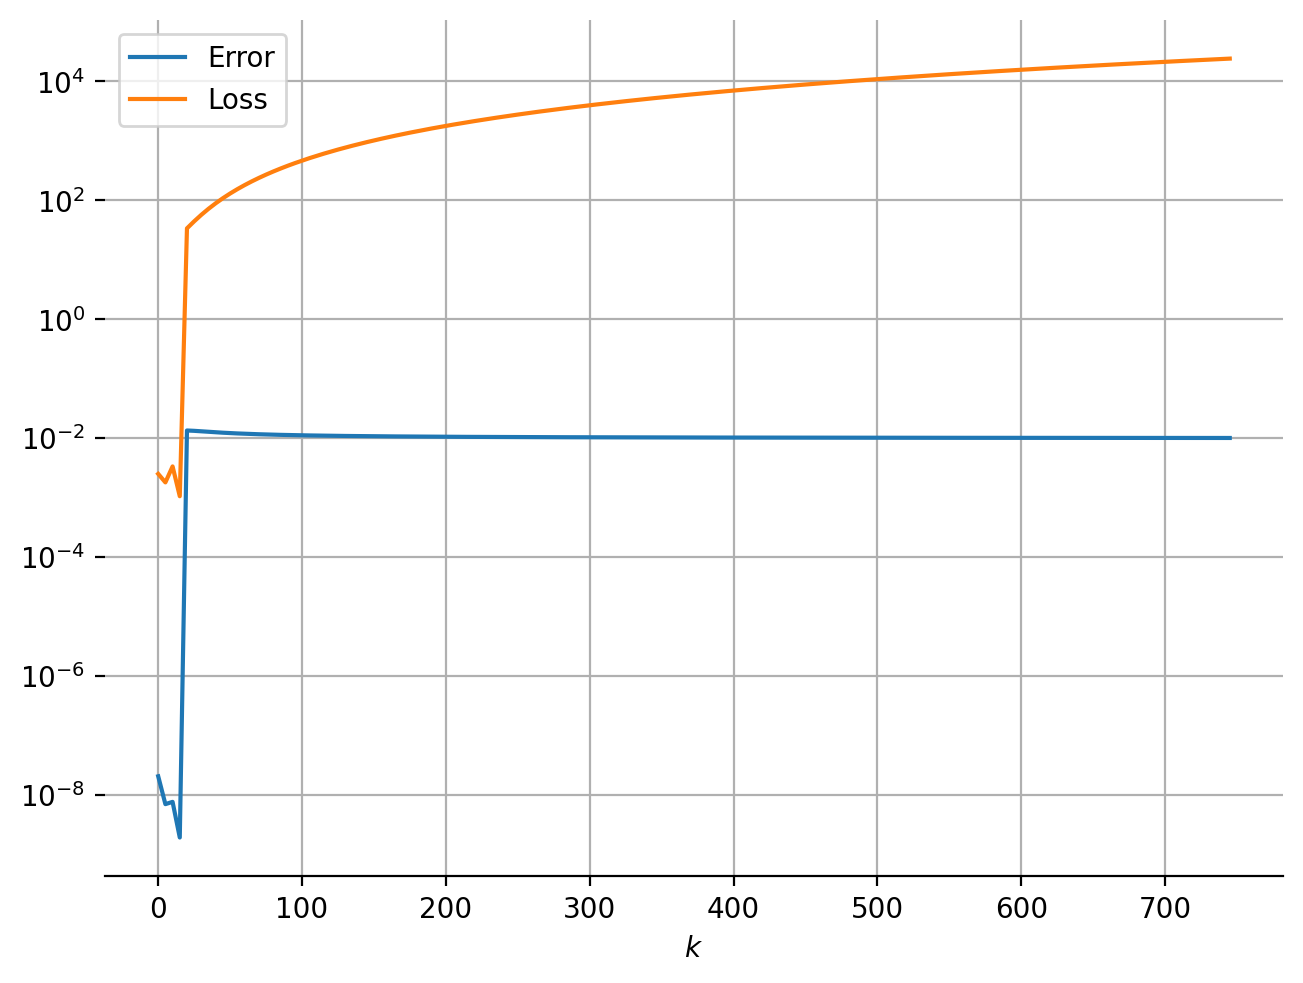

In [ ]:
fig, ax = plt.subplots()
ax.plot(K, DATA51, c="C0", label="Error")
ax.plot(K, DATA52, c="C1", label="Loss")

ax.set(
    yscale="log",
    xlabel=r"$k$",
)
ax.grid()
ax.legend()
ax.spines[["top", "right", "left"]].set_visible(False)
pass

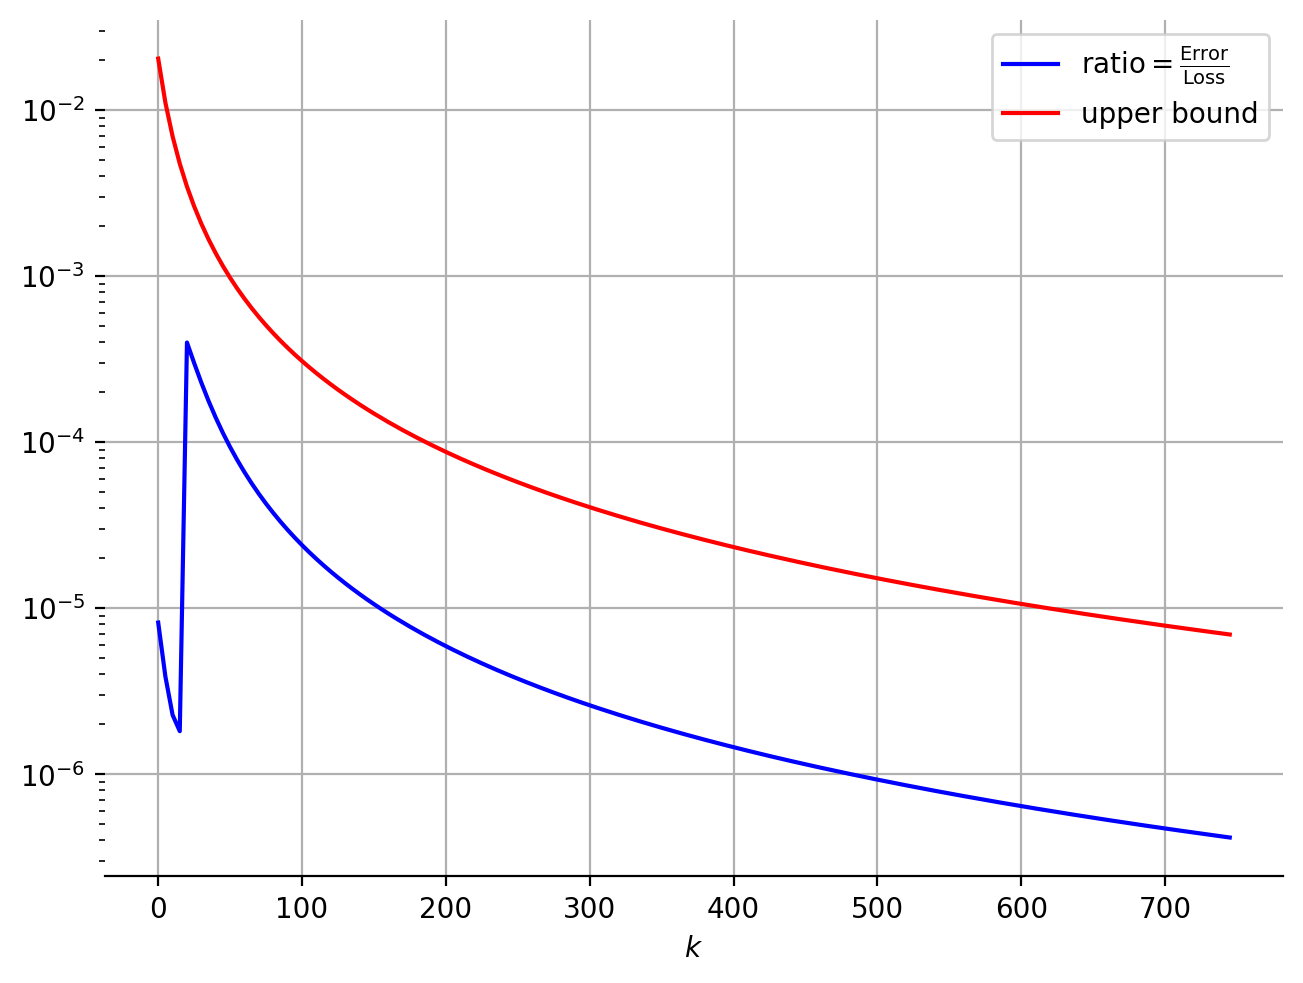

In [ ]:
fig, ax = plt.subplots()
ax.plot(K, RATIO5, c="blue", label=r"ratio$=\frac{\sf Error}{\sf Loss}$")
ax.plot(K, 4/(K+2*c)**2, c="red", label="upper bound")

ax.set(
    yscale="log",
    xlabel=r"$k$"
)
ax.grid()
ax.legend()
ax.spines[["top", "right", "left"]].set_visible(False)
pass

In [ ]:
k=10
c=15
Eps=np.arange(0.04,1,0.01)

In [ ]:
DATA61=[]
DATA62=[]
RATIO6=[]

for eps in Eps:
    torch.manual_seed(78)
    model = MLP(1, 50, 50, 1)
    batch_size = 10000
    n_epochs = 500
    print_interval = n_epochs // 10
    learning_rate = 0.1
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer=optimizer,
                                            lr_lambda=lambda epoch: 0.98 ** epoch,
                                            last_epoch=-1,
                                            verbose=False)

    for epoch in tqdm(range(n_epochs)):
        optimizer.zero_grad()

        # 무작위 t 생성 후 y 계산
        t = torch.empty(batch_size, 1).uniform_(*domain).requires_grad_()
        y = t*(1-t)*model(t)+t
        y_e = t*(1-t)*torch.exp(t)+t**2
        y_t = grad(y, t)
        y_tt = grad(y_t,t)

        # Loss
        loss_de = F.mse_loss(eps*y_tt+k*t*y_t-c*y+(k*t**3+(k-c+eps)*t**2+(3*eps-k+c)*t)*torch.exp(t)+c*t**2-2*k*t**2-2*eps, torch.zeros_like(y_t))
        loss = loss_de
        realloss=F.mse_loss(y-y_e, torch.zeros_like(y))
        # Backprop
        loss.backward()
        optimizer.step()
        scheduler.step()
        if epoch % print_interval == 0:
            print(f"{epoch = }, loss_de = {loss_de.item():.4f}")
        if epoch==n_epochs-1:
            print(realloss.item())
            DATA61.append(realloss.item())
            DATA62.append(loss.item())
            RATIO6.append(realloss.item()/loss.item())


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 29.3516
epoch = 50, loss_de = 7.2732
epoch = 100, loss_de = 7.2078
epoch = 150, loss_de = 7.1718
epoch = 200, loss_de = 7.3597
epoch = 250, loss_de = 7.2170
epoch = 300, loss_de = 7.3334
epoch = 350, loss_de = 7.0896
epoch = 400, loss_de = 7.1660
epoch = 450, loss_de = 7.1027
0.005194608587771654


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 29.7185
epoch = 50, loss_de = 7.3747
epoch = 100, loss_de = 7.3127
epoch = 150, loss_de = 7.2758
epoch = 200, loss_de = 7.4654
epoch = 250, loss_de = 7.3217
epoch = 300, loss_de = 7.4403
epoch = 350, loss_de = 7.1921
epoch = 400, loss_de = 7.2703
epoch = 450, loss_de = 7.2057
0.005232620984315872


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 30.0879
epoch = 50, loss_de = 7.4778
epoch = 100, loss_de = 7.4193
epoch = 150, loss_de = 7.3814
epoch = 200, loss_de = 7.5728
epoch = 250, loss_de = 7.4280
epoch = 300, loss_de = 7.5488
epoch = 350, loss_de = 7.2962
epoch = 400, loss_de = 7.3761
epoch = 450, loss_de = 7.3102
0.005270502995699644


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 30.4598
epoch = 50, loss_de = 7.5825
epoch = 100, loss_de = 7.5275
epoch = 150, loss_de = 7.4885
epoch = 200, loss_de = 7.6817
epoch = 250, loss_de = 7.5358
epoch = 300, loss_de = 7.6589
epoch = 350, loss_de = 7.4018
epoch = 400, loss_de = 7.4836
epoch = 450, loss_de = 7.4163
0.0053082425147295


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 30.8342
epoch = 50, loss_de = 7.6888
epoch = 100, loss_de = 7.6373
epoch = 150, loss_de = 7.5973
epoch = 200, loss_de = 7.7922
epoch = 250, loss_de = 7.6452
epoch = 300, loss_de = 7.7707
epoch = 350, loss_de = 7.5090
epoch = 400, loss_de = 7.5926
epoch = 450, loss_de = 7.5240
0.005345833487808704


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 31.2111
epoch = 50, loss_de = 7.7968
epoch = 100, loss_de = 7.7487
epoch = 150, loss_de = 7.7077
epoch = 200, loss_de = 7.9043
epoch = 250, loss_de = 7.7563
epoch = 300, loss_de = 7.8841
epoch = 350, loss_de = 7.6178
epoch = 400, loss_de = 7.7033
epoch = 450, loss_de = 7.6333
0.005383272655308247


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 31.5905
epoch = 50, loss_de = 7.9063
epoch = 100, loss_de = 7.8617
epoch = 150, loss_de = 7.8197
epoch = 200, loss_de = 8.0180
epoch = 250, loss_de = 7.8689
epoch = 300, loss_de = 7.9992
epoch = 350, loss_de = 7.7282
epoch = 400, loss_de = 7.8156
epoch = 450, loss_de = 7.7442
0.005420545116066933


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 31.9724
epoch = 50, loss_de = 8.0175
epoch = 100, loss_de = 7.9763
epoch = 150, loss_de = 7.9333
epoch = 200, loss_de = 8.1333
epoch = 250, loss_de = 7.9831
epoch = 300, loss_de = 8.1160
epoch = 350, loss_de = 7.8401
epoch = 400, loss_de = 7.9294
epoch = 450, loss_de = 7.8567
0.0054576280526816845


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 32.3568
epoch = 50, loss_de = 8.1303
epoch = 100, loss_de = 8.0926
epoch = 150, loss_de = 8.0485
epoch = 200, loss_de = 8.2502
epoch = 250, loss_de = 8.0990
epoch = 300, loss_de = 8.2344
epoch = 350, loss_de = 7.9536
epoch = 400, loss_de = 8.0449
epoch = 450, loss_de = 7.9708
0.005494533572345972


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 32.7436
epoch = 50, loss_de = 8.2447
epoch = 100, loss_de = 8.2106
epoch = 150, loss_de = 8.1654
epoch = 200, loss_de = 8.3688
epoch = 250, loss_de = 8.2165
epoch = 300, loss_de = 8.3545
epoch = 350, loss_de = 8.0688
epoch = 400, loss_de = 8.1620
epoch = 450, loss_de = 8.0865
0.005531239323318005


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 33.1330
epoch = 50, loss_de = 8.3608
epoch = 100, loss_de = 8.3302
epoch = 150, loss_de = 8.2839
epoch = 200, loss_de = 8.4889
epoch = 250, loss_de = 8.3356
epoch = 300, loss_de = 8.4763
epoch = 350, loss_de = 8.1855
epoch = 400, loss_de = 8.2808
epoch = 450, loss_de = 8.2039
0.005567764397710562


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 33.5248
epoch = 50, loss_de = 8.4785
epoch = 100, loss_de = 8.4514
epoch = 150, loss_de = 8.4040
epoch = 200, loss_de = 8.6107
epoch = 250, loss_de = 8.4563
epoch = 300, loss_de = 8.5998
epoch = 350, loss_de = 8.3038
epoch = 400, loss_de = 8.4012
epoch = 450, loss_de = 8.3229
0.00560408178716898


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 33.9192
epoch = 50, loss_de = 8.5978
epoch = 100, loss_de = 8.5743
epoch = 150, loss_de = 8.5258
epoch = 200, loss_de = 8.7342
epoch = 250, loss_de = 8.5787
epoch = 300, loss_de = 8.7250
epoch = 350, loss_de = 8.4238
epoch = 400, loss_de = 8.5232
epoch = 450, loss_de = 8.4435
0.0056402115151286125


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 34.3160
epoch = 50, loss_de = 8.7189
epoch = 100, loss_de = 8.6989
epoch = 150, loss_de = 8.6493
epoch = 200, loss_de = 8.8592
epoch = 250, loss_de = 8.7027
epoch = 300, loss_de = 8.8518
epoch = 350, loss_de = 8.5454
epoch = 400, loss_de = 8.6469
epoch = 450, loss_de = 8.5658
0.005676102824509144


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 34.7153
epoch = 50, loss_de = 8.8415
epoch = 100, loss_de = 8.8251
epoch = 150, loss_de = 8.7744
epoch = 200, loss_de = 8.9859
epoch = 250, loss_de = 8.8283
epoch = 300, loss_de = 8.9804
epoch = 350, loss_de = 8.6686
epoch = 400, loss_de = 8.7722
epoch = 450, loss_de = 8.6897
0.005711775738745928


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 35.1172
epoch = 50, loss_de = 8.9659
epoch = 100, loss_de = 8.9530
epoch = 150, loss_de = 8.9012
epoch = 200, loss_de = 9.1143
epoch = 250, loss_de = 8.9556
epoch = 300, loss_de = 9.1107
epoch = 350, loss_de = 8.7934
epoch = 400, loss_de = 8.8992
epoch = 450, loss_de = 8.8153
0.005747221875935793


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 35.5215
epoch = 50, loss_de = 9.0919
epoch = 100, loss_de = 9.0826
epoch = 150, loss_de = 9.0296
epoch = 200, loss_de = 9.2443
epoch = 250, loss_de = 9.0846
epoch = 300, loss_de = 9.2427
epoch = 350, loss_de = 8.9199
epoch = 400, loss_de = 9.0279
epoch = 450, loss_de = 8.9425
0.005782431457191706


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 35.9283
epoch = 50, loss_de = 9.2195
epoch = 100, loss_de = 9.2139
epoch = 150, loss_de = 9.1598
epoch = 200, loss_de = 9.3760
epoch = 250, loss_de = 9.2152
epoch = 300, loss_de = 9.3765
epoch = 350, loss_de = 9.0480
epoch = 400, loss_de = 9.1582
epoch = 450, loss_de = 9.0715
0.005817437544465065


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 36.3376
epoch = 50, loss_de = 9.3489
epoch = 100, loss_de = 9.3469
epoch = 150, loss_de = 9.2916
epoch = 200, loss_de = 9.5094
epoch = 250, loss_de = 9.3475
epoch = 300, loss_de = 9.5120
epoch = 350, loss_de = 9.1777
epoch = 400, loss_de = 9.2902
epoch = 450, loss_de = 9.2020
0.005852174945175648


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 36.7494
epoch = 50, loss_de = 9.4799
epoch = 100, loss_de = 9.4816
epoch = 150, loss_de = 9.4251
epoch = 200, loss_de = 9.6444
epoch = 250, loss_de = 9.4815
epoch = 300, loss_de = 9.6492
epoch = 350, loss_de = 9.3091
epoch = 400, loss_de = 9.4239
epoch = 450, loss_de = 9.3343
0.0058866883628070354


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 37.1636
epoch = 50, loss_de = 9.6126
epoch = 100, loss_de = 9.6180
epoch = 150, loss_de = 9.5603
epoch = 200, loss_de = 9.7811
epoch = 250, loss_de = 9.6171
epoch = 300, loss_de = 9.7881
epoch = 350, loss_de = 9.4422
epoch = 400, loss_de = 9.5592
epoch = 450, loss_de = 9.4682
0.005920956376940012


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 37.5804
epoch = 50, loss_de = 9.7470
epoch = 100, loss_de = 9.7561
epoch = 150, loss_de = 9.6972
epoch = 200, loss_de = 9.9195
epoch = 250, loss_de = 9.7544
epoch = 300, loss_de = 9.9288
epoch = 350, loss_de = 9.5769
epoch = 400, loss_de = 9.6963
epoch = 450, loss_de = 9.6038
0.005954981315881014


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 37.9997
epoch = 50, loss_de = 9.8831
epoch = 100, loss_de = 9.8958
epoch = 150, loss_de = 9.8357
epoch = 200, loss_de = 10.0595
epoch = 250, loss_de = 9.8934
epoch = 300, loss_de = 10.0712
epoch = 350, loss_de = 9.7133
epoch = 400, loss_de = 9.8350
epoch = 450, loss_de = 9.7411
0.005988749675452709


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 38.4214
epoch = 50, loss_de = 10.0209
epoch = 100, loss_de = 10.0374
epoch = 150, loss_de = 9.9760
epoch = 200, loss_de = 10.2013
epoch = 250, loss_de = 10.0341
epoch = 300, loss_de = 10.2154
epoch = 350, loss_de = 9.8513
epoch = 400, loss_de = 9.9755
epoch = 450, loss_de = 9.8801
0.006022274494171143


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 38.8457
epoch = 50, loss_de = 10.1604
epoch = 100, loss_de = 10.1806
epoch = 150, loss_de = 10.1181
epoch = 200, loss_de = 10.3448
epoch = 250, loss_de = 10.1765
epoch = 300, loss_de = 10.3613
epoch = 350, loss_de = 9.9910
epoch = 400, loss_de = 10.1176
epoch = 450, loss_de = 10.0208
0.006055539473891258


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 39.2724
epoch = 50, loss_de = 10.3016
epoch = 100, loss_de = 10.3256
epoch = 150, loss_de = 10.2618
epoch = 200, loss_de = 10.4899
epoch = 250, loss_de = 10.3206
epoch = 300, loss_de = 10.5090
epoch = 350, loss_de = 10.1324
epoch = 400, loss_de = 10.2614
epoch = 450, loss_de = 10.1631
0.006088532041758299


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 39.7017
epoch = 50, loss_de = 10.4445
epoch = 100, loss_de = 10.4723
epoch = 150, loss_de = 10.4072
epoch = 200, loss_de = 10.6368
epoch = 250, loss_de = 10.4664
epoch = 300, loss_de = 10.6585
epoch = 350, loss_de = 10.2755
epoch = 400, loss_de = 10.4070
epoch = 450, loss_de = 10.3072
0.006121305748820305


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 40.1334
epoch = 50, loss_de = 10.5892
epoch = 100, loss_de = 10.6207
epoch = 150, loss_de = 10.5544
epoch = 200, loss_de = 10.7853
epoch = 250, loss_de = 10.6139
epoch = 300, loss_de = 10.8097
epoch = 350, loss_de = 10.4203
epoch = 400, loss_de = 10.5543
epoch = 450, loss_de = 10.4530
0.006153787020593882


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 40.5676
epoch = 50, loss_de = 10.7355
epoch = 100, loss_de = 10.7709
epoch = 150, loss_de = 10.7033
epoch = 200, loss_de = 10.9356
epoch = 250, loss_de = 10.7631
epoch = 300, loss_de = 10.9627
epoch = 350, loss_de = 10.5667
epoch = 400, loss_de = 10.7032
epoch = 450, loss_de = 10.6006
0.006186001468449831


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 41.0043
epoch = 50, loss_de = 10.8836
epoch = 100, loss_de = 10.9228
epoch = 150, loss_de = 10.8539
epoch = 200, loss_de = 11.0876
epoch = 250, loss_de = 10.9140
epoch = 300, loss_de = 11.1175
epoch = 350, loss_de = 10.7149
epoch = 400, loss_de = 10.8540
epoch = 450, loss_de = 10.7498
0.00621793232858181


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 41.4435
epoch = 50, loss_de = 11.0334
epoch = 100, loss_de = 11.0764
epoch = 150, loss_de = 11.0063
epoch = 200, loss_de = 11.2413
epoch = 250, loss_de = 11.0666
epoch = 300, loss_de = 11.2741
epoch = 350, loss_de = 10.8647
epoch = 400, loss_de = 11.0064
epoch = 450, loss_de = 10.9008
0.00624960009008646


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 41.8852
epoch = 50, loss_de = 11.1849
epoch = 100, loss_de = 11.2318
epoch = 150, loss_de = 11.1604
epoch = 200, loss_de = 11.3967
epoch = 250, loss_de = 11.2210
epoch = 300, loss_de = 11.4325
epoch = 350, loss_de = 11.0163
epoch = 400, loss_de = 11.1605
epoch = 450, loss_de = 11.0534
0.006281010340899229


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 42.3294
epoch = 50, loss_de = 11.3381
epoch = 100, loss_de = 11.3890
epoch = 150, loss_de = 11.3162
epoch = 200, loss_de = 11.5539
epoch = 250, loss_de = 11.3771
epoch = 300, loss_de = 11.5926
epoch = 350, loss_de = 11.1695
epoch = 400, loss_de = 11.3164
epoch = 450, loss_de = 11.2078
0.006312146782875061


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 42.7761
epoch = 50, loss_de = 11.4931
epoch = 100, loss_de = 11.5479
epoch = 150, loss_de = 11.4738
epoch = 200, loss_de = 11.7128
epoch = 250, loss_de = 11.5349
epoch = 300, loss_de = 11.7545
epoch = 350, loss_de = 11.3244
epoch = 400, loss_de = 11.4741
epoch = 450, loss_de = 11.3640
0.006342991255223751


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 43.2253
epoch = 50, loss_de = 11.6498
epoch = 100, loss_de = 11.7086
epoch = 150, loss_de = 11.6331
epoch = 200, loss_de = 11.8734
epoch = 250, loss_de = 11.6944
epoch = 300, loss_de = 11.9183
epoch = 350, loss_de = 11.4811
epoch = 400, loss_de = 11.6334
epoch = 450, loss_de = 11.5219
0.006373558193445206


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 43.6769
epoch = 50, loss_de = 11.7745
epoch = 100, loss_de = 11.8710
epoch = 150, loss_de = 11.7944
epoch = 200, loss_de = 12.0359
epoch = 250, loss_de = 11.8558
epoch = 300, loss_de = 12.0839
epoch = 350, loss_de = 11.6396
epoch = 400, loss_de = 11.7947
epoch = 450, loss_de = 11.6816
0.006403944455087185


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 44.1311
epoch = 50, loss_de = 11.9356
epoch = 100, loss_de = 12.0352
epoch = 150, loss_de = 11.9572
epoch = 200, loss_de = 12.2001
epoch = 250, loss_de = 12.0188
epoch = 300, loss_de = 12.2513
epoch = 350, loss_de = 11.7997
epoch = 400, loss_de = 11.9576
epoch = 450, loss_de = 11.8430
0.006433972157537937


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 44.5878
epoch = 50, loss_de = 12.0984
epoch = 100, loss_de = 12.2013
epoch = 150, loss_de = 12.1219
epoch = 200, loss_de = 12.3659
epoch = 250, loss_de = 12.1836
epoch = 300, loss_de = 12.4205
epoch = 350, loss_de = 11.9615
epoch = 400, loss_de = 12.1222
epoch = 450, loss_de = 12.0062
0.006463699508458376


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 45.0469
epoch = 50, loss_de = 12.2629
epoch = 100, loss_de = 12.3691
epoch = 150, loss_de = 12.2882
epoch = 200, loss_de = 12.5336
epoch = 250, loss_de = 12.3501
epoch = 300, loss_de = 12.5914
epoch = 350, loss_de = 12.1251
epoch = 400, loss_de = 12.2886
epoch = 450, loss_de = 12.1710
0.006493165623396635


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 45.5085
epoch = 50, loss_de = 12.4290
epoch = 100, loss_de = 12.5386
epoch = 150, loss_de = 12.4564
epoch = 200, loss_de = 12.7029
epoch = 250, loss_de = 12.5184
epoch = 300, loss_de = 12.7642
epoch = 350, loss_de = 12.2904
epoch = 400, loss_de = 12.4567
epoch = 450, loss_de = 12.3377
0.0065223462879657745


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 45.9727
epoch = 50, loss_de = 12.5968
epoch = 100, loss_de = 12.7100
epoch = 150, loss_de = 12.6264
epoch = 200, loss_de = 12.8741
epoch = 250, loss_de = 12.6884
epoch = 300, loss_de = 12.9388
epoch = 350, loss_de = 12.4574
epoch = 400, loss_de = 12.6266
epoch = 450, loss_de = 12.5061
0.006551263388246298


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 46.4393
epoch = 50, loss_de = 12.7667
epoch = 100, loss_de = 12.8831
epoch = 150, loss_de = 12.7981
epoch = 200, loss_de = 13.0470
epoch = 250, loss_de = 12.8602
epoch = 300, loss_de = 13.1153
epoch = 350, loss_de = 12.6262
epoch = 400, loss_de = 12.7983
epoch = 450, loss_de = 12.6762
0.006579887587577105


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 46.9084
epoch = 50, loss_de = 12.9382
epoch = 100, loss_de = 13.0581
epoch = 150, loss_de = 12.9716
epoch = 200, loss_de = 13.2217
epoch = 250, loss_de = 13.0337
epoch = 300, loss_de = 13.2935
epoch = 350, loss_de = 12.7966
epoch = 400, loss_de = 12.9717
epoch = 450, loss_de = 12.8482
0.006608238909393549


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 47.3800
epoch = 50, loss_de = 13.1114
epoch = 100, loss_de = 13.2348
epoch = 150, loss_de = 13.1468
epoch = 200, loss_de = 13.3981
epoch = 250, loss_de = 13.2090
epoch = 300, loss_de = 13.4736
epoch = 350, loss_de = 12.9689
epoch = 400, loss_de = 13.1469
epoch = 450, loss_de = 13.0219
0.006636299192905426


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 47.8541
epoch = 50, loss_de = 13.2864
epoch = 100, loss_de = 13.4133
epoch = 150, loss_de = 13.3239
epoch = 200, loss_de = 13.5763
epoch = 250, loss_de = 13.3861
epoch = 300, loss_de = 13.6556
epoch = 350, loss_de = 13.1429
epoch = 400, loss_de = 13.3239
epoch = 450, loss_de = 13.1974
0.006664105225354433


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 48.3307
epoch = 50, loss_de = 13.4632
epoch = 100, loss_de = 13.5936
epoch = 150, loss_de = 13.5028
epoch = 200, loss_de = 13.7563
epoch = 250, loss_de = 13.5649
epoch = 300, loss_de = 13.8393
epoch = 350, loss_de = 13.3186
epoch = 400, loss_de = 13.5027
epoch = 450, loss_de = 13.3746
0.0066916062496602535


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 48.8098
epoch = 50, loss_de = 13.6417
epoch = 100, loss_de = 13.7758
epoch = 150, loss_de = 13.6834
epoch = 200, loss_de = 13.9381
epoch = 250, loss_de = 13.7456
epoch = 300, loss_de = 14.0249
epoch = 350, loss_de = 13.4961
epoch = 400, loss_de = 13.6833
epoch = 450, loss_de = 13.5536
0.0067188614048063755


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 49.2914
epoch = 50, loss_de = 13.8220
epoch = 100, loss_de = 13.9597
epoch = 150, loss_de = 13.8658
epoch = 200, loss_de = 14.1216
epoch = 250, loss_de = 13.9279
epoch = 300, loss_de = 14.2124
epoch = 350, loss_de = 13.6753
epoch = 400, loss_de = 13.8656
epoch = 450, loss_de = 13.7344
0.006745787803083658


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 49.7754
epoch = 50, loss_de = 14.0041
epoch = 100, loss_de = 14.1455
epoch = 150, loss_de = 14.0501
epoch = 200, loss_de = 14.3069
epoch = 250, loss_de = 14.1121
epoch = 300, loss_de = 14.4017
epoch = 350, loss_de = 13.8563
epoch = 400, loss_de = 14.0497
epoch = 450, loss_de = 13.9170
0.006772441789507866


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 50.2620
epoch = 50, loss_de = 14.1879
epoch = 100, loss_de = 14.3330
epoch = 150, loss_de = 14.2361
epoch = 200, loss_de = 14.4940
epoch = 250, loss_de = 14.2980
epoch = 300, loss_de = 14.5928
epoch = 350, loss_de = 14.0390
epoch = 400, loss_de = 14.2356
epoch = 450, loss_de = 14.1014
0.00679882662370801


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 50.7510
epoch = 50, loss_de = 14.3735
epoch = 100, loss_de = 14.5224
epoch = 150, loss_de = 14.4240
epoch = 200, loss_de = 14.6829
epoch = 250, loss_de = 14.4858
epoch = 300, loss_de = 14.7858
epoch = 350, loss_de = 14.2235
epoch = 400, loss_de = 14.4233
epoch = 450, loss_de = 14.2876
0.006824916228652


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 51.2426
epoch = 50, loss_de = 14.5609
epoch = 100, loss_de = 14.7136
epoch = 150, loss_de = 14.6136
epoch = 200, loss_de = 14.8736
epoch = 250, loss_de = 14.6753
epoch = 300, loss_de = 14.9806
epoch = 350, loss_de = 14.4098
epoch = 400, loss_de = 14.6128
epoch = 450, loss_de = 14.4756
0.006850749254226685


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 51.7366
epoch = 50, loss_de = 14.7500
epoch = 100, loss_de = 14.9066
epoch = 150, loss_de = 14.8051
epoch = 200, loss_de = 15.0661
epoch = 250, loss_de = 14.8666
epoch = 300, loss_de = 15.1773
epoch = 350, loss_de = 14.5978
epoch = 400, loss_de = 14.8041
epoch = 450, loss_de = 14.6653
0.006876313127577305


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 52.2331
epoch = 50, loss_de = 14.9409
epoch = 100, loss_de = 15.1014
epoch = 150, loss_de = 14.9983
epoch = 200, loss_de = 15.2604
epoch = 250, loss_de = 15.0597
epoch = 300, loss_de = 15.3759
epoch = 350, loss_de = 14.7876
epoch = 400, loss_de = 14.9972
epoch = 450, loss_de = 14.8569
0.006901599001139402


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 52.7322
epoch = 50, loss_de = 15.1337
epoch = 100, loss_de = 15.2980
epoch = 150, loss_de = 15.1934
epoch = 200, loss_de = 15.4565
epoch = 250, loss_de = 15.2545
epoch = 300, loss_de = 15.5763
epoch = 350, loss_de = 14.9792
epoch = 400, loss_de = 15.1920
epoch = 450, loss_de = 15.0502
0.006926608271896839


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 53.2337
epoch = 50, loss_de = 15.3282
epoch = 100, loss_de = 15.4965
epoch = 150, loss_de = 15.3903
epoch = 200, loss_de = 15.6544
epoch = 250, loss_de = 15.4512
epoch = 300, loss_de = 15.7786
epoch = 350, loss_de = 15.1725
epoch = 400, loss_de = 15.3887
epoch = 450, loss_de = 15.2454
0.006951337214559317


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 53.7377
epoch = 50, loss_de = 15.5244
epoch = 100, loss_de = 15.6968
epoch = 150, loss_de = 15.5890
epoch = 200, loss_de = 15.8541
epoch = 250, loss_de = 15.6497
epoch = 300, loss_de = 15.9827
epoch = 350, loss_de = 15.3677
epoch = 400, loss_de = 15.5872
epoch = 450, loss_de = 15.4423
0.006975793279707432


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 54.2442
epoch = 50, loss_de = 15.7225
epoch = 100, loss_de = 15.8990
epoch = 150, loss_de = 15.7895
epoch = 200, loss_de = 16.0556
epoch = 250, loss_de = 15.8499
epoch = 300, loss_de = 16.1887
epoch = 350, loss_de = 15.5646
epoch = 400, loss_de = 15.7875
epoch = 450, loss_de = 15.6411
0.006999970879405737


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 54.7532
epoch = 50, loss_de = 15.9224
epoch = 100, loss_de = 16.1029
epoch = 150, loss_de = 15.9919
epoch = 200, loss_de = 16.2589
epoch = 250, loss_de = 16.0520
epoch = 300, loss_de = 16.3966
epoch = 350, loss_de = 15.7632
epoch = 400, loss_de = 15.9896
epoch = 450, loss_de = 15.8416
0.007023879326879978


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 55.2647
epoch = 50, loss_de = 16.1240
epoch = 100, loss_de = 16.3087
epoch = 150, loss_de = 16.1960
epoch = 200, loss_de = 16.4640
epoch = 250, loss_de = 16.2558
epoch = 300, loss_de = 16.6063
epoch = 350, loss_de = 15.9637
epoch = 400, loss_de = 16.1935
epoch = 450, loss_de = 16.0440
0.00704749533906579


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 55.7786
epoch = 50, loss_de = 16.3275
epoch = 100, loss_de = 16.5164
epoch = 150, loss_de = 16.4020
epoch = 200, loss_de = 16.6709
epoch = 250, loss_de = 16.4615
epoch = 300, loss_de = 16.8179
epoch = 350, loss_de = 16.1659
epoch = 400, loss_de = 16.3992
epoch = 450, loss_de = 16.2482
0.007070858031511307


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 56.2951
epoch = 50, loss_de = 16.5322
epoch = 100, loss_de = 16.7254
epoch = 150, loss_de = 16.6079
epoch = 200, loss_de = 16.8575
epoch = 250, loss_de = 13.6059
epoch = 300, loss_de = 12.2970
epoch = 350, loss_de = 11.2788
epoch = 400, loss_de = 11.2890
epoch = 450, loss_de = 11.1331
0.004530960228294134


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 56.8141
epoch = 50, loss_de = 16.7392
epoch = 100, loss_de = 16.9365
epoch = 150, loss_de = 16.8146
epoch = 200, loss_de = 13.2874
epoch = 250, loss_de = 9.5084
epoch = 300, loss_de = 8.8185
epoch = 350, loss_de = 8.0676
epoch = 400, loss_de = 8.1662
epoch = 450, loss_de = 8.0427
0.0030704124365001917


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 57.3355
epoch = 50, loss_de = 16.9481
epoch = 100, loss_de = 17.1494
epoch = 150, loss_de = 16.9900
epoch = 200, loss_de = 9.3886
epoch = 250, loss_de = 7.1812
epoch = 300, loss_de = 6.9425
epoch = 350, loss_de = 6.3909
epoch = 400, loss_de = 6.5233
epoch = 450, loss_de = 6.4246
0.0022896165028214455


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 57.8595
epoch = 50, loss_de = 17.1586
epoch = 100, loss_de = 17.3632
epoch = 150, loss_de = 10.1831
epoch = 200, loss_de = 6.0124
epoch = 250, loss_de = 5.1604
epoch = 300, loss_de = 5.1063
epoch = 350, loss_de = 4.7256
epoch = 400, loss_de = 4.8328
epoch = 450, loss_de = 4.7690
0.001498774508945644


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 58.3859
epoch = 50, loss_de = 17.3710
epoch = 100, loss_de = 17.5780
epoch = 150, loss_de = 7.6873
epoch = 200, loss_de = 5.1936
epoch = 250, loss_de = 4.5086
epoch = 300, loss_de = 4.4856
epoch = 350, loss_de = 4.1550
epoch = 400, loss_de = 4.2513
epoch = 450, loss_de = 4.2009
0.0012278220383450389


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 58.9148
epoch = 50, loss_de = 17.5854
epoch = 100, loss_de = 17.7993
epoch = 150, loss_de = 12.7943
epoch = 200, loss_de = 6.8850
epoch = 250, loss_de = 5.8367
epoch = 300, loss_de = 5.7586
epoch = 350, loss_de = 5.3270
epoch = 400, loss_de = 5.4451
epoch = 450, loss_de = 5.3706
0.0017021069070324302


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 59.4463
epoch = 50, loss_de = 17.8012
epoch = 100, loss_de = 18.0194
epoch = 150, loss_de = 10.9815
epoch = 200, loss_de = 6.3722
epoch = 250, loss_de = 5.4697
epoch = 300, loss_de = 5.4115
epoch = 350, loss_de = 5.0098
epoch = 400, loss_de = 5.1217
epoch = 450, loss_de = 5.0548
0.0015327234286814928


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 59.9802
epoch = 50, loss_de = 18.0082
epoch = 100, loss_de = 3.8410
epoch = 150, loss_de = 2.2334
epoch = 200, loss_de = 1.8880
epoch = 250, loss_de = 1.7470
epoch = 300, loss_de = 1.7954
epoch = 350, loss_de = 1.6792
epoch = 400, loss_de = 1.7119
epoch = 450, loss_de = 1.7157
0.0002763178781606257


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 60.5166
epoch = 50, loss_de = 12.4515
epoch = 100, loss_de = 2.7738
epoch = 150, loss_de = 1.8316
epoch = 200, loss_de = 1.5864
epoch = 250, loss_de = 1.4792
epoch = 300, loss_de = 1.5268
epoch = 350, loss_de = 1.4306
epoch = 400, loss_de = 1.4564
epoch = 450, loss_de = 1.4638
0.00020288495579734445


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 61.0555
epoch = 50, loss_de = 16.3442
epoch = 100, loss_de = 2.9896
epoch = 150, loss_de = 1.9274
epoch = 200, loss_de = 1.6577
epoch = 250, loss_de = 1.5424
epoch = 300, loss_de = 1.5909
epoch = 350, loss_de = 1.4896
epoch = 400, loss_de = 1.5165
epoch = 450, loss_de = 1.5237
0.00021261320216581225


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 61.5969
epoch = 50, loss_de = 14.7094
epoch = 100, loss_de = 2.8683
epoch = 150, loss_de = 1.8663
epoch = 200, loss_de = 1.6109
epoch = 250, loss_de = 1.5010
epoch = 300, loss_de = 1.5500
epoch = 350, loss_de = 1.4511
epoch = 400, loss_de = 1.4769
epoch = 450, loss_de = 1.4849
0.0001984022237593308


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 62.1408
epoch = 50, loss_de = 15.3562
epoch = 100, loss_de = 2.9440
epoch = 150, loss_de = 1.9174
epoch = 200, loss_de = 1.6503
epoch = 250, loss_de = 1.5363
epoch = 300, loss_de = 1.5856
epoch = 350, loss_de = 1.4843
epoch = 400, loss_de = 1.5104
epoch = 450, loss_de = 1.5185
0.00020008311548735946


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 62.6871
epoch = 50, loss_de = 15.5705
epoch = 100, loss_de = 3.0638
epoch = 150, loss_de = 2.0036
epoch = 200, loss_de = 1.7269
epoch = 250, loss_de = 1.6078
epoch = 300, loss_de = 1.6567
epoch = 350, loss_de = 1.5523
epoch = 400, loss_de = 1.5789
epoch = 450, loss_de = 1.5869
0.0002056735975202173


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 63.2360
epoch = 50, loss_de = 13.1257
epoch = 100, loss_de = 2.8627
epoch = 150, loss_de = 1.8651
epoch = 200, loss_de = 0.6060
epoch = 250, loss_de = 0.5188
epoch = 300, loss_de = 0.5389
epoch = 350, loss_de = 0.4893
epoch = 400, loss_de = 0.4963
epoch = 450, loss_de = 0.5060
3.471401214483194e-05


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 63.7874
epoch = 50, loss_de = 11.5078
epoch = 100, loss_de = 2.6668
epoch = 150, loss_de = 1.8055
epoch = 200, loss_de = 1.5664
epoch = 250, loss_de = 1.4619
epoch = 300, loss_de = 1.5116
epoch = 350, loss_de = 1.4158
epoch = 400, loss_de = 1.4394
epoch = 450, loss_de = 1.4493
0.000168408194440417


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 64.3412
epoch = 50, loss_de = 10.4548
epoch = 100, loss_de = 2.4239
epoch = 150, loss_de = 1.6654
epoch = 200, loss_de = 1.4521
epoch = 250, loss_de = 1.3575
epoch = 300, loss_de = 1.4068
epoch = 350, loss_de = 1.3164
epoch = 400, loss_de = 1.3383
epoch = 450, loss_de = 1.3488
0.0001481748913647607


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 64.8976
epoch = 50, loss_de = 0.9723
epoch = 100, loss_de = 0.0131
epoch = 150, loss_de = 0.0041
epoch = 200, loss_de = 0.0032
epoch = 250, loss_de = 0.0027
epoch = 300, loss_de = 0.0028
epoch = 350, loss_de = 0.0026
epoch = 400, loss_de = 0.0027
epoch = 450, loss_de = 0.0026
9.611182960611586e-09


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 65.4564
epoch = 50, loss_de = 1.0727
epoch = 100, loss_de = 0.0096
epoch = 150, loss_de = 0.0046
epoch = 200, loss_de = 0.0041
epoch = 250, loss_de = 0.0034
epoch = 300, loss_de = 0.0038
epoch = 350, loss_de = 0.0033
epoch = 400, loss_de = 0.0035
epoch = 450, loss_de = 0.0036
1.9113413074478558e-08


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 66.0177
epoch = 50, loss_de = 0.2995
epoch = 100, loss_de = 0.0348
epoch = 150, loss_de = 0.0119
epoch = 200, loss_de = 0.0083
epoch = 250, loss_de = 0.0066
epoch = 300, loss_de = 0.0066
epoch = 350, loss_de = 0.0062
epoch = 400, loss_de = 0.0063
epoch = 450, loss_de = 0.0063
2.1079546996816134e-08


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 66.5816
epoch = 50, loss_de = 0.7294
epoch = 100, loss_de = 0.0154
epoch = 150, loss_de = 0.0066
epoch = 200, loss_de = 0.0055
epoch = 250, loss_de = 0.0050
epoch = 300, loss_de = 0.0049
epoch = 350, loss_de = 0.0048
epoch = 400, loss_de = 0.0048
epoch = 450, loss_de = 0.0049
3.928110103856852e-08


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 67.1479
epoch = 50, loss_de = 0.7271
epoch = 100, loss_de = 0.0196
epoch = 150, loss_de = 0.0091
epoch = 200, loss_de = 0.0077
epoch = 250, loss_de = 0.0074
epoch = 300, loss_de = 0.0073
epoch = 350, loss_de = 0.0073
epoch = 400, loss_de = 0.0070
epoch = 450, loss_de = 0.0073
6.227245563650285e-08


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 67.7167
epoch = 50, loss_de = 0.8609
epoch = 100, loss_de = 0.0299
epoch = 150, loss_de = 0.0077
epoch = 200, loss_de = 0.0053
epoch = 250, loss_de = 0.0046
epoch = 300, loss_de = 0.0043
epoch = 350, loss_de = 0.0043
epoch = 400, loss_de = 0.0042
epoch = 450, loss_de = 0.0044
2.0461049743403237e-08


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 68.2880
epoch = 50, loss_de = 1.9397
epoch = 100, loss_de = 0.0136
epoch = 150, loss_de = 0.0045
epoch = 200, loss_de = 0.0035
epoch = 250, loss_de = 0.0032
epoch = 300, loss_de = 0.0031
epoch = 350, loss_de = 0.0031
epoch = 400, loss_de = 0.0029
epoch = 450, loss_de = 0.0031
1.2423683415363485e-08


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 68.8618
epoch = 50, loss_de = 0.5106
epoch = 100, loss_de = 0.0436
epoch = 150, loss_de = 0.0293
epoch = 200, loss_de = 0.0259
epoch = 250, loss_de = 0.0234
epoch = 300, loss_de = 0.0247
epoch = 350, loss_de = 0.0229
epoch = 400, loss_de = 0.0235
epoch = 450, loss_de = 0.0235
1.6181283513105882e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 69.4381
epoch = 50, loss_de = 0.5151
epoch = 100, loss_de = 0.0135
epoch = 150, loss_de = 0.0081
epoch = 200, loss_de = 0.0069
epoch = 250, loss_de = 0.0061
epoch = 300, loss_de = 0.0063
epoch = 350, loss_de = 0.0059
epoch = 400, loss_de = 0.0061
epoch = 450, loss_de = 0.0061
1.4583002361234776e-08


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 70.0169
epoch = 50, loss_de = 0.7812
epoch = 100, loss_de = 0.0255
epoch = 150, loss_de = 0.0111
epoch = 200, loss_de = 0.0088
epoch = 250, loss_de = 0.0077
epoch = 300, loss_de = 0.0076
epoch = 350, loss_de = 0.0075
epoch = 400, loss_de = 0.0074
epoch = 450, loss_de = 0.0074
1.7028940035856976e-08


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 70.5981
epoch = 50, loss_de = 0.8847
epoch = 100, loss_de = 0.0175
epoch = 150, loss_de = 0.0121
epoch = 200, loss_de = 0.0111
epoch = 250, loss_de = 0.0105
epoch = 300, loss_de = 0.0106
epoch = 350, loss_de = 0.0104
epoch = 400, loss_de = 0.0103
epoch = 450, loss_de = 0.0105
6.63665105093969e-08


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 71.1819
epoch = 50, loss_de = 1.0944
epoch = 100, loss_de = 0.0181
epoch = 150, loss_de = 0.0124
epoch = 200, loss_de = 0.0110
epoch = 250, loss_de = 0.0106
epoch = 300, loss_de = 0.0107
epoch = 350, loss_de = 0.0106
epoch = 400, loss_de = 0.0103
epoch = 450, loss_de = 0.0106
6.983058398191133e-08


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 71.7681
epoch = 50, loss_de = 0.8812
epoch = 100, loss_de = 0.0122
epoch = 150, loss_de = 0.0077
epoch = 200, loss_de = 0.0070
epoch = 250, loss_de = 0.0067
epoch = 300, loss_de = 0.0067
epoch = 350, loss_de = 0.0066
epoch = 400, loss_de = 0.0066
epoch = 450, loss_de = 0.0067
2.5466572850518787e-08


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 72.3569
epoch = 50, loss_de = 0.4176
epoch = 100, loss_de = 0.0064
epoch = 150, loss_de = 0.0035
epoch = 200, loss_de = 0.0031
epoch = 250, loss_de = 0.0028
epoch = 300, loss_de = 0.0028
epoch = 350, loss_de = 0.0028
epoch = 400, loss_de = 0.0027
epoch = 450, loss_de = 0.0028
9.231132303000322e-09


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 72.9481
epoch = 50, loss_de = 0.7434
epoch = 100, loss_de = 0.0043
epoch = 150, loss_de = 0.0021
epoch = 200, loss_de = 0.0020
epoch = 250, loss_de = 0.0018
epoch = 300, loss_de = 0.0018
epoch = 350, loss_de = 0.0017
epoch = 400, loss_de = 0.0017
epoch = 450, loss_de = 0.0018
2.6476945080844416e-09


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 73.5419
epoch = 50, loss_de = 0.2146
epoch = 100, loss_de = 0.0036
epoch = 150, loss_de = 0.0010
epoch = 200, loss_de = 0.0008
epoch = 250, loss_de = 0.0007
epoch = 300, loss_de = 0.0008
epoch = 350, loss_de = 0.0007
epoch = 400, loss_de = 0.0007
epoch = 450, loss_de = 0.0007
6.71565647536454e-09


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 74.1381
epoch = 50, loss_de = 0.1257
epoch = 100, loss_de = 0.0027
epoch = 150, loss_de = 0.0009
epoch = 200, loss_de = 0.0008
epoch = 250, loss_de = 0.0007
epoch = 300, loss_de = 0.0007
epoch = 350, loss_de = 0.0007
epoch = 400, loss_de = 0.0007
epoch = 450, loss_de = 0.0007
5.503011824004034e-09


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 74.7368
epoch = 50, loss_de = 0.2003
epoch = 100, loss_de = 0.0048
epoch = 150, loss_de = 0.0022
epoch = 200, loss_de = 0.0020
epoch = 250, loss_de = 0.0017
epoch = 300, loss_de = 0.0018
epoch = 350, loss_de = 0.0017
epoch = 400, loss_de = 0.0018
epoch = 450, loss_de = 0.0018
2.9930362632768492e-09


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 75.3380
epoch = 50, loss_de = 0.1637
epoch = 100, loss_de = 0.0012
epoch = 150, loss_de = 0.0006
epoch = 200, loss_de = 0.0006
epoch = 250, loss_de = 0.0005
epoch = 300, loss_de = 0.0005
epoch = 350, loss_de = 0.0005
epoch = 400, loss_de = 0.0005
epoch = 450, loss_de = 0.0005
2.671930232622799e-09


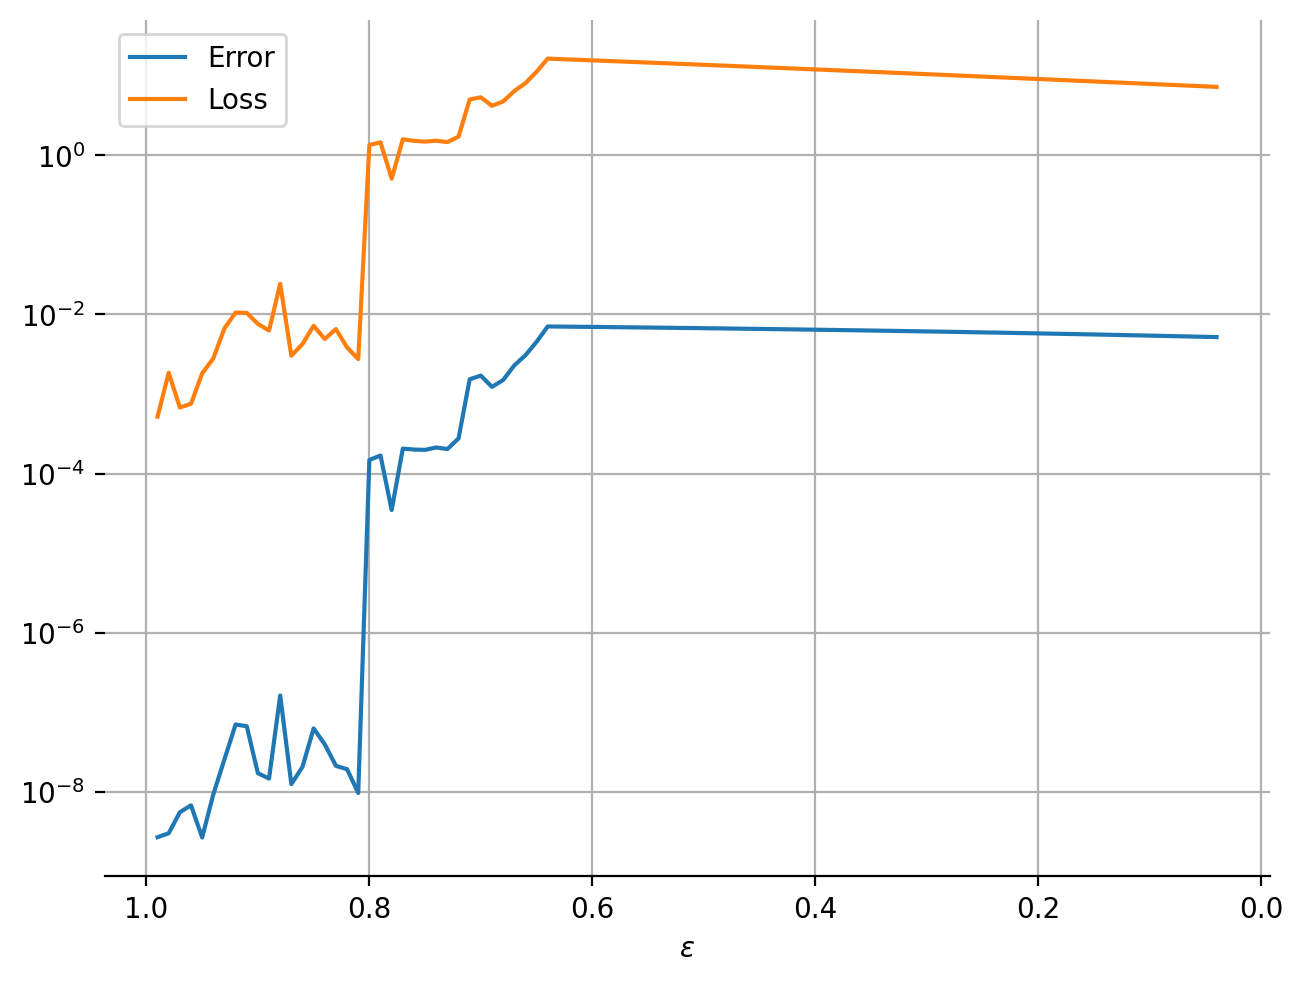

In [ ]:
fig, ax = plt.subplots()
ax.plot(Eps, DATA61, c="C0", label="Error")
ax.plot(Eps, DATA62, c="C1", label="Loss")

ax.set(
    yscale="log",
    xlabel=r"$\epsilon$"
)
ax.grid()
ax.invert_xaxis()
ax.legend()
ax.spines[["top", "right", "left"]].set_visible(False)
pass

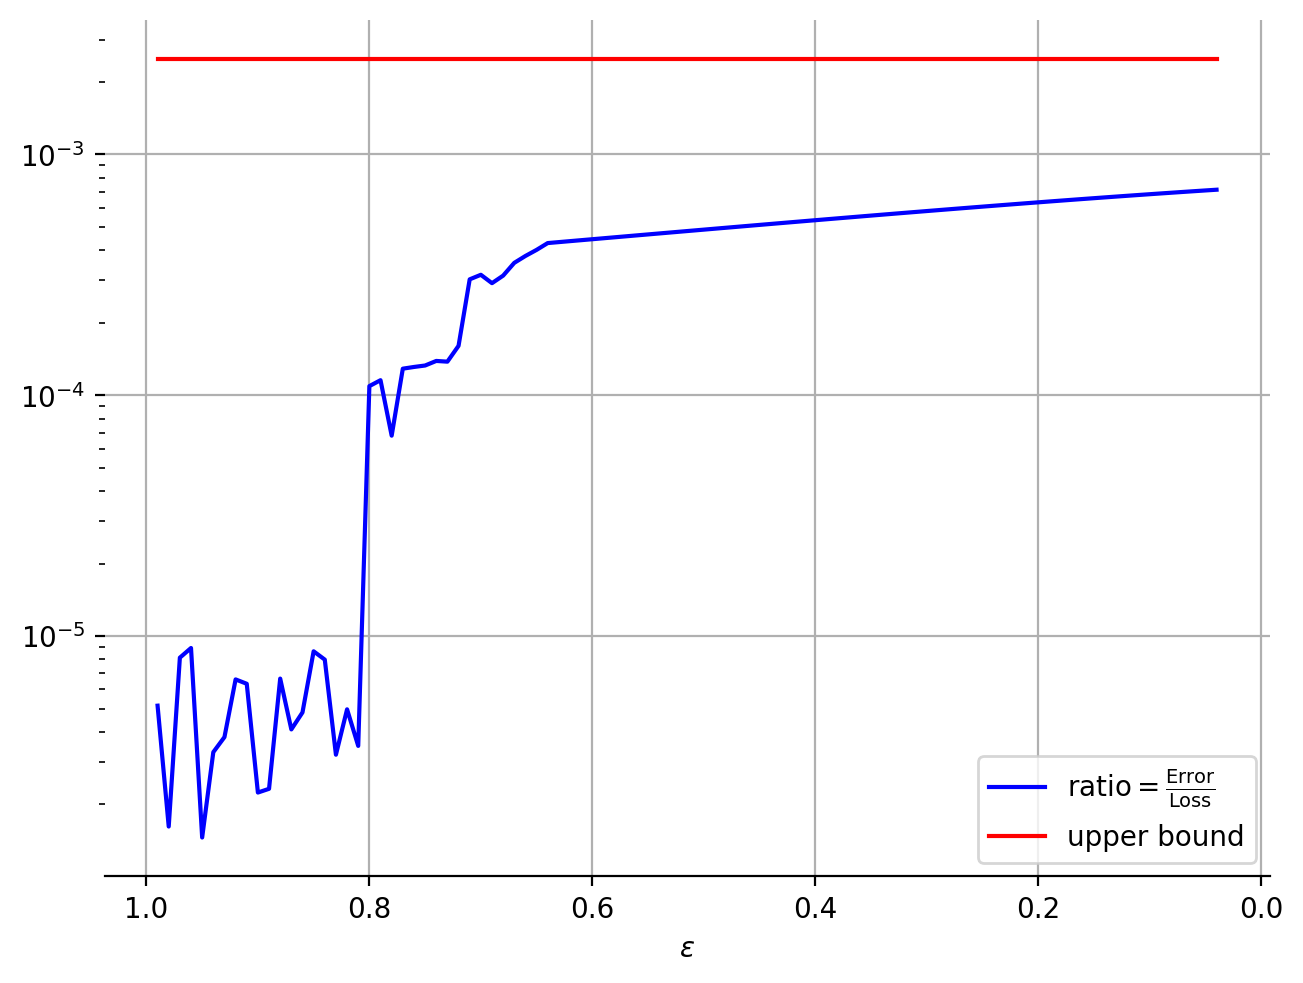

In [ ]:
fig, ax = plt.subplots()
ax.plot(Eps, RATIO6, c="blue", label=r"ratio$=\frac{\sf Error}{\sf Loss}$")
ax.plot(Eps,[4/(k+2*c)**2]*len(Eps), c="red", label="upper bound")
ax.set(
    yscale="log",
    xlabel=r"$\epsilon$"
)
ax.grid()
ax.invert_xaxis()
ax.legend()
ax.spines[["top", "right", "left"]].set_visible(False)
pass